In [1]:
# 24/10/2023
# src:https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Load Visualisation Plugin
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set()

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Shiprocket, INCREFF(Numeric) - C (This is just a TableChart)
Cloud_WH_Compersion_df =pd.read_csv("kaggle/Cloud_Warehouse_Compersion_Chart.csv")

#SKU Code, Design No., Stock, Category, Size, Color - C
Sale_Report_df=pd.read_csv("kaggle/Sale_Report.csv")

#Category, SKU, Catelog, Weight, Prices(from all platform)
P_N_L_March2021_df=pd.read_csv("kaggle/P_L_March_2021.csv")
May2022_df=pd.read_csv("kaggle/May_2022.csv")

#Sales on Amazon Only - C
Amazon_Sale_Report_df =pd.read_csv("kaggle/Amazon_Sale_Report.csv") 

#Sales Internationally - C (Some stock > them Sale Report had)
International_sale_Report_df =pd.read_csv("kaggle/International_sale_Report.csv")

#Recived Amount (total amount of money received from sales) - C
Expense_IIGF_df =pd.read_csv("kaggle/Expense_IIGF.csv")


# Sale_Report_df.columns


## Checking Data

<b>Here are thing we are looking out for:</b>
<ol>
    <li>NaN in row</li>
    <li>Weird data entry</li>
    <li>Uncessary Unnamed Columns</li>
    <li>Spelling</li>

</ol>

In [4]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', -1)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [5]:
# Amazon_Sale_Report_df.isnull().sum()
# Amazon_Sale_Report_df.info()

# Sale_Report_df = Sale_Report_df.dropna()
# Sale_Report_df[Sale_Report_df.isnull().any(axis=1)]

# Cloud_WH_Compersion_df

## Cleaning Data

<h3>Sale Report</h3>

In [6]:
# pd.set_option('display.max_rows', None)

Clean_Sale_Report_df = Sale_Report_df.drop_duplicates()
Clean_Sale_Report_df = Clean_Sale_Report_df.dropna()
Clean_Sale_Report_df.replace("#REF!", np.nan, inplace=True)
Clean_Sale_Report_df[Clean_Sale_Report_df.isnull().any(axis=1)]

Clean_Sale_Report_df = Clean_Sale_Report_df.drop(['index'],axis=1)
Clean_Sale_Report_df = Clean_Sale_Report_df.reset_index(drop=True)

# Clean_Sale_Report_df.info() #15 where SKU is unknown
# Clean_Sale_Report_df.loc[Clean_Sale_Report_df['Design No.']=='SET164']

# Rename AN :LEGGINGS to LEGGINGS
Clean_Sale_Report_df['Category'].replace("AN : LEGGINGS","LEGGINGS", inplace=True)

#Rename and Standarising Columns Name
C_Sale_Report_colname = {
                      'Design No.':'Design_No',
                      'SKU Code':'SKU_Code',
                         }

Clean_Sale_Report_df = Clean_Sale_Report_df.rename(columns=C_Sale_Report_colname)


#Correcting Data Type
Clean_Sale_Report_df['Stock'] = Clean_Sale_Report_df['Stock'].astype(int)

# Clean_Sale_Report_df['Category'].unique()
# Clean_Sale_Report_df.head()
# Clean_Sale_Report_df



<h3>Amazon Sale Report</h3>

In [7]:
Amazon_Sale_Report_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [8]:
#It seen to have False value 
# Amazon_Sale_Report_df.loc[Amazon_Sale_Report_df["Unnamed: 22"]==False]
# Amazon_Sale_Report_df.loc[Amazon_Sale_Report_df["Courier Status"]=='NaN']

Clean_Amazon_Sale_Report_df = Amazon_Sale_Report_df.copy()
Clean_Amazon_Sale_Report_df = Clean_Amazon_Sale_Report_df.drop_duplicates()


Clean_Amazon_Sale_Report_df['Unnamed: 22'] = Clean_Amazon_Sale_Report_df['Unnamed: 22'].replace(np.NaN, True)
Clean_Amazon_Sale_Report_df['Courier Status'] = Clean_Amazon_Sale_Report_df['Courier Status'].replace(np.NaN, 'Pending')

#For currency and Amount, we might have to reference to other table to get the info for NAN
Clean_Amazon_Sale_Report_df['currency'].unique()
Clean_Amazon_Sale_Report_df[['currency','Amount']].head(100)


#There is 33 entry where ship-city, state, postal code, country is NAN.
# Clean_Amazon_Sale_Report_df.loc[Clean_Amazon_Sale_Report_df["ship-city"].isnull()]

#For Fulfilled-by, there Easy Ship and Others.
Clean_Amazon_Sale_Report_df['fulfilled-by'] = Clean_Amazon_Sale_Report_df['fulfilled-by'].replace(np.NaN, 'Others')
Clean_Amazon_Sale_Report_df['fulfilled-by'].unique()

Clean_Amazon_Sale_Report_df = Clean_Amazon_Sale_Report_df.drop(['index','Unnamed: 22'],axis=1)

#Rename and Standarising Columns Name
C_Amazon_Sale_colname = {
                      'Order ID':'Order_ID',
                      'Style':'Design_No',
                      'Sales Channel ':'Sales_Channel',
                      'ship-service-level':'Ship_Service_Level',
                      'SKU':'SKU_Code',
                      'currency':'Currency',
                      'ship-city':'Ship_City',
                      'ship-state':'Ship_State',
                      'ship-postal-code':'Ship_Postal_Code',
                      'ship-country':'Ship_Country',
                      'promotion-ids':'Promotion-Ids',
                      'fulfilled-by':'Fulfilled-By'
                         }

Clean_Amazon_Sale_Report_df = Clean_Amazon_Sale_Report_df.rename(columns=C_Amazon_Sale_colname)
Clean_Amazon_Sale_Report_df['Category'] = Clean_Amazon_Sale_Report_df['Category'].str.upper()

# Amazon_Sale_Report_df[Amazon_Sale_Report_df.isnull().any(axis=1)]
# Amazon_Sale_Report_df["Unnamed: 22"]
# Clean_Amazon_Sale_Report_df.info()

# Clean_Amazon_Sale_Report_df[['Qty','currency','Amount']]
# Clean_Amazon_Sale_Report_df.columns
# Clean_Amazon_Sale_Report_df

In [9]:
Clean_Amazon_Sale_Report_df['Fulfilled-By'].unique()

array(['Easy Ship', 'Others'], dtype=object)

<h3>Clean Expense Report</h3>

In [10]:
#Rename columns name, remove uncessary 1st row
#Reason for keep to NaN because it does refer to something but it not just recounted.


Clean_Expense_IIGF_df = Expense_IIGF_df.copy()
Clean_Expense_IIGF_df = Expense_IIGF_df.iloc[1:]
Clean_Expense_IIGF_df = Clean_Expense_IIGF_df.rename(columns={'Recived Amount':'Date','Unnamed: 1': 'Received Amount', 'Expance':'Expense','Unnamed: 3': 'Amount'})
Clean_Expense_IIGF_df = Clean_Expense_IIGF_df.reset_index(drop=True)
Clean_Expense_IIGF_df = Clean_Expense_IIGF_df.drop(['index'], axis=1)


#Last columns is removed because its entry is total sum of repestive columns for Recieved Amount and Amount.
#In Amount for row 13 is -3095 from other expense.
Clean_Expense_IIGF_df = Clean_Expense_IIGF_df.iloc[:15]
# Clean_Expense_IIGF_df['Amount'].astype(int)

#Convert NaN to 0, so we can have that data type to be int
Clean_Expense_IIGF_df['Received Amount'] = Clean_Expense_IIGF_df['Received Amount'].replace(np.NaN, '0')


#Correcting Data Type
C_Expense_datatype = {
                      'Received Amount':int,
                      'Expense':str,
                      'Amount':int
                     }
 
Clean_Expense_IIGF_df['Date'] = Clean_Expense_IIGF_df['Date'].astype('datetime64[ns]')


# converting all columns to string type
Clean_Expense_IIGF_df = Clean_Expense_IIGF_df.astype(C_Expense_datatype)
C_ExpenseList_IIGF_df = Clean_Expense_IIGF_df.iloc[:,-2:]
C_ExpenseList_IIGF_df = C_ExpenseList_IIGF_df.replace('nan', 'Total')

C_ReceivedAmount_IIGF_df = Clean_Expense_IIGF_df.iloc[:4,:2]

# Clean_Expense_IIGF_df
# Clean_Expense_IIGF_df.info()
# C_ExpenseList_IIGF_df


In [11]:
# C_ReceivedAmount_IIGF_df
# Clean_Expense_IIGF_df

<h3>International Sale Report</h3>

In [12]:
# Clean_Sale_Report_df

In [13]:
# Clean_Valid_Inter_SaleReport_df.loc[Clean_Valid_Inter_SaleReport_df['Design_No']=='CMB5']
# Clean_Valid_Inter_SaleReport_df

# Invalid_Inter_SaleReport_df['SKU_Code'].unique()

In [14]:
# International_sale_Report_df.loc[International_sale_Report_df['Style']=='CMB5']
# International_sale_Report_df

In [15]:
Clean_International_sale_Report_df = International_sale_Report_df.copy()

#DATE, Months, Custoemrs is mixture up
# Style and SKU with wrong entry.


# Clean_International_sale_Report_df[Clean_International_sale_Report_df.isnull().any(axis=1)]

# Function to check if a value is a valid date
def is_valid_date(val):
    try:
        pd.to_datetime(val)
        return True
    except:
        return False

invalid_date_mask = ~Clean_International_sale_Report_df['DATE'].apply(is_valid_date)

# Use temporary variables to store the values to swap
temp_customer = Clean_International_sale_Report_df.loc[invalid_date_mask, 'DATE']
temp_date = Clean_International_sale_Report_df.loc[invalid_date_mask, 'Months']
temp_month = Clean_International_sale_Report_df.loc[invalid_date_mask, 'CUSTOMER']

# Assaign the values to the correct columns
Clean_International_sale_Report_df.loc[invalid_date_mask, 'CUSTOMER'] = temp_customer
Clean_International_sale_Report_df.loc[invalid_date_mask, 'DATE'] = temp_date
Clean_International_sale_Report_df.loc[invalid_date_mask, 'Months'] = temp_month



#Style is there but SKU is unknown
Clean_International_sale_Report_df['SKU'] = Clean_International_sale_Report_df['SKU'].replace(np.NaN, '0')

#drop NaN columns
Clean_International_sale_Report_df = Clean_International_sale_Report_df.dropna()

#drop_duplicates
Clean_International_sale_Report_df = Clean_International_sale_Report_df.drop_duplicates()


Clean_International_sale_Report_df = Clean_International_sale_Report_df.drop([19675])
Clean_International_sale_Report_df = Clean_International_sale_Report_df.reset_index(drop=True)
Clean_International_sale_Report_df = Clean_International_sale_Report_df.drop(['index'], axis=1)


#Rename and standarising Columns Name
C_Internaitional_SR_colname = {'DATE': 'Date',
                      'CUSTOMER':'Customer',
                      'PCS':'Pc_Sold',
                      'RATE':'Rate',
                      'Style':'Design_No',
                      'SKU':'SKU_Code',
                      'GROSS AMT':'Gross_Amt'
                     }

Clean_International_sale_Report_df = Clean_International_sale_Report_df.rename(columns=C_Internaitional_SR_colname)

#Correcting Data Type

C_Internaitional_SR_datatype = {'Pc_Sold': float,
                      'Rate':float,
                      'Gross_Amt':float,
                     }
 
Clean_International_sale_Report_df['Date'] = Clean_International_sale_Report_df['Date'].astype('datetime64[ns]')
Clean_International_sale_Report_df['Months'] = Clean_International_sale_Report_df['Date'].dt.to_period('M')
Clean_International_sale_Report_df['Months'] = Clean_International_sale_Report_df['Months'].dt.strftime('%b-%y')



# Clean_International_sale_Report_df['Months'] = Clean_International_sale_Report_df['Months'].astype('datetime64[ns]')

Clean_International_sale_Report_df = Clean_International_sale_Report_df.astype(C_Internaitional_SR_datatype)
Clean_International_sale_Report_df['Pc_Sold'] = round(Clean_International_sale_Report_df['Pc_Sold'])

# Clean_International_sale_Report_df

In [16]:
# Clean_Sale_Report_df.loc[Clean_Sale_Report_df['Design_No']=='PJNE3423']

In [17]:
size_check = Clean_Sale_Report_df['Size'].unique()

def str_size(row):
    row_split = row['SKU_Code'].split(sep = '-')  # assuming SKU_Code is split by space
    if row_split[-1] in size_check:
        row['Size'] = row_split[-1]
    return row

Clean_International_sale_Report_df = Clean_International_sale_Report_df.apply(str_size, axis=1)

# test = 'SET290-KR-DPT-M'
# test2 = test.split(sep='-')
# test2[-1]
# Clean_Valid_Inter_SaleReport_df2.loc[Clean_Valid_Inter_SaleReport_df2['Design_No']=='PJNE3423']

Mask_Pc_Sold = Clean_International_sale_Report_df['Pc_Sold']>=Clean_International_sale_Report_df['Rate']
Clean_International_sale_Report_df.loc[Mask_Pc_Sold,'Pc_Sold'] = Clean_International_sale_Report_df.loc[Mask_Pc_Sold,'Pc_Sold']/Clean_International_sale_Report_df.loc[Mask_Pc_Sold,'Rate']
# Clean_International_sale_Report_df.loc[Clean_International_sale_Report_df['Design_No']=='CMB5']

Clean_International_sale_Report_df['Gross_Amt'] = Clean_International_sale_Report_df['Pc_Sold'] * Clean_International_sale_Report_df['Rate']

In [18]:
#### For me to check SKU_Code (Search Engine)

# Clean_Sale_Report_df.loc[Clean_Sale_Report_df['SKU_Code']=='OS326_L']
results = Clean_Sale_Report_df[Clean_Sale_Report_df['SKU_Code'].str.contains('JNE3826', case=False,na=False)]
results


,SKU_Code,Design_No,Stock,Category,Size,Color
6196,JNE3826-KR-L,JNE3826,19,KURTA,L,Black
6197,JNE3826-KR-M,JNE3826,14,KURTA,M,Black
6198,JNE3826-KR-S,JNE3826,22,KURTA,S,Black
6199,JNE3826-KR-XL,JNE3826,14,KURTA,XL,Black
6200,JNE3826-KR-XXL,JNE3826,21,KURTA,XXL,Black


In [19]:
International_sale_Report_df.columns
# filtered_df

Index(['index', 'DATE', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size', 'PCS',
       'RATE', 'GROSS AMT'],
      dtype='object')

In [20]:
# Invalid_Inter_SaleReport_df['SKU_Code'].unique()
# filtered_df['SKU_Code'].unique()

In [21]:
# #i need a function to check Design no, if not check Sku_code split?
# def checkvalid_design (row):
#     valid_designs =Clean_Sale_Report_df['Design_No']

#     design = row['Design_No']
#     if design in valid_designs:
#         return True
#     else:
#         sku_code_split = row['SKU_Code'].split()
#         for sku_code in sku_code_split:
#             if sku_code in valid_designs:
#                 return True
#     return False

# Clean_International_sale_Report_df['IsValidDesign'] = Clean_International_sale_Report_df.apply(checkvalid_design, axis=1)

In [22]:
#To check if Design_No Existed in Sale_Report
valid_designs =Clean_Sale_Report_df['Design_No']
valid_sku_code =Clean_Sale_Report_df['SKU_Code']

Clean_International_sale_Report_df['Pc_Sold']= round(Clean_International_sale_Report_df['Pc_Sold'],1)
Clean_International_sale_Report_df['Pc_Sold'] = Clean_International_sale_Report_df['Pc_Sold'].astype(int)

Clean_International_sale_Report_df['Design_No'] = Clean_International_sale_Report_df['Design_No'].str.upper()



In [23]:
# array(['SET164', 'JNE3388', 'SAR086', 'CMB5'], dtype=object)


filter_values = ['SET164', 'JNE3388', 'SAR086','TAGS', 'SHIPPING','JAN8685','TAG PRINTING','TAGS(LABOUR)','SHIPPING CHARGES','LABEL CHARGE','LABEL MANUF.CHRAGE'] # Add more values to this list as needed
filtered_df = Clean_International_sale_Report_df[~Clean_International_sale_Report_df['Design_No'].isin(filter_values)]

# Create a mask for the rows where Design_No is 'CMB5'
mask = filtered_df['Design_No'] == 'CMB5'

# Update the 'Design_No' column for those rows
filtered_df.loc[mask, 'Design_No'] = filtered_df.loc[mask, 'SKU_Code'].str.split('-').str[1]

filtered_df['SKU_Code'] = filtered_df['SKU_Code'].str.rstrip('.')
# filtered_df = filtered_df.drop_duplicates()

Check_International_sale_Report_df = filtered_df
# filtered_df['Design_No'].unique()
# filtered_df

In [24]:
invalid_mask = ~Check_International_sale_Report_df['SKU_Code'].isin(valid_sku_code)

#Those that does not match our Sale Report
Invalid_Inter_SaleReport_df = Check_International_sale_Report_df[invalid_mask]

#Those that are matching to our Sale Report
Clean_Valid_Inter_SaleReport_df = Check_International_sale_Report_df[~invalid_mask]

# Clean_International_sale_Report_df.loc[Clean_International_sale_Report_df['IsValidDesign']==False]
# Invalid_Inter_SaleReport_df.loc[Invalid_Inter_SaleReport_df['Design_No']=='CMB5']

# Clean_International_sale_Report_df
# Clean_International_sale_Report_df[Clean_International_sale_Report_df.isnull().any(axis=1)]
# Clean_International_sale_Report_df.info()

# Clean_Valid_Inter_SaleReport_df.loc[Clean_Valid_Inter_SaleReport_df['Pc_Sold']>1]
# Clean_Valid_Inter_SaleReport_df


In [25]:
# Clean_Sale_Report_df
# Sales_Trend_df = Clean_Valid_Inter_SaleReport_df.merge(Clean_Sale_Report_df,how='left', on=['SKU_Code','Design_No','Size'])

<h3>Combine International and Sale Report</h3>

In [26]:

valid_category = Clean_Sale_Report_df['Category'].unique()
Combine_International_Sale_Report = Clean_Valid_Inter_SaleReport_df.merge(Clean_Sale_Report_df,how='left',on=['Design_No','SKU_Code','Size'])

invalid_mask = ~Combine_International_Sale_Report['Category'].isin(valid_category)
valid_mask = Combine_International_Sale_Report['Category'].isin(valid_category)

valid_Combine_International_Sale_Report = Combine_International_Sale_Report[valid_mask]
# Index(['Date', 'Months', 'Customer', 'Design_No', 'SKU_Code', 'Size',
#        'Pc_Sold', 'Rate', 'Gross_Amt', 'Stock', 'Category', 'Color'],
#       dtype='object')
valid_Combine_International_Sale_Report = valid_Combine_International_Sale_Report.drop(['Stock','Color'], axis=1)
# test.loc[]
# test

In [27]:
valid_Combine_International_Sale_Report.head(5)

,Date,Months,Customer,Design_No,SKU_Code,Size,Pc_Sold,Rate,Gross_Amt,Category
0,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,616.56,KURTA
1,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,616.56,KURTA
2,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,616.56,KURTA
3,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,616.56,KURTA
4,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,616.56,KURTA


<h3>Cloud WhareHouse Compersion</h3>

In [28]:
import re

#This is TableChart
C_Cloud_WH_Compersion_df = Cloud_WH_Compersion_df.copy()
C_Cloud_WH_Compersion_df = C_Cloud_WH_Compersion_df.rename(columns={'Shiprocket':'Title','Unnamed: 1':'Shiprocket'})
C_Cloud_WH_Compersion_df = C_Cloud_WH_Compersion_df.drop(['index'], axis=1)
C_Cloud_WH_Compersion_df = C_Cloud_WH_Compersion_df.replace(np.NaN, '')

Shipping_Fee_df = C_Cloud_WH_Compersion_df.iloc[1:5,1:]
Shipping_Fee_df['Shiprocket'] = Shipping_Fee_df['Shiprocket'].str.replace("₹", "")

def extract_float(s):
    match = re.search(r'(\d+\.\d+)', s)
    return float(match.group(1)) if match else s

Shipping_Fee_df['INCREFF'] = Shipping_Fee_df['INCREFF'].apply(extract_float)

#_____________________________________________
#Price Per Unit Indian rupee
#INCREFF 0.15 per Day (Storage Fee/Cft)

# Inbound (Fresh Stock and RTO)
# Outbound
# Storage Fee/Cft
# Customer Return with Detailed QC

Shipping_Fee_df


,Shiprocket,INCREFF
1,4.00,4
2,7.00,11
3,25.00,0.15
4,6.00,15.5


In [29]:
# C_Cloud_WH_Compersion_df

<h3>Profit and Loss March 2021</h3>

In [30]:
# Invalid_Inter_SaleReport_df

In [31]:
P_N_L_March2021_df['Sku'] = P_N_L_March2021_df['Sku'].str.upper()
P_N_L_March2021_df['Style Id'] = P_N_L_March2021_df['Style Id'].str.upper()
P_N_L_March2021_df = P_N_L_March2021_df.drop(['index'], axis=1)
P_N_L_March2021_df.replace('#value!', np.nan, inplace=True)

#Rename and standarising Columns Name
P_N_L_March2021_colname = {
                      'Style Id':'Design_No',
                      'Sku':'SKU_Code',
                     }

P_N_L_March2021_df = P_N_L_March2021_df.rename(columns=P_N_L_March2021_colname)

# P_N_L_March2021_df[P_N_L_March2021_df.isnull().any(axis=1)]
# P_N_L_March2021_df

In [32]:
# P_N_L_March2021_df['TP 2'].astype(float)
P_N_L_March2021_df = P_N_L_March2021_df[~(P_N_L_March2021_df == '#VALUE!').any(axis=1)]
P_N_L_March2021_df = P_N_L_March2021_df[~(P_N_L_March2021_df == 'Nill').any(axis=1)]
# P_N_L_March2021_df

In [33]:
#Correcting Data Type
C_P_N_L_March2021_df_datatype = {
                      'Weight': float,
                      'TP 1': float,
                      'TP 2':float,
                      'MRP Old':float,
                      'Final MRP Old': float,
                      'Ajio MRP':float,
                      'Amazon MRP':float,
                      'Amazon FBA MRP': float,
                      'Flipkart MRP':float,
                      'Limeroad MRP':float,
                      'Myntra MRP': float,
                      'Paytm MRP':float,
                      'Snapdeal MRP':float
                     }

P_N_L_March2021_df = P_N_L_March2021_df.astype(C_P_N_L_March2021_df_datatype)
# P_N_L_March2021_df.info()

<h3>May 2022</h3>

In [34]:
P_N_L_May2022_df = May2022_df.copy()
P_N_L_May2022_df['Sku'] = P_N_L_May2022_df['Sku'].str.upper()
P_N_L_May2022_df['Style Id'] = P_N_L_May2022_df['Style Id'].str.upper()
P_N_L_May2022_df = P_N_L_May2022_df.drop(['index'], axis=1)


#Rename and standarising Columns Name
C_May2022_colname = {
                      'Style Id':'Design_No',
                      'Sku':'SKU_Code',
                     }

P_N_L_May2022_df = P_N_L_May2022_df.rename(columns=C_May2022_colname)

In [35]:
# P_N_L_May2022_df.info()

P_N_L_May2022_df = P_N_L_May2022_df[~(P_N_L_May2022_df == '#VALUE!').any(axis=1)]
P_N_L_May2022_df = P_N_L_May2022_df[~(P_N_L_May2022_df == 'Nill').any(axis=1)]

In [36]:
#Correcting Data Type
C_P_N_L_May2022_df_datatype = {
                      'Weight': float,
                      'TP': float,
                      'MRP Old':float,
                      'Final MRP Old': float,
                      'Ajio MRP':float,
                      'Amazon MRP':float,
                      'Amazon FBA MRP': float,
                      'Flipkart MRP':float,
                      'Limeroad MRP':float,
                      'Myntra MRP': float,
                      'Paytm MRP':float,
                      'Snapdeal MRP':float
                     }

# Clean_International_sale_Report_df['Months'] = Clean_International_sale_Report_df['Months'].astype('datetime64[ns]')

P_N_L_May2022_df = P_N_L_May2022_df.astype(C_P_N_L_May2022_df_datatype)
# P_N_L_May2022_df.info()

## Analysis

In [37]:
#For me to check SKU_Code (Search Engine)
Clean_Sale_Report_df.loc[Clean_Sale_Report_df['SKU_Code']=='OS326_L']
results = Clean_Sale_Report_df[Clean_Sale_Report_df['SKU_Code'].str.contains('OS', case=False,na=False)]
# results


In [38]:
# C_Cloud_WH_Compersion_df
# C_ReceivedAmount_IIGF_df
# C_ExpenseList_IIGF_df

In [39]:
P_N_L_May2022_df.columns

Index(['SKU_Code', 'Design_No', 'Catalog', 'Category', 'Weight', 'TP',
       'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP',
       'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP',
       'Snapdeal MRP'],
      dtype='object')

In [40]:
P_N_L_March2021_df.columns

Index(['SKU_Code', 'Design_No', 'Catalog', 'Category', 'Weight', 'TP 1',
       'TP 2', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP',
       'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP',
       'Paytm MRP', 'Snapdeal MRP'],
      dtype='object')

In [41]:
Clean_Valid_Inter_SaleReport_df.columns

Index(['Date', 'Months', 'Customer', 'Design_No', 'SKU_Code', 'Size',
       'Pc_Sold', 'Rate', 'Gross_Amt'],
      dtype='object')

In [42]:
Clean_Amazon_Sale_Report_df.columns

Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'Ship_Service_Level', 'Design_No', 'SKU_Code', 'Category', 'Size',
       'ASIN', 'Courier Status', 'Qty', 'Currency', 'Amount', 'Ship_City',
       'Ship_State', 'Ship_Postal_Code', 'Ship_Country', 'Promotion-Ids',
       'B2B', 'Fulfilled-By'],
      dtype='object')

In [43]:
Clean_Sale_Report_df.columns

Index(['SKU_Code', 'Design_No', 'Stock', 'Category', 'Size', 'Color'], dtype='object')

## Function

In [44]:
def custom_colname(col):
    # If there's an aggregation (like 'count', 'max', 'sum', etc.), join them in the format you described.
    if col[1]:
        return f"{col[1]}_{col[0]}"
    # If not, just return the original column name.
    else:
        return col[0]
    

def skewed (mean,median):
    if mean > median:
        #return 'Left'
        return -1
    elif mean < median:
        #return 'Right'
        return 1
    else:
        #return 'Normal'
        return 0
    

In [45]:
# Clean_Valid_Inter_SaleReport_df

In [46]:
Clean_Valid_Inter_SaleReport_df.columns

Sales_Trend_df = Clean_Valid_Inter_SaleReport_df.merge(Clean_Sale_Report_df,how='left', on=['SKU_Code','Design_No','Size'])
# Sales_Trend_df

In [47]:
Grp_Inter_Str_AggList = {
                        'Customer':['nunique'],
                        'Design_No':['nunique'],
                        'Pc_Sold':['count'],
                        'Gross_Amt':['sum'],
                        }


Grp_Inter_SR_df = Sales_Trend_df.groupby(["Months","Category"]).agg(Grp_Inter_Str_AggList).reset_index()
Grp_Inter_SR_df.columns =  [custom_colname(col) for col in Grp_Inter_SR_df.columns]

Grp_Inter_SR_df['sum_Gross_Amt']=Grp_Inter_SR_df['sum_Gross_Amt'].apply(lambda x: "{:,.0f}".format(x))

Grp_Inter_SR_df['Months'] = pd.to_datetime(Grp_Inter_SR_df['Months'], format='%b-%y')
Grp_Inter_SR_df['Months'] = Grp_Inter_SR_df['Months'].dt.strftime('%m-%Y')

Grp_Inter_SR_df = Grp_Inter_SR_df.sort_values(by='Months', ascending=False)

# Grp_Inter_SR_df

In [48]:
Grp_Design_Str_AggList = {
                        'Customer':['nunique'],
                        'Pc_Sold':['count'],
                        'Gross_Amt':['sum']
                        }


Grp_Design_Inter_SR_df = Clean_Valid_Inter_SaleReport_df.groupby(["Months","Design_No"]).agg(Grp_Design_Str_AggList).reset_index()
Grp_Design_Inter_SR_df.columns =  [custom_colname(col) for col in Grp_Design_Inter_SR_df.columns]

Grp_Design_Inter_SR_df['Months'] = pd.to_datetime(Grp_Design_Inter_SR_df['Months'], format='%b-%y')
Grp_Design_Inter_SR_df['Months'] = Grp_Design_Inter_SR_df['Months'].dt.strftime('%m-%Y')
Grp_Design_Inter_SR_df = Grp_Design_Inter_SR_df.sort_values(by='Months', ascending=False)

# Grp_Design_Inter_SR_df


### Amazon Sale Report

'Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],

In [49]:
def simplify_status(status):
    if 'Shipped - Delivered to Buyer' in status or 'Shipped' in status and 'Returned' not in status and 'Rejected' not in status and 'Damaged' not in status:
        return 'Delivered/Shipped to Buyer'
    elif 'Returned' in status or 'Damaged' in status or 'Rejected' in status:
        return 'Returned/Damaged/Rejected'
    elif status == 'Cancelled':
        return 'Cancelled'
    elif 'Pending' in status:
        return 'Pending'
    else:
        return 'Others'

Clean_Amazon_Sale_Report_df['Simplified_Status'] = Clean_Amazon_Sale_Report_df['Status'].apply(simplify_status)
# Clean_Amazon_Sale_Report_df['Status'].unique()
Clean_Amazon_Sale_Report_df.columns
#words Clean_Amazon_Sale_Report_df['Promotion-Ids'].unique()

Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'Ship_Service_Level', 'Design_No', 'SKU_Code', 'Category', 'Size',
       'ASIN', 'Courier Status', 'Qty', 'Currency', 'Amount', 'Ship_City',
       'Ship_State', 'Ship_Postal_Code', 'Ship_Country', 'Promotion-Ids',
       'B2B', 'Fulfilled-By', 'Simplified_Status'],
      dtype='object')

In [51]:
Filter_list = ['Order_ID','Date','Simplified_Status','Fulfilment','Sales_Channel','Design_No','Size','Category','Qty','Currency','Amount','Ship_City','Ship_State','Ship_Country','Promotion-Ids','B2B','Fulfilled-By']

Filtered_C_Amazon_Sale_Report_df= Clean_Amazon_Sale_Report_df[Filter_list]

Filtered_C_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Filtered_C_Amazon_Sale_Report_df['Date'], format='%m-%d-%y')
Filtered_C_Amazon_Sale_Report_df['Date'] = Filtered_C_Amazon_Sale_Report_df['Date'].dt.strftime('%d-%m-%Y')
Filtered_C_Amazon_Sale_Report_df['Promotion-Ids']= Filtered_C_Amazon_Sale_Report_df['Promotion-Ids'].notna() 

Filtered_Status_C_Amazon_Sale_Report_df=Filtered_C_Amazon_Sale_Report_df.loc[(Filtered_C_Amazon_Sale_Report_df['Simplified_Status']=='Delivered/Shipped to Buyer') | (Filtered_C_Amazon_Sale_Report_df['Simplified_Status']=='Cancelled')]

Filtered_Status_C_Amazon_Sale_Report_df_Shipped=Filtered_C_Amazon_Sale_Report_df.loc[(Filtered_C_Amazon_Sale_Report_df['Simplified_Status']=='Delivered/Shipped to Buyer')]

# Count_F_C_Amazon_Sale_Report_df
# Clean_Amazon_Sale_Report_df.info()
# Filtered_C_Amazon_Sale_Report_df.loc[Filtered_C_Amazon_Sale_Report_df['Currency']!= 'INR']
# Filtered_C_Amazon_Sale_Report_df['Simplified_Status'].unique()

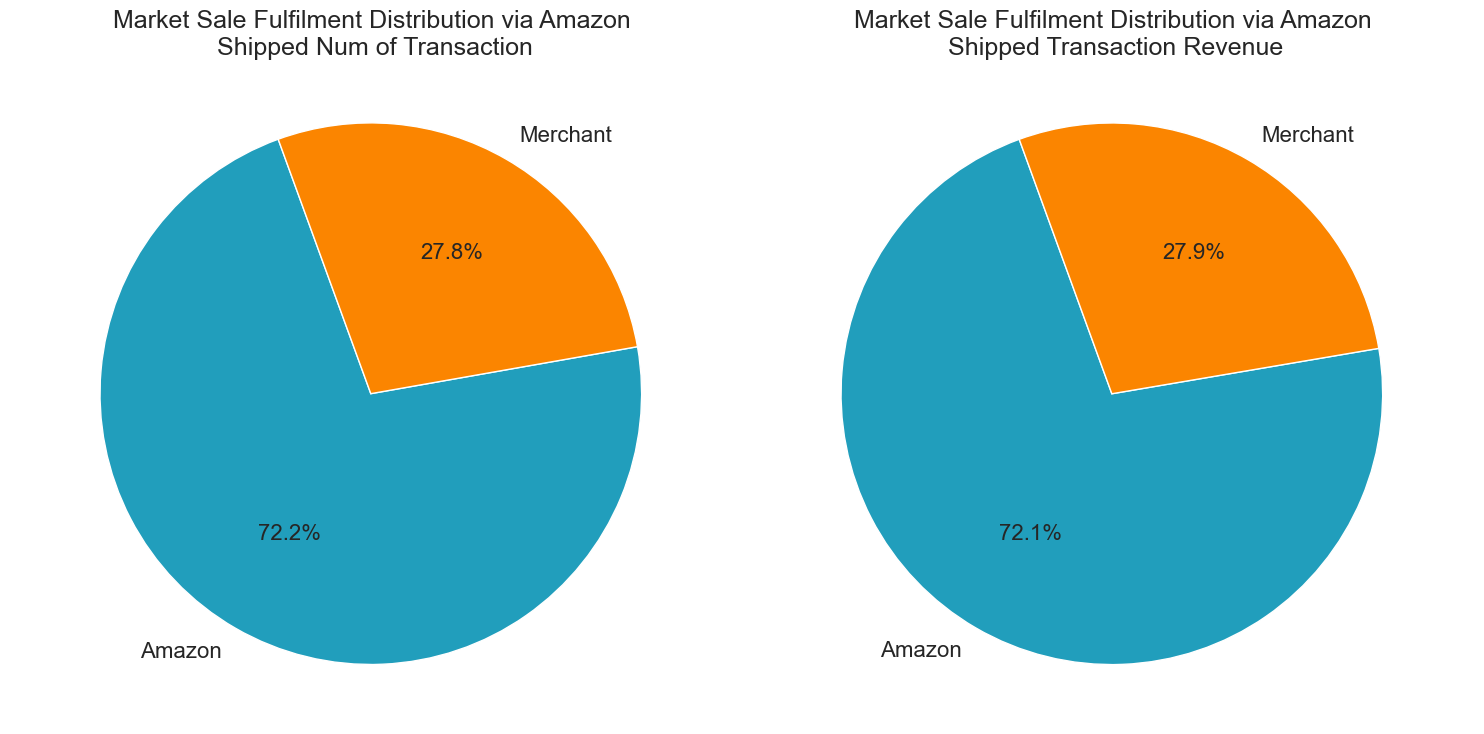

In [52]:
#Distrubtion of Status 
Count_Status_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'B2B':['sum'],
    'Order_ID':['count']    
}

Count_F_C_Amazon_Sale_Report_df = Filtered_Status_C_Amazon_Sale_Report_df_Shipped.groupby(['Fulfilment']).agg(Count_Status_Amazon_Sale_Agg_funcs).reset_index()
Count_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Count_F_C_Amazon_Sale_Report_df.columns]

# # Calculate percentages
# total = Count_F_C_Amazon_Sale_Report_df['count_Order_ID'].sum()
# Count_F_C_Amazon_Sale_Report_df['percentage'] = (Count_F_C_Amazon_Sale_Report_df['count_Order_ID'] / total) * 100

# # Group the rows with percentage less than 1% into "Other"
# mask = Count_F_C_Amazon_Sale_Report_df['percentage'] < 1
# grouped_other = Count_F_C_Amazon_Sale_Report_df.loc[mask].sum(numeric_only=True)
# Count_F_C_Amazon_Sale_Report_df = Count_F_C_Amazon_Sale_Report_df.loc[~mask]

# if not grouped_other.empty:
#     Count_F_C_Amazon_Sale_Report_df = Count_F_C_Amazon_Sale_Report_df.append({'Simplified_Status': 'Other', 'count_Order_ID': grouped_other['count_Order_ID']}, ignore_index=True)

colors_status = ['#219ebc', '#fb8500']

# Create the pie chart
# plt.figure(figsize=(5, 5))

fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))
content_fontsize = 16
title_fontsize = 18

ax[0].pie(Count_F_C_Amazon_Sale_Report_df['count_Order_ID'], labels=Count_F_C_Amazon_Sale_Report_df['Fulfilment'], autopct='%1.1f%%', startangle=110, colors=colors_status,textprops={'fontsize': content_fontsize})
ax[0].set_title('Market Sale Fulfilment Distribution via Amazon\n Shipped Num of Transaction',fontsize=title_fontsize)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax[1].pie(Count_F_C_Amazon_Sale_Report_df['sum_Amount'], labels=Count_F_C_Amazon_Sale_Report_df['Fulfilment'], autopct='%1.1f%%', startangle=110, colors=colors_status,textprops={'fontsize': content_fontsize})
ax[1].set_title('Market Sale Fulfilment Distribution via Amazon\n Shipped Transaction Revenue',fontsize=title_fontsize)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

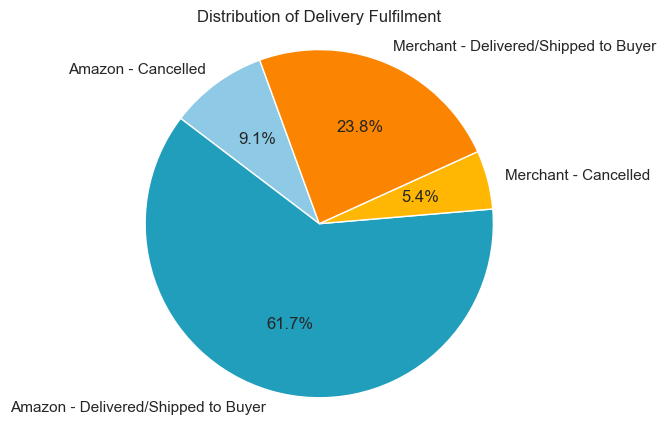

In [54]:
Count_Status_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'B2B':['sum'],
    'Order_ID':['count']    
}
Only_Amazon_Sale_Report_df = Filtered_Status_C_Amazon_Sale_Report_df.loc[Filtered_Status_C_Amazon_Sale_Report_df['Sales_Channel']=='Amazon.in']

Sale_Channel_Amazon_Sale_Report_df = Only_Amazon_Sale_Report_df.groupby(['Fulfilment','Simplified_Status']).agg(Count_Status_Amazon_Sale_Agg_funcs).reset_index()
Sale_Channel_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Sale_Channel_Amazon_Sale_Report_df.columns]

# Filtered_Status_C_Amazon_Sale_Report_df
# Filtered_C_Amazon_Sale_Report_df

#Amount is NaN
# Filtered_Status_C_Amazon_Sale_Report_df.loc[Filtered_Status_C_Amazon_Sale_Report_df['Sales_Channel']=='Non-Amazon']


# Calculate percentage of each status within each Fulfilment category
Sale_Channel_Amazon_Sale_Report_df['Percentage'] = Sale_Channel_Amazon_Sale_Report_df.groupby('Fulfilment')['count_Order_ID'].transform(lambda x: x / x.sum() * 100)

# Data for outer pie chart (Fulfilment)
fulfilment_data = Sale_Channel_Amazon_Sale_Report_df.groupby('Fulfilment')['count_Order_ID'].sum()
labels_fulfilment = [f'{index} ({value}%)' for index, value in zip(fulfilment_data.index, fulfilment_data.values)]

labels_status = [f'{row.Fulfilment} - {row.Simplified_Status}' for index, row in Sale_Channel_Amazon_Sale_Report_df.iterrows()]

colors_status = ['#8ecae6','#219ebc', '#ffb703', '#fb8500']


# Create the pie chart
plt.figure(figsize=(5, 5))
labels = Sale_Channel_Amazon_Sale_Report_df['Simplified_Status'].tolist()  # Get unique status as labels
sizes = Sale_Channel_Amazon_Sale_Report_df['count_Order_ID'].tolist()  # Assuming 'Order_ID_count' is the correct column name after aggregation and renaming

plt.pie(sizes, labels=labels_status, autopct='%1.1f%%', startangle=110, colors=colors_status)
plt.title('Distribution of Delivery Fulfilment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [55]:
Filtered_C_Amazon_Sale_Report_df['Sales_Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [56]:
# Create Monthly on Category
# Count_Monthly_F_C_Amazon_Sale_Report_df
# Filtered_Status_C_Amazon_Sale_Report_df['Date'].unique()
# Count_Monthly_F_C_Amazon_Sale_Report_df

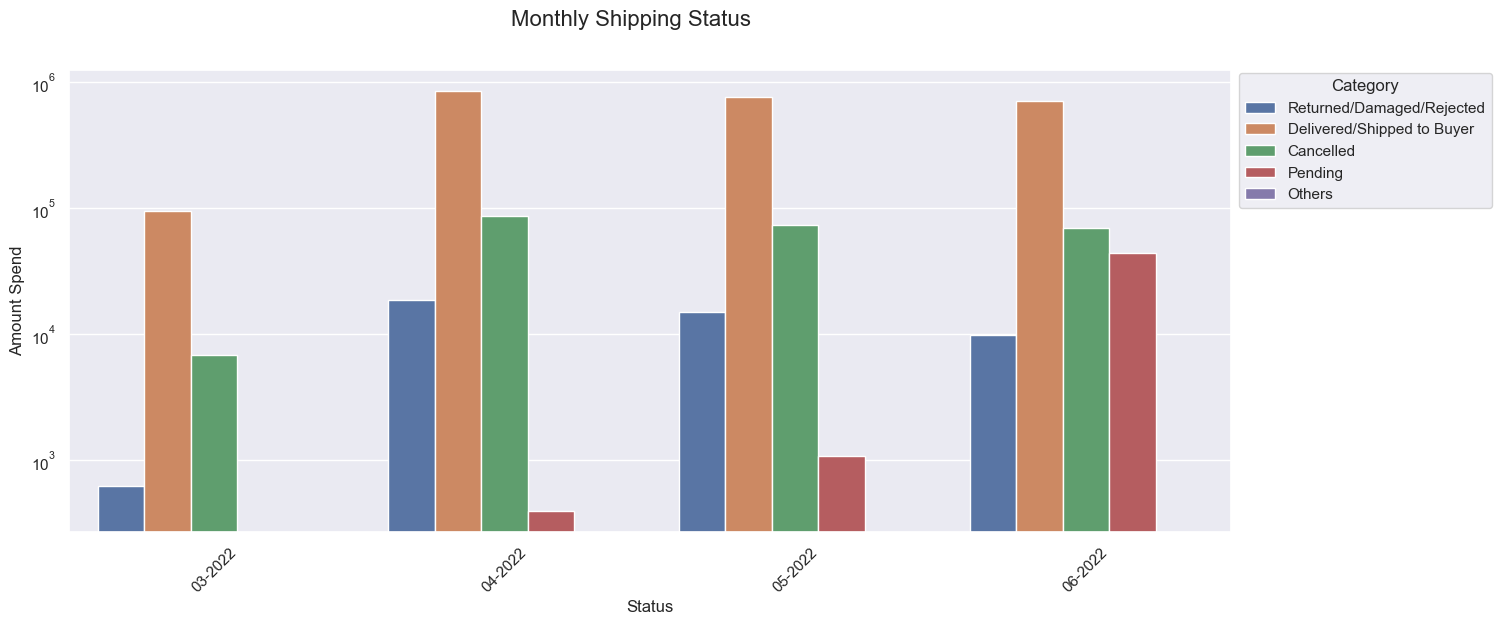

In [57]:
#Distrubtion of Status 
Count_Monthly_Status_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'B2B':['sum'],
    'Order_ID':['count']
}

Count_Monthly_F_C_Amazon_Sale_Report_df = Filtered_C_Amazon_Sale_Report_df.groupby(['Date','Simplified_Status']).agg(Count_Status_Amazon_Sale_Agg_funcs).reset_index()
Count_Monthly_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Count_Monthly_F_C_Amazon_Sale_Report_df.columns]

Count_Monthly_F_C_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Count_Monthly_F_C_Amazon_Sale_Report_df['Date'],  format='%d-%m-%Y', errors='coerce')
Count_Monthly_F_C_Amazon_Sale_Report_df['Date'] = Count_Monthly_F_C_Amazon_Sale_Report_df['Date'].dt.strftime('%m-%Y')
Count_Monthly_F_C_Amazon_Sale_Report_df = Count_Monthly_F_C_Amazon_Sale_Report_df.sort_values(by='Date', ascending=True)

plt.figure(figsize=(15,6))
sns.barplot(data=Count_Monthly_F_C_Amazon_Sale_Report_df, x='Date', y='sum_Amount',hue="Simplified_Status", ci=None)  # Removed palette and ax=ax1


plt.xticks(rotation=45)

#format y axis to dollar
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.suptitle('Monthly Shipping Status', fontsize=16)
plt.ylabel("Amount Spend")
plt.xlabel("Status")

#Set Legend
handles, _ = plt.gca().get_legend_handles_labels()
leg = plt.legend(handles=handles, title='Category', loc='upper left', frameon=True, bbox_to_anchor=(1, 1.01))
leg.get_title().set_ha('left')

plt.yscale('log')
plt.show()

In [59]:
# Fulfilement_Monthly_F_C_Amazon_Sale_Report_df
# Fulfilement_Monthly_F_C_Amazon_Sale_Report_df

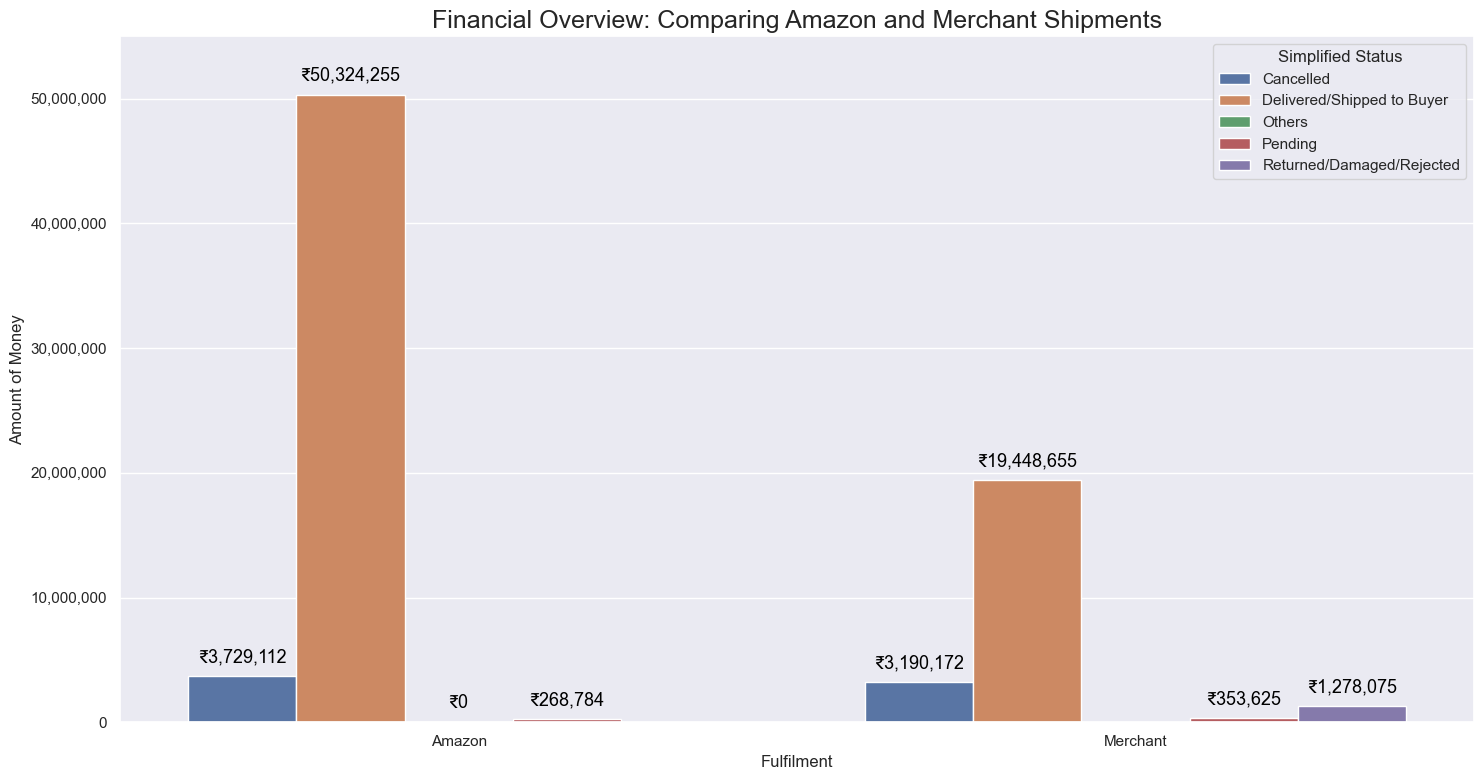

In [60]:
Count_Monthly_Status_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
#     'Promotion-Ids':['sum'],
    'Order_ID':['count']
}

Fulfilement_Monthly_F_C_Amazon_Sale_Report_df = Filtered_C_Amazon_Sale_Report_df.groupby(['Fulfilment','Simplified_Status']).agg(Count_Status_Amazon_Sale_Agg_funcs).reset_index()
Fulfilement_Monthly_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Fulfilement_Monthly_F_C_Amazon_Sale_Report_df.columns]
# Fulfilement_Monthly_F_C_Amazon_Sale_Report_df

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# Plotting the first barplot
sns.barplot(data=Fulfilement_Monthly_F_C_Amazon_Sale_Report_df, x='Fulfilment', y='sum_Amount', hue="Simplified_Status", ci=None, ax=ax[0])

# Extracting bar positions and dimensions for the first subplot
for bar in ax[0].patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if not np.isnan(y):  # Check if y is not NaN
        ax[0].annotate(f"₹{int(y):,}", 
                       (x, y), 
                       textcoords="offset points", 
                       xytext=(0,10), 
                       ha='center',
                       fontsize=13, 
                       color='black')

# Plotting the second barplot
sns.barplot(data=Fulfilement_Monthly_F_C_Amazon_Sale_Report_df, x='Fulfilment', y='count_Order_ID', hue="Simplified_Status", ci=None, ax=ax[1])

# Extracting bar positions and dimensions for the second subplot
for bar in ax[1].patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if not np.isnan(y):  # Check if y is not NaN
        ax[1].annotate(f"{int(y):,}", 
                       (x, y), 
                       textcoords="offset points", 
                       xytext=(0,10), 
                       ha='center',
                       fontsize=13, 
                       color='black')      


# Adjusting titles, labels, etc.
ax[0].set_title('Financial Overview: Comparing Amazon and Merchant Shipments',fontsize=title_fontsize)
ax[0].set_ylabel("Amount of Money")
ax[0].set_xlabel("Fulfilment")
ax[0].legend(title='Simplified Status')



ax[1].set_title('Transaction Count by Shipping Status: Amazon vs. Merchant', fontsize=16)
ax[1].set_ylabel("Transaction Count")
ax[1].set_xlabel("Fulfilment")


# ax[0].set_yscale('log')
ax[0].set_ylim(0, 55000000)

# ax[1].set_yscale('log')
# ax[1].set_ylim(1, 10**5)
ax[1].set_visible(False)


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax[0].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


In [61]:
# Amazon_Status = Fulfilement_Monthly_F_C_Amazon_Sale_Report_df[Fulfilement_Monthly_F_C_Amazon_Sale_Report_df['Fulfilment'] == 'Amazon']
# Merchant_Status = Fulfilement_Monthly_F_C_Amazon_Sale_Report_df[Fulfilement_Monthly_F_C_Amazon_Sale_Report_df['Fulfilment'] != 'Amazon']

# # Create the pie charts
# fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# ax[0].pie(Amazon_Status['count_Order_ID'], labels=Amazon_Status['Simplified_Status'], autopct='%1.1f%%', startangle=110)
# ax[0].set_title('Distribution of Shipping Status in Amazon')

# ax[1].pie(Merchant_Status['count_Order_ID'], labels=Merchant_Status['Simplified_Status'], autopct='%1.1f%%', startangle=110)
# ax[1].set_title('Distribution of Shipping Status in Merchant')


# plt.show()

In [62]:
# Filtered_C_Amazon_Sale_Report_df
Shipped_Filtered_C_Amazon_Sale_Report_df = Filtered_Status_C_Amazon_Sale_Report_df.loc[Filtered_C_Amazon_Sale_Report_df['Simplified_Status'] == 'Delivered/Shipped to Buyer']
# Monthly_CAT_F_C_Amazon_Sale_Report_df.info()

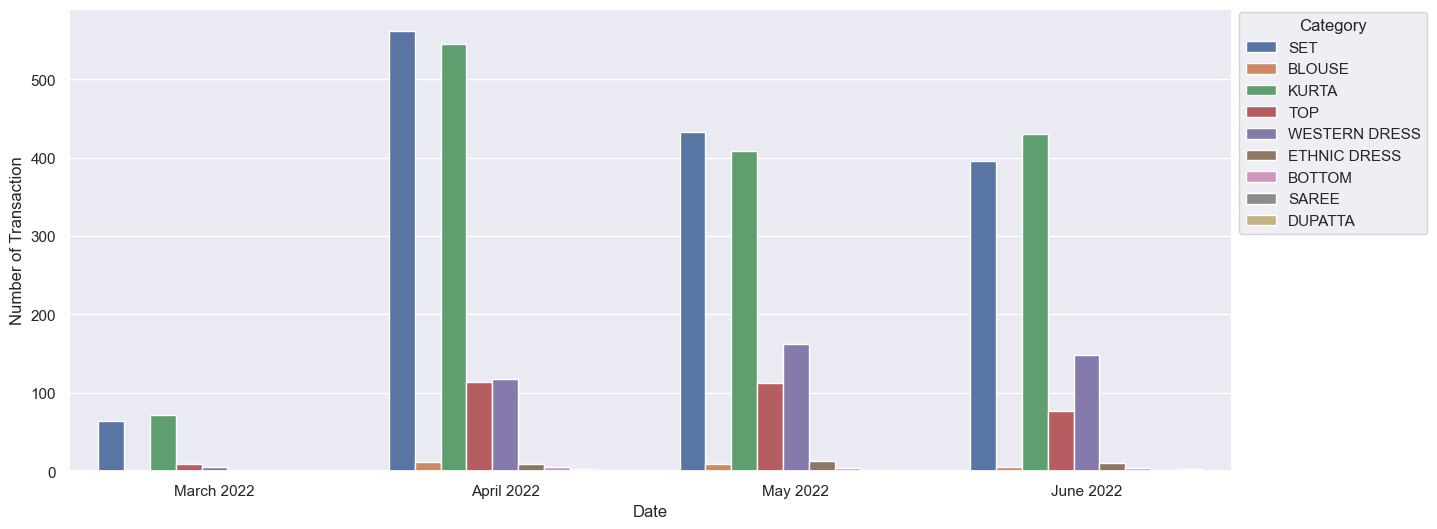

In [63]:
#Distrubtion of Status 
Categories_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'B2B':['sum'],
    'Order_ID':['count'],
    'Promotion-Ids':['max']
}

Monthly_CAT_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Date','Category']).agg(Categories_Amazon_Sale_Agg_funcs).reset_index()
Monthly_CAT_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Monthly_CAT_F_C_Amazon_Sale_Report_df.columns]

Monthly_CAT_F_C_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Monthly_CAT_F_C_Amazon_Sale_Report_df['Date'], format='%d-%m-%Y')
Monthly_CAT_F_C_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Monthly_CAT_F_C_Amazon_Sale_Report_df['Date'])
Monthly_CAT_F_C_Amazon_Sale_Report_df = Monthly_CAT_F_C_Amazon_Sale_Report_df.sort_values(by='Date')

#sort have to come before change date to show month nad year as it will mess up the sort because of its datatype(date to str)
Monthly_CAT_F_C_Amazon_Sale_Report_df['Date']=  Monthly_CAT_F_C_Amazon_Sale_Report_df['Date'].dt.strftime('%B %Y')

# Monthly_CAT_F_C_Amazon_Sale_Report_df
plt.figure(figsize=(15,6))
sns.barplot(data=Monthly_CAT_F_C_Amazon_Sale_Report_df,x='Date',y='count_Order_ID',hue='Category',ci=None)

#Set Legend
handles, _ = plt.gca().get_legend_handles_labels()
leg = plt.legend(handles=handles, title='Category', loc='upper left', frameon=True, bbox_to_anchor=(1, 1.01))
leg.get_title().set_ha('left')

plt.ylabel("Number of Transaction")
plt.xlabel("Date")

# plt.yscale('log')
plt.show()

In [ ]:
# P_N_L_May2022_df
# P_N_L_March2021_df

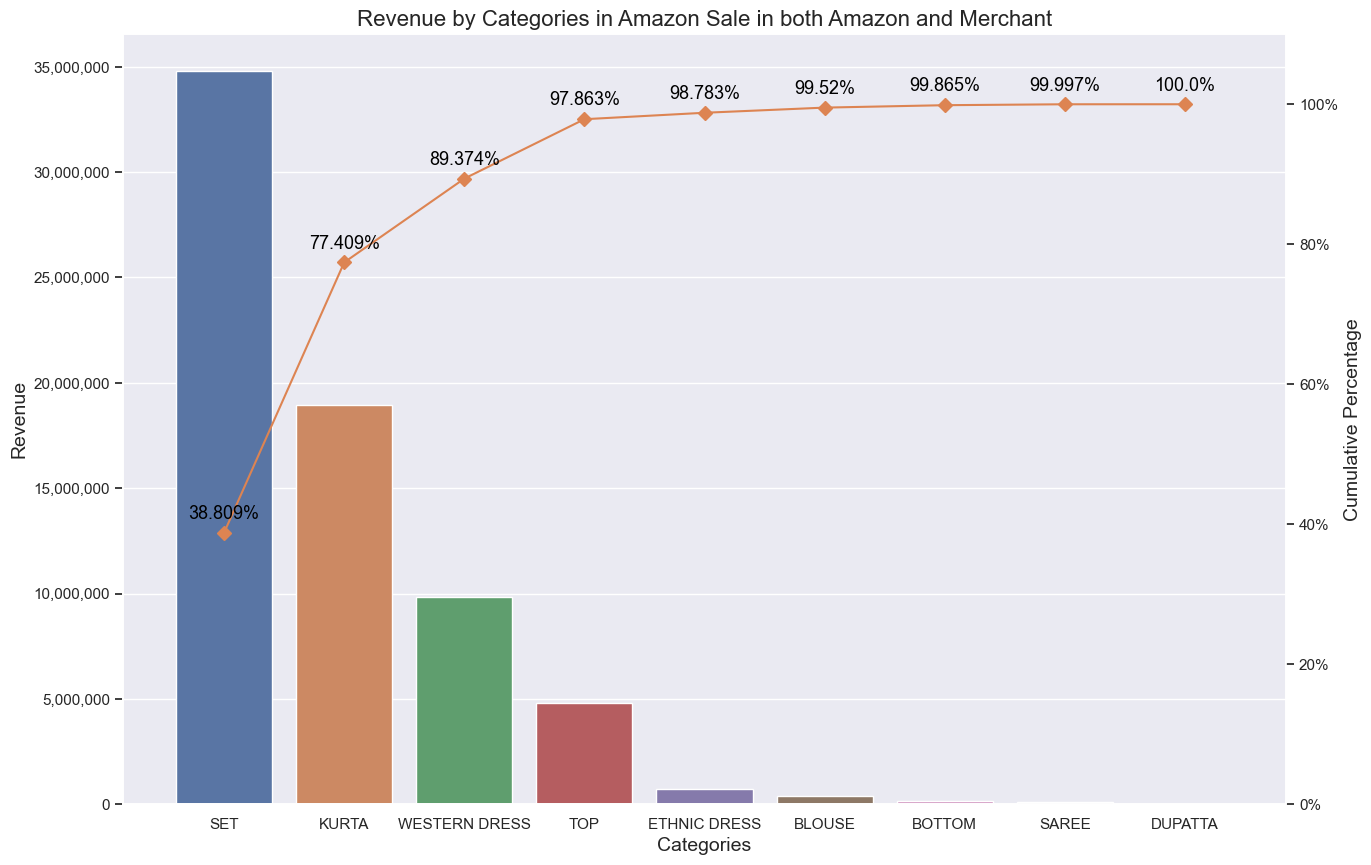

In [65]:
from matplotlib.ticker import PercentFormatter

#Distrubtion of Status 
Market_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'B2B':['sum'],
    'Order_ID':['count'],
    
}

Market_CAT_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Category']).agg(Market_Amazon_Sale_Agg_funcs).reset_index()
Market_CAT_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Market_CAT_F_C_Amazon_Sale_Report_df.columns]

Market_CAT_F_C_Amazon_Sale_Report_df = Market_CAT_F_C_Amazon_Sale_Report_df.sort_values(by='count_Order_ID', ascending=False)
Market_CAT_F_C_Amazon_Sale_Report_df['Cumulative_Percentage'] = Market_CAT_F_C_Amazon_Sale_Report_df["count_Order_ID"].cumsum()/Market_CAT_F_C_Amazon_Sale_Report_df["count_Order_ID"].sum()*100
Market_CAT_F_C_Amazon_Sale_Report_df['Cumulative_Percentage'] = round(Market_CAT_F_C_Amazon_Sale_Report_df['Cumulative_Percentage'],3)


fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=Market_CAT_F_C_Amazon_Sale_Report_df,x='Category',y='sum_Amount',ci=None)

ax2 = ax.twinx()
ax2.plot(Market_CAT_F_C_Amazon_Sale_Report_df['Category'], Market_CAT_F_C_Amazon_Sale_Report_df["Cumulative_Percentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.grid(False)  # Turn off grid for the right y-axis


# Annotate each data point
for idx, row in Market_CAT_F_C_Amazon_Sale_Report_df.iterrows():
    plt.annotate(f"{row['Cumulative_Percentage']}%", 
                 (row['Category'], row['Cumulative_Percentage']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=13, 
                 color='black')


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)


ax.set_title('Revenue by Categories in Amazon Sale in both Amazon and Merchant', fontsize=16)
ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Revenue", fontsize=14)
ax2.set_ylabel("Cumulative Percentage", fontsize=14)


# plt.yscale('log')
ax2.set_ylim([0, 110])
plt.show()
# Market_CAT_F_C_Amazon_Sale_Report_df
# Category set consiting of a langa, a choli and a stole wrapped over it like a saree 

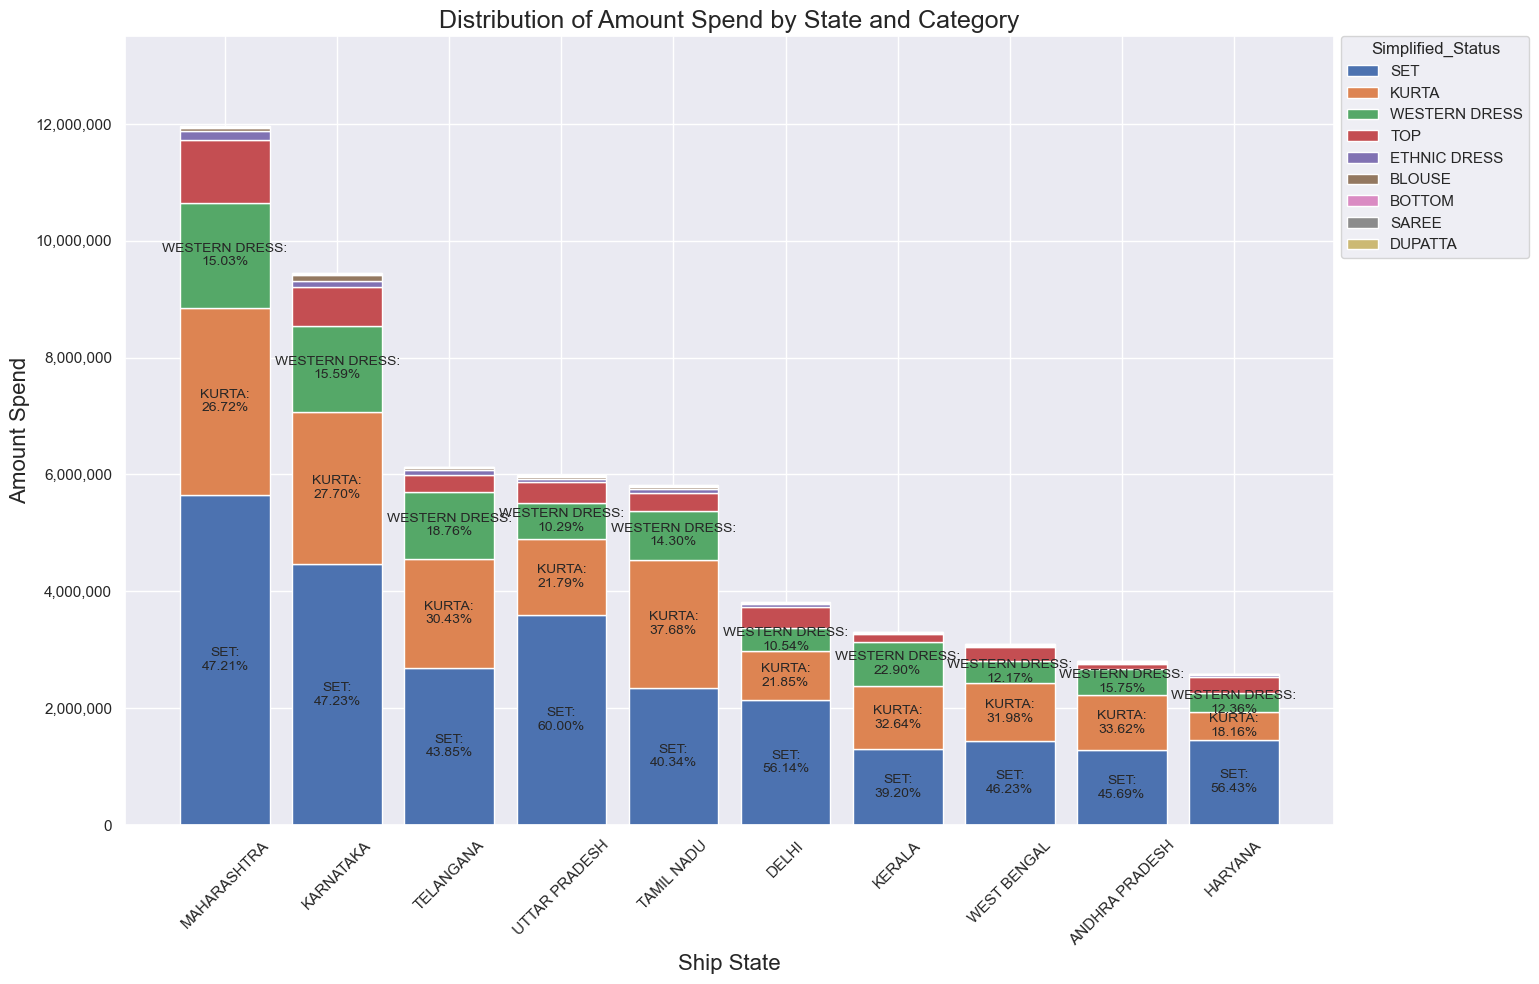

In [66]:
# First, create a pivot table to get counts of each status for each Ship_State
pivot_df = Shipped_Filtered_C_Amazon_Sale_Report_df.pivot_table(index='Ship_State', columns='Category', 
                                                        values='Amount', aggfunc='sum').fillna(0)

# Sort based on the total sum for each state, and take top 5
pivot_df = pivot_df.reindex(pivot_df.sum(axis=1).sort_values(ascending=False).index).head(10)

# Now plot the stacked bar chart
fig, ax = plt.subplots(figsize=(15,10))

# Sort columns based on their sum
sorted_columns = pivot_df.sum(axis=0).sort_values(ascending=False).index
pivot_df = pivot_df[sorted_columns]

bottom_value = np.zeros(len(pivot_df))
for column in pivot_df.columns:
    plt.bar(pivot_df.index, pivot_df[column], bottom=bottom_value, label=column)
    bottom_value += pivot_df[column].values
    
# Annotation for top 3 categories for each state
for idx, state in enumerate(pivot_df.index):
    top_3_categories = pivot_df.loc[state].nlargest(3)
    y_offset = 0  # This helps in placing annotations vertically
    for category, value in top_3_categories.items():
        percentage = (value / bottom_value[idx]) * 100
        plt.annotate(f"{category}:\n{percentage:.2f}%", (idx, y_offset + value/2), ha="center", va="center", rotation=0, fontsize=10)
        y_offset += value  # Move the y_offset for next annotation


        
# Set labels, title, and legend
plt.xlabel('Ship State', fontsize = content_fontsize)
plt.ylabel('Amount Spend', fontsize = content_fontsize)
plt.title('Distribution of Amount Spend by State and Category', fontsize=title_fontsize)
plt.legend(title='Simplified_Status', loc='upper left', bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=45)
plt.tight_layout()


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim([0, 13500000])


plt.show()


In [67]:
Market_CAT_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Category']).agg(Market_Amazon_Sale_Agg_funcs).reset_index()
Market_CAT_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Market_CAT_F_C_Amazon_Sale_Report_df.columns]
Market_CAT_F_C_Amazon_Sale_Report_df = Market_CAT_F_C_Amazon_Sale_Report_df.sort_values(by='count_Order_ID', ascending=False)

# Market_CAT_F_C_Amazon_Sale_Report_df

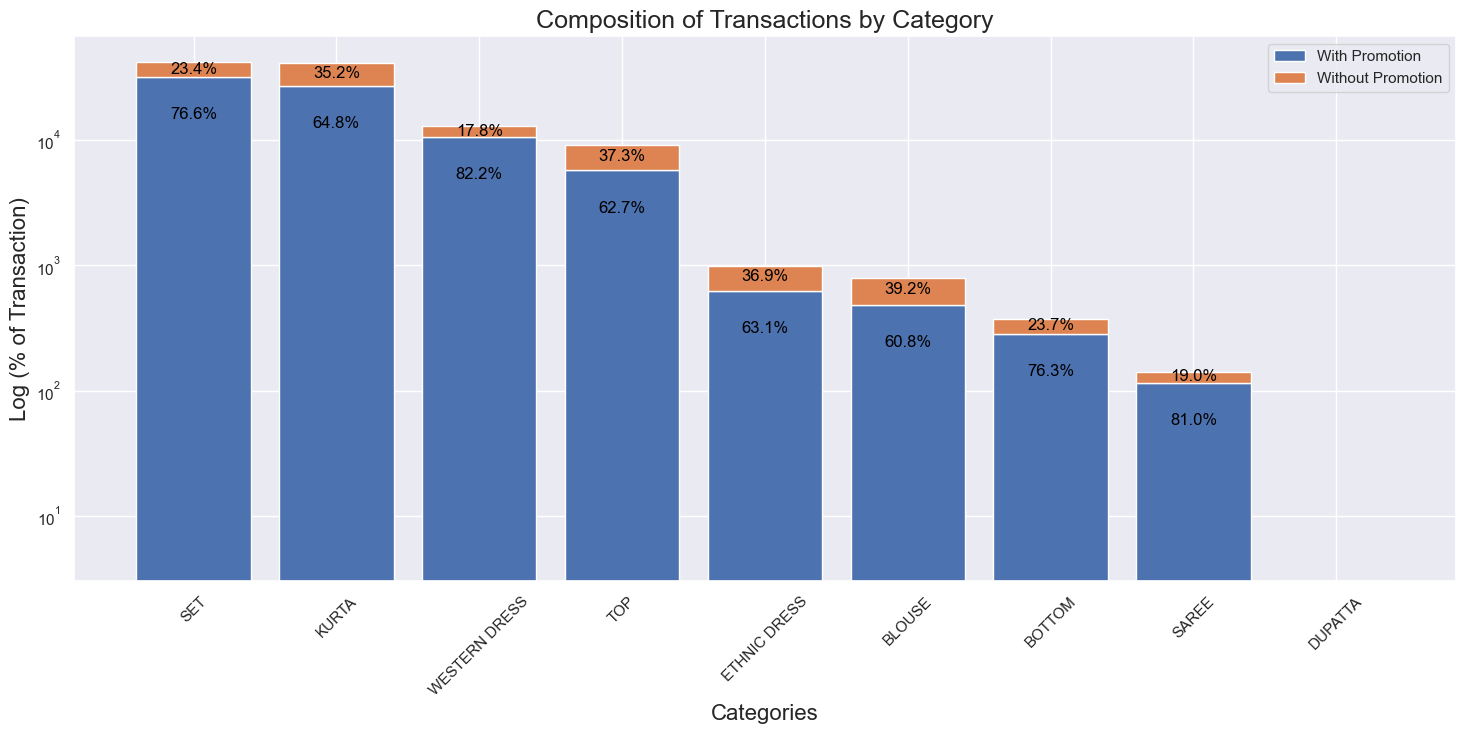

In [68]:
# Prepare the data

Market_CAT_F_C_Amazon_Sale_Report_df['Orders_Without_Promotion'] = Market_CAT_F_C_Amazon_Sale_Report_df['count_Order_ID'] - Market_CAT_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids']

# Create the bar chart
plt.figure(figsize=(15,7.5))
bar_width = 0.8
categories = Market_CAT_F_C_Amazon_Sale_Report_df['Category']

# Plot bars
bars = plt.bar(categories, Market_CAT_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids'], width=bar_width, label='With Promotion')
bars2 = plt.bar(categories, Market_CAT_F_C_Amazon_Sale_Report_df['Orders_Without_Promotion'], bottom=Market_CAT_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids'], width=bar_width, label='Without Promotion')

# Annotate percentages
for (bar, bar2, with_promo, without_promo, total) in zip(bars, bars2, Market_CAT_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids'], Market_CAT_F_C_Amazon_Sale_Report_df['Orders_Without_Promotion'], Market_CAT_F_C_Amazon_Sale_Report_df['count_Order_ID']):
    
    # Calculate percentages
    percentage_with_promo = (with_promo/total)*100
    percentage_without_promo = (without_promo/total)*100
    
    # Add annotation for "with_promo" only if it's not 0%
    if percentage_with_promo > 0:
        plt.annotate(f"{percentage_with_promo:.1f}%", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), ha='center', va='center', color='black', fontsize=12)
    
    # Add annotation for "without_promo" only if it's not 0%
    if percentage_without_promo > 0:
        plt.annotate(f"{percentage_without_promo:.1f}%", (bar2.get_x() + bar2.get_width() / 2, with_promo + bar2.get_height() / 2), ha='center', va='center', color='black', fontsize=12)

# Setting labels, title, and legend
plt.xlabel('Categories' , fontsize = content_fontsize)
plt.ylabel('Log (% of Transaction)' , fontsize = content_fontsize)
plt.title('Composition of Transactions by Category', fontsize = title_fontsize)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.yscale('log')
plt.legend()
plt.show()


In [69]:
# Shipped_Filtered_C_Amazon_Sale_Report_df
# Filtered_C_Amazon_Sale_Report_df.head(5)


In [70]:
#Fulfilment by Amazon and Merchat, who have biggest sum Amount.
Channel_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum','mean'],
#   'Fulfilled-By':['sum'],
#   'B2B':['sum'],
    'Order_ID':['count'],
    'Promotion-Ids':['sum']
    
}

Channel_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Sales_Channel','Fulfilment','Fulfilled-By','Simplified_Status','Category']).agg(Channel_Amazon_Sale_Agg_funcs).reset_index()
Channel_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Channel_F_C_Amazon_Sale_Report_df.columns]
# Channel_F_C_Amazon_Sale_Report_df['sum_B2C'] = Channel_F_C_Amazon_Sale_Report_df['count_Order_ID']-Channel_F_C_Amazon_Sale_Report_df['sum_B2B']

# Channel_F_C_Amazon_Sale_Report_df

Shipped_Channel_F_C_Amazon_SR_df =  Channel_F_C_Amazon_Sale_Report_df.loc[(Channel_F_C_Amazon_Sale_Report_df['Sales_Channel']=='Amazon.in')]

Merch_Shipped_Channel_F_C_Amazon_SR_df = Shipped_Channel_F_C_Amazon_SR_df.loc[Shipped_Channel_F_C_Amazon_SR_df['Fulfilment']=='Merchant']
Amazon_Shipped_Channel_F_C_Amazon_SR_df = Shipped_Channel_F_C_Amazon_SR_df.loc[Shipped_Channel_F_C_Amazon_SR_df['Fulfilment']=='Amazon']


Merch_Shipped_Channel_F_C_Amazon_SR_df = Merch_Shipped_Channel_F_C_Amazon_SR_df.append({'Category':'DUPATTA', 'sum_Amount':0}, ignore_index=True)
Merch_Shipped_Channel_F_C_Amazon_SR_df = Merch_Shipped_Channel_F_C_Amazon_SR_df.replace(np.NaN,'0')

# Merch_Shipped_Channel_F_C_Amazon_SR_df
# Amazon_Shipped_Channel_F_C_Amazon_SR_df.reset_index()
# Shipped_Channel_F_C_Amazon_SR_df
# Merch_Shipped_Channel_F_C_Amazon_SR_df

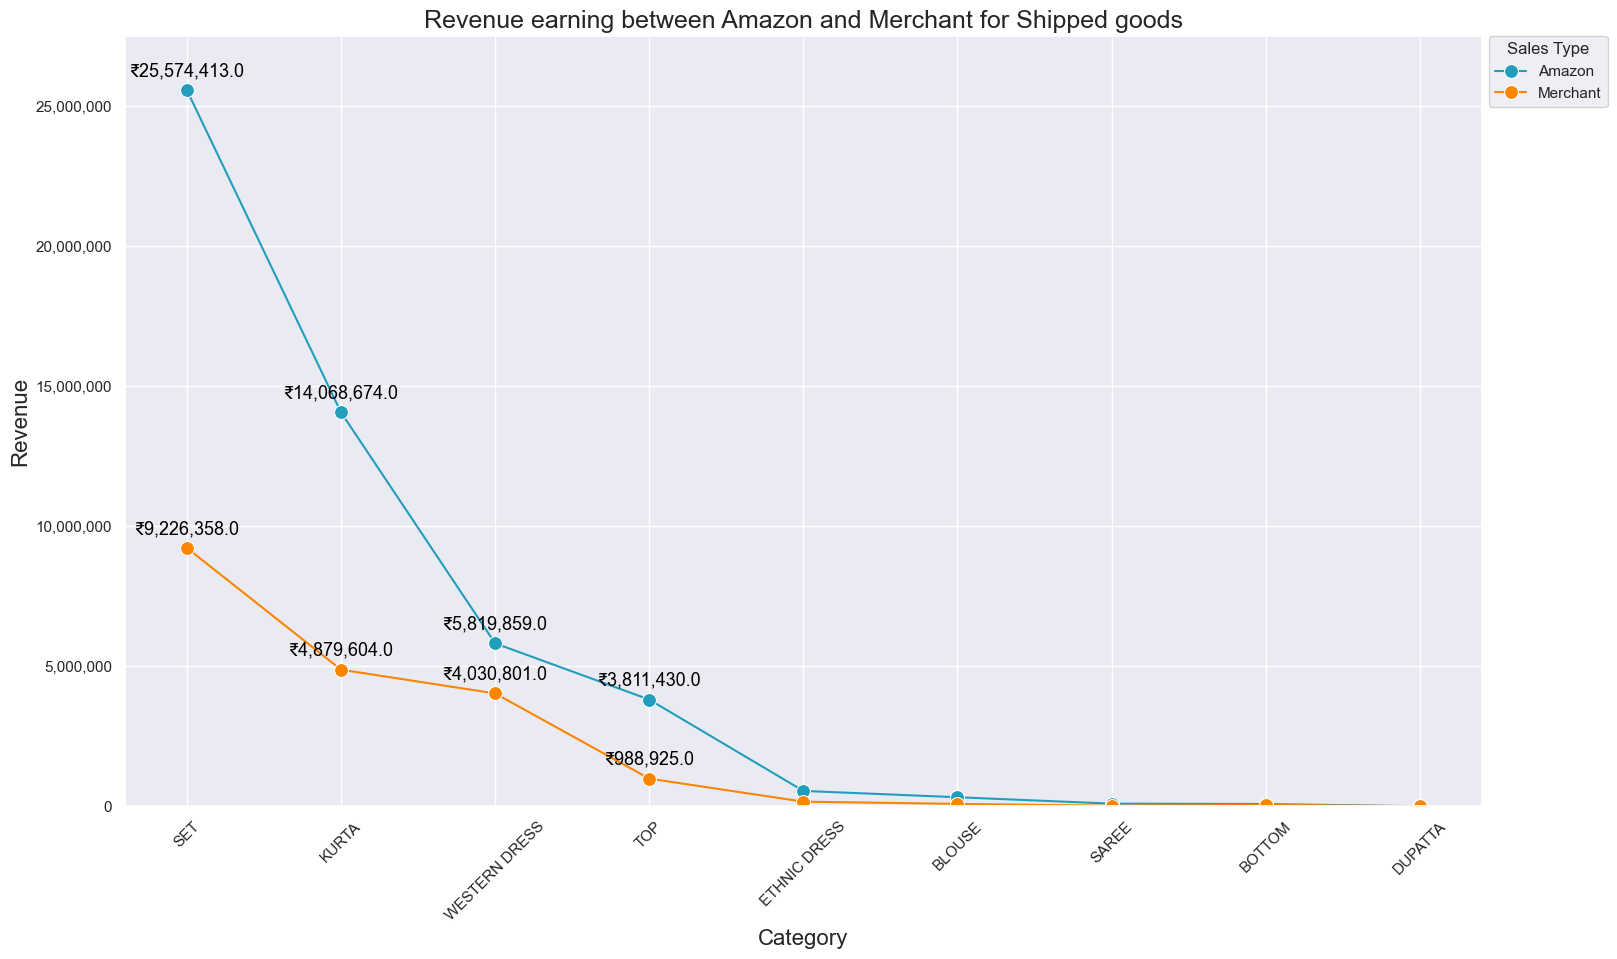

In [71]:

plt.figure(figsize=(17.5,10))

channel_markersize= 10
marker_style = 'o'
top_product = 4

sorted_Amazon_Shipped_df = Amazon_Shipped_Channel_F_C_Amazon_SR_df.sort_values(by='sum_Amount', ascending=False)
sorted_Merch_Shipped_df = Merch_Shipped_Channel_F_C_Amazon_SR_df.sort_values(by='sum_Amount', ascending=False)


ax = sns.lineplot(
    data=sorted_Amazon_Shipped_df, y="sum_Amount", x="Category", color = '#219ebc',label='Amazon',marker=marker_style,markersize=channel_markersize  
)

ax2 = sns.lineplot(
    data=sorted_Merch_Shipped_df, y="sum_Amount", x="Category", color = '#fb8500',label='Merchant',marker=marker_style,markersize=channel_markersize
)
colors_status = ['#219ebc', '#fb8500']


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

#Getting top product
top_3_df = sorted_Amazon_Shipped_df.sort_values(by='sum_Amount', ascending=False).head(top_product)
top_M_3_df = sorted_Merch_Shipped_df.sort_values(by='sum_Amount', ascending=False).head(top_product)


# Annotate each data point
for idx, row in top_3_df.iterrows():
    plt.annotate(f"₹{row['sum_Amount']:,}", 
                 (row['Category'], row['sum_Amount']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=13, 
                 color='black')
for idx, row in top_M_3_df.iterrows():
    plt.annotate(f"₹{row['sum_Amount']:,}", 
                 (row['Category'], row['sum_Amount']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=13, 
                 color='black')

plt.title('Revenue earning between Amazon and Merchant for Shipped goods', fontsize = title_fontsize)

ax.legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=45)

plt.xlabel('Category', fontsize = content_fontsize)
plt.ylabel('Revenue', fontsize = content_fontsize)
ax.set_ylim([0, 27500000])

# plt.yscale('log')
# plt.ylim(1, None)

plt.show()

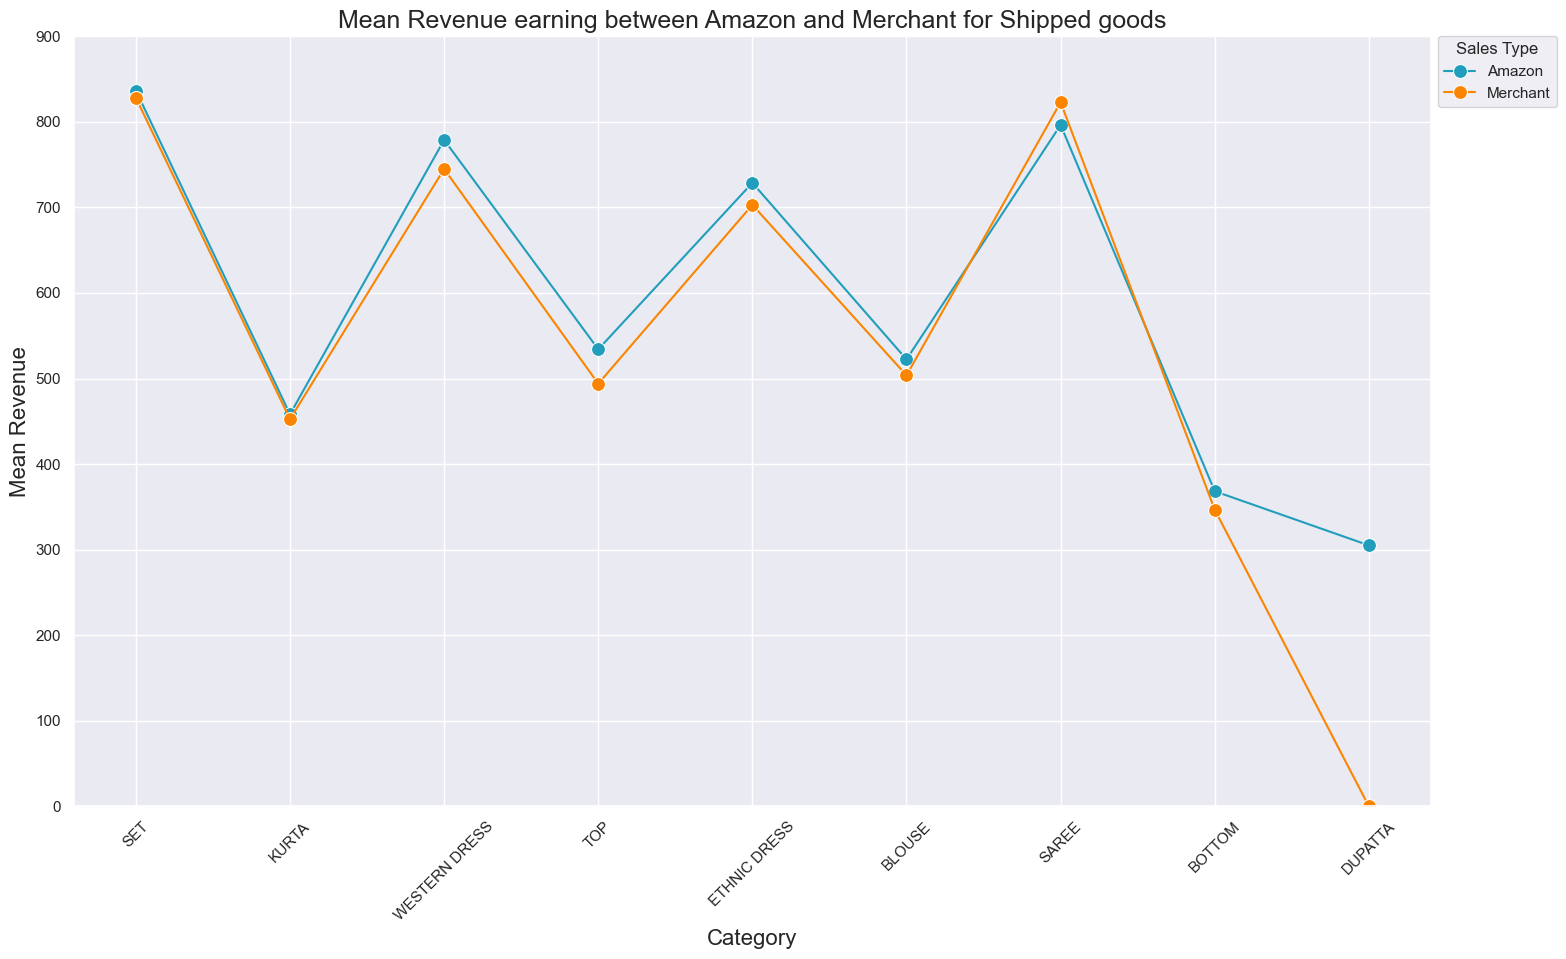

In [72]:
#Market Between B2B and B2C Average spending, item.
plt.figure(figsize=(17.5,10))


sorted_Amazon_Shipped_df = Amazon_Shipped_Channel_F_C_Amazon_SR_df.sort_values(by='sum_Amount', ascending=False)
sorted_Merch_Shipped_df = Merch_Shipped_Channel_F_C_Amazon_SR_df.sort_values(by='sum_Amount', ascending=False)


ax = sns.lineplot(
    data=sorted_Amazon_Shipped_df, y="mean_Amount", x="Category", color = '#219ebc',label='Amazon',marker=marker_style,markersize=channel_markersize  
)

ax2 = sns.lineplot(
    data=sorted_Merch_Shipped_df, y="mean_Amount", x="Category", color = '#fb8500',label='Merchant',marker=marker_style,markersize=channel_markersize
)

# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)


# #Getting top product
# top_3_df = sorted_Amazon_Shipped_df.sort_values(by='sum_Amount', ascending=False).head(top_product)
# top_M_3_df = sorted_Merch_Shipped_df.sort_values(by='sum_Amount', ascending=False).head(top_product)

# # Annotate each data point
# for idx, row in top_3_df.iterrows():
#     plt.annotate(f"${row['mean_Amount']:,}", 
#                  (row['Category'], row['mean_Amount']), 
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center',
#                  fontsize=13, 
#                  color='black')
# for idx, row in top_M_3_df.iterrows():
#     plt.annotate(f"${row['mean_Amount']:,}", 
#                  (row['Category'], row['mean_Amount']), 
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center',
#                  fontsize=13, 
#                  color='black')


plt.title('Mean Revenue earning between Amazon and Merchant for Shipped goods',fontsize = title_fontsize)

ax.legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=45)
ax.set_ylim([0, 900])

plt.xlabel('Category',fontsize = content_fontsize)
plt.ylabel('Mean Revenue',fontsize = content_fontsize)
    
plt.show()


In [73]:
# Shipped_C_Amazon_Sale_Report_df = Filtered_C_Amazon_Sale_Report_df.loc[Filtered_C_Amazon_Sale_Report_df['Simplified_Status']!='Cancelled']
# Shipped_C_Amazon_Sale_Report_df.loc[Shipped_C_Amazon_Sale_Report_df['Category']=='DUPATTA']

In [74]:
Shipped_Filtered_C_Amazon_Sale_Report_df['Simplified_Status'].unique()

array(['Delivered/Shipped to Buyer'], dtype=object)

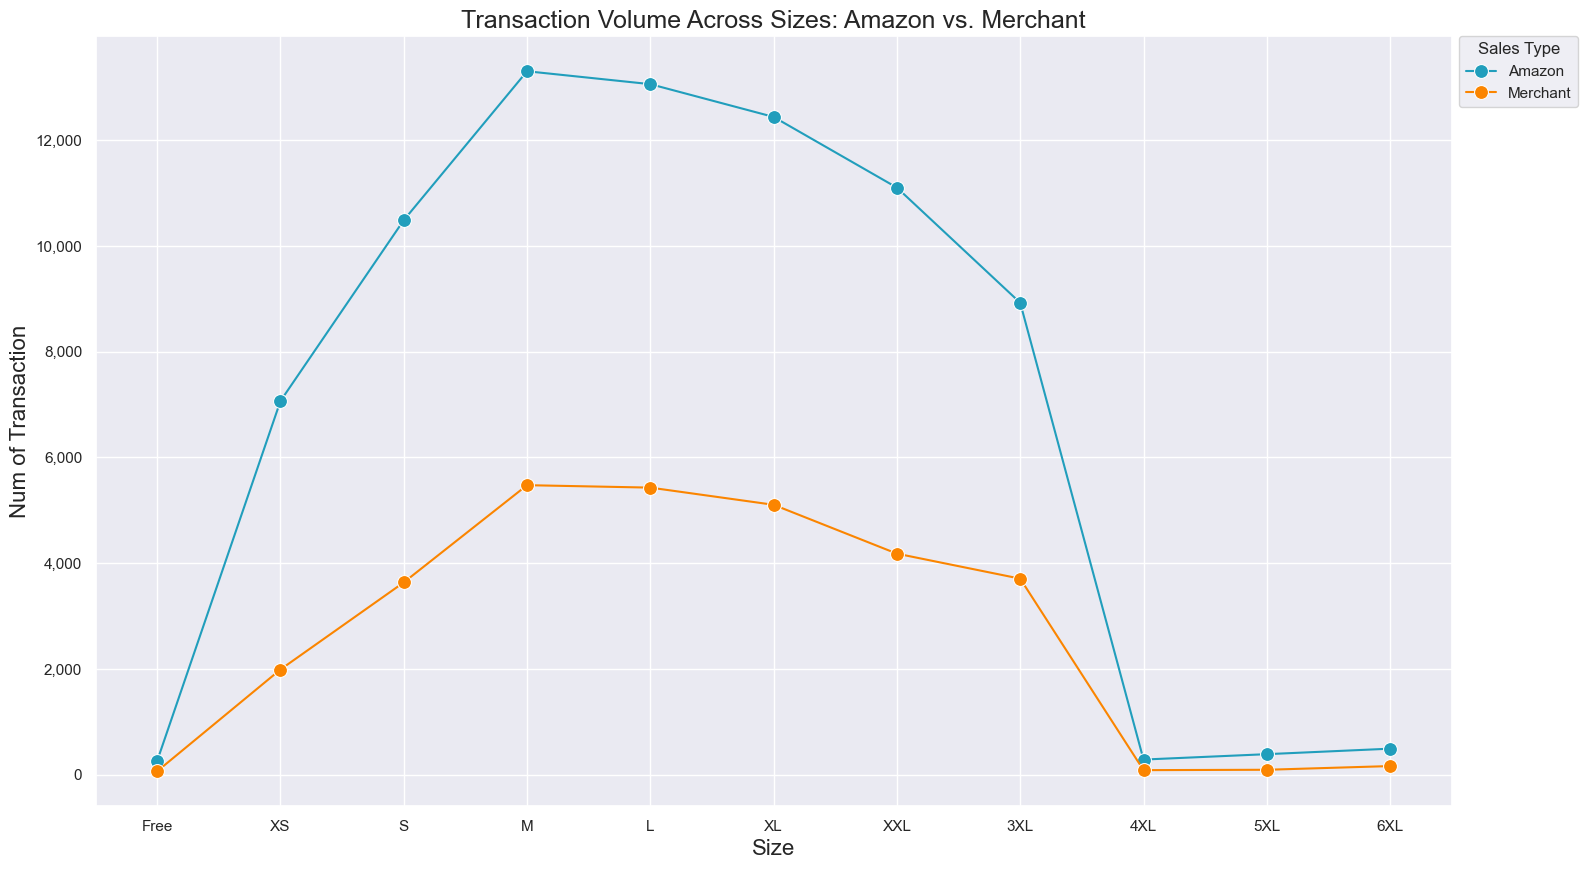

In [75]:
## Size popular

#Fulfilment by Amazon and Merchat, who have biggest sum Amount.
Size_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum','mean'],
#   'Fulfilled-By':['sum'],
#   'B2B':['sum'],
    'Order_ID':['count'],
    'Promotion-Ids':['sum'],
    'B2B':['sum']
}

Size_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Fulfilment','Size']).agg(Size_Amazon_Sale_Agg_funcs).reset_index()
Size_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Size_F_C_Amazon_Sale_Report_df.columns]

Amazon_Size_F_C_Amazon_Sale_Report_df = Size_F_C_Amazon_Sale_Report_df.loc[Size_F_C_Amazon_Sale_Report_df['Fulfilment']=='Amazon']
Merchant_Size_F_C_Amazon_Sale_Report_df = Size_F_C_Amazon_Sale_Report_df.loc[Size_F_C_Amazon_Sale_Report_df['Fulfilment']!='Amazon']


# Define your custom order
Size_Order = ['Free', 'XS', 'S', 'M', 'L','XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

Merchant_Size_F_C_Amazon_Sale_Report_df['Size'] = pd.Categorical(Merchant_Size_F_C_Amazon_Sale_Report_df['Size'], categories=Size_Order, ordered=True)
Sorted_Size_Merchant_Amazon_Sale_Report = Merchant_Size_F_C_Amazon_Sale_Report_df.sort_values(by='Size')

Amazon_Size_F_C_Amazon_Sale_Report_df['Size'] = pd.Categorical(Amazon_Size_F_C_Amazon_Sale_Report_df['Size'], categories=Size_Order, ordered=True)
Sorted_Size_Amazon_Sale_Report = Amazon_Size_F_C_Amazon_Sale_Report_df.sort_values(by='Size')



plt.figure(figsize=(17.5,10))

ax = sns.lineplot(
    data=Sorted_Size_Amazon_Sale_Report, y="count_Order_ID", x="Size", color = '#219ebc',label='Amazon',marker=marker_style,markersize=channel_markersize  
)

ax2 = sns.lineplot(
    data=Sorted_Size_Merchant_Amazon_Sale_Report, y="count_Order_ID", x="Size", color = '#fb8500',label='Merchant',marker=marker_style,markersize=channel_markersize
)


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.title('Transaction Volume Across Sizes: Amazon vs. Merchant',fontsize = title_fontsize)
plt.ylabel('Num of Transaction',fontsize = content_fontsize)
plt.xlabel('Size',fontsize = content_fontsize)

ax.legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
# plt.xticks(rotation=45)
    
plt.show()


In [76]:
# Shipped_C_Amazon_Sale_Report_df.loc[Shipped_C_Amazon_Sale_Report_df['B2B']==True]


In [77]:
B2B_Amazon_Sale_Agg_funcs = {
    'Amount':['sum','mean'],
    'Order_ID':['count'],
    'Promotion-Ids':['sum'],
#     'B2B':['sum']
}

B2B_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Fulfilment','B2B']).agg(B2B_Amazon_Sale_Agg_funcs).reset_index()
B2B_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in B2B_F_C_Amazon_Sale_Report_df.columns]
B2B_F_C_Amazon_Sale_Report_df['Ratio'] = round(B2B_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids']/B2B_F_C_Amazon_Sale_Report_df['count_Order_ID'],2)


Amazon_B2B_F_C_Amazon_Sale_Report_df = B2B_F_C_Amazon_Sale_Report_df.loc[B2B_F_C_Amazon_Sale_Report_df['Fulfilment']=='Amazon']
Merchant_B2B_F_C_Amazon_Sale_Report_df = B2B_F_C_Amazon_Sale_Report_df.loc[B2B_F_C_Amazon_Sale_Report_df['Fulfilment']=='Merchant']

B2B_F_C_Amazon_Sale_Report_df

,Fulfilment,B2B,sum_Amount,mean_Amount,count_Order_ID,sum_Promotion-Ids,Ratio
0,Amazon,False,49960881.0,648.286936,77273,46614,0.60
1,Amazon,True,363374.0,685.611321,531,281,0.53
2,Merchant,False,19261902.0,649.314074,29673,29633,1.00
3,Merchant,True,186753.0,735.248031,254,254,1.00


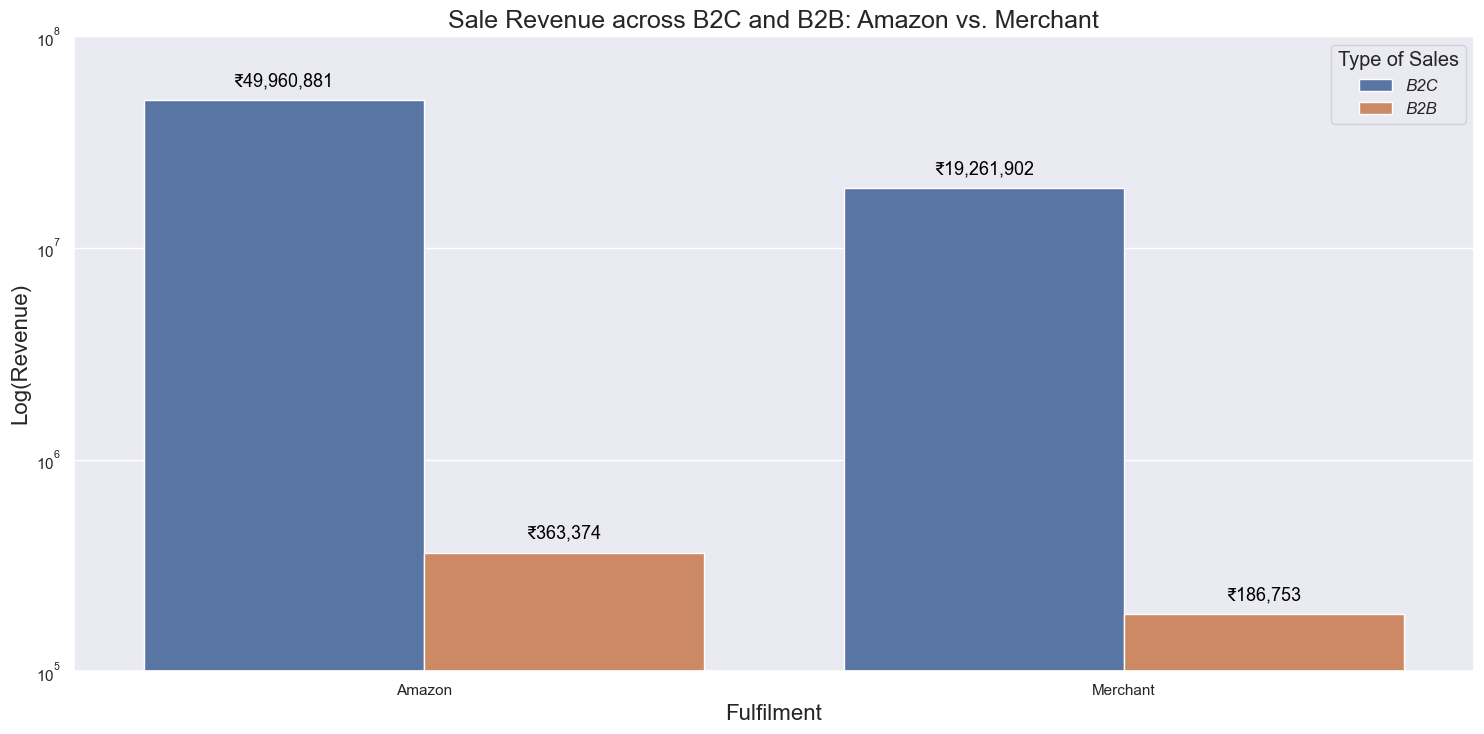

In [101]:
# Create the pie chart
# fig, ax = plt.subplots(2, 2, figsize=(10, 10))

plt.figure(figsize=(15,7.5))
ax = sns.barplot(data=B2B_F_C_Amazon_Sale_Report_df,x='Fulfilment',y='sum_Amount',hue='B2B',ci=None)

# # Annotate each data point
# for idx, row in B2B_F_C_Amazon_Sale_Report_df.iterrows():
#     plt.annotate(f"{row['count_Order_ID']}", 
#                  (row['Fulfilment'], row['count_Order_ID']), 
#                  textcoords="offset points", 
#                  xytext=(0,10), 
#                  ha='center',
#                  fontsize=13, 
#                  color='black')
    
# Extracting bar positions and dimensions
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.annotate(f"₹{int(y):,}", 
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=13, 
                 color='black')

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['B2C', 'B2B'], title='Type of Sales', title_fontsize='large', prop={"size":12, "style": "italic"})
    
plt.yscale('log')
plt.ylim(10**5, 10**8)

plt.title('Sale Revenue across B2C and B2B: Amazon vs. Merchant',fontsize = title_fontsize)
plt.ylabel('Log(Revenue)',fontsize = content_fontsize)
plt.xlabel('Fulfilment',fontsize = content_fontsize)

plt.tight_layout()
plt.show()

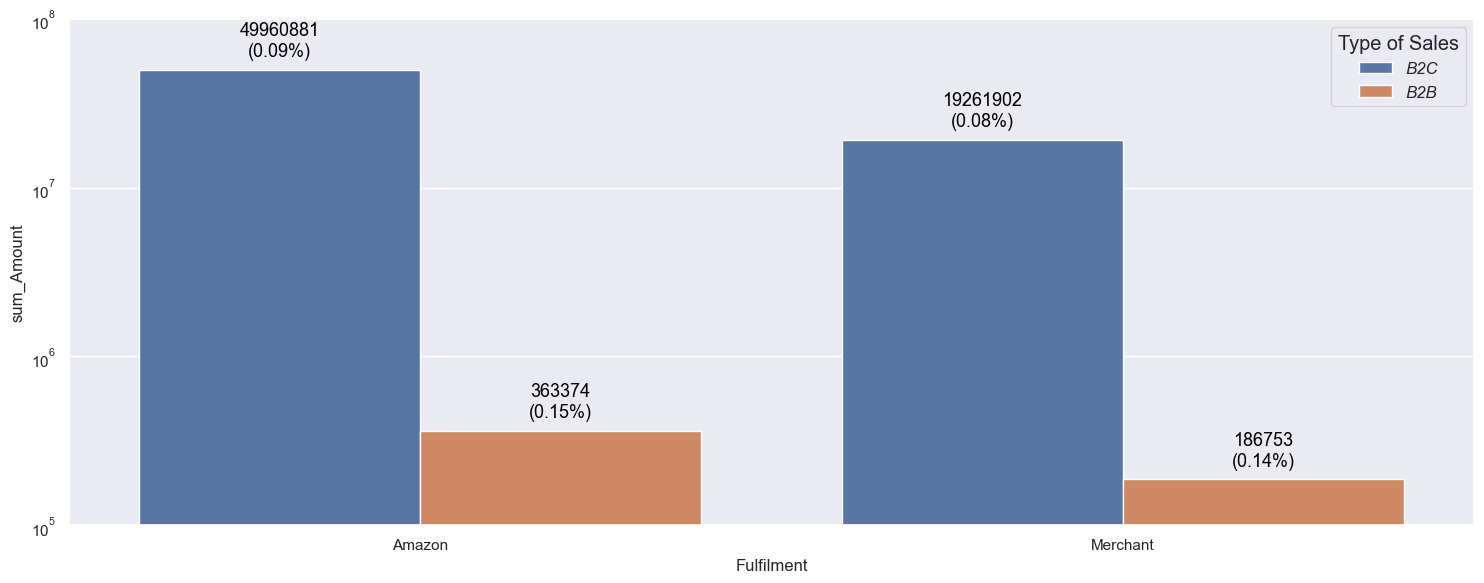

In [79]:
# Calculate the percentage of amount with promotions
B2B_F_C_Amazon_Sale_Report_df['promotion_percentage'] = (B2B_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids'] / B2B_F_C_Amazon_Sale_Report_df['sum_Amount']) * 100

# Plotting
plt.figure(figsize=(15,6))
ax = sns.barplot(data=B2B_F_C_Amazon_Sale_Report_df, x='Fulfilment', y='sum_Amount', hue='B2B', ci=None)

# Extracting bar positions and dimensions
for bar, percentage in zip(ax.patches, B2B_F_C_Amazon_Sale_Report_df['promotion_percentage']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f"{int(y)}\n({percentage:.2f}%)"
    plt.annotate(label, 
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=13, 
                 color='black')

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['B2C', 'B2B'], title='Type of Sales', title_fontsize='large', prop={"size":12, "style": "italic"})
    
plt.yscale('log')
plt.ylim(10**5, 10**8)

plt.tight_layout()
plt.show()

### Monthly Transaction Between Amazon and Merchart (B2B or B2C)

In [80]:
import matplotlib.dates as mdates


In [81]:
B2B_Amazon_Sale_Agg_funcs = {
    'Amount':['sum','mean'],
    'Order_ID':['count'],
    'Promotion-Ids':['sum'],
#     'B2B':['sum']
}

Monthly_Transaction_B2B_Amazon_Sale_Report_df = Filtered_Status_C_Amazon_Sale_Report_df.groupby(['Date','Category','Fulfilment','B2B']).agg(B2B_Amazon_Sale_Agg_funcs).reset_index()
Monthly_Transaction_B2B_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Monthly_Transaction_B2B_Amazon_Sale_Report_df.columns]
Monthly_Transaction_B2B_Amazon_Sale_Report_df['Discouted_to_NormalPrice_Ratio'] = round(Monthly_Transaction_B2B_Amazon_Sale_Report_df['sum_Promotion-Ids']/Monthly_Transaction_B2B_Amazon_Sale_Report_df['count_Order_ID'],2)


Amazon_B2B_F_C_Amazon_Sale_Report_df = Monthly_Transaction_B2B_Amazon_Sale_Report_df.loc[Monthly_Transaction_B2B_Amazon_Sale_Report_df['Fulfilment']=='Amazon']
Merchant_B2B_F_C_Amazon_Sale_Report_df = Monthly_Transaction_B2B_Amazon_Sale_Report_df.loc[Monthly_Transaction_B2B_Amazon_Sale_Report_df['Fulfilment']=='Merchant']

Merchant_B2B_F_C_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Merchant_B2B_F_C_Amazon_Sale_Report_df['Date'], format='%d-%m-%Y')
Amazon_B2B_F_C_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Amazon_B2B_F_C_Amazon_Sale_Report_df['Date'], format='%d-%m-%Y')

# Define start and end dates for the filter
start_date = '2022-04-01'
end_date = '2022-04-30'

# Filter the DataFrame based on the date range
Monthly_Transaction_B2B_Amazon_Sale_Report_df['Date'] = pd.to_datetime(Monthly_Transaction_B2B_Amazon_Sale_Report_df['Date'], format='%d-%m-%Y')

filtered_df_test = Monthly_Transaction_B2B_Amazon_Sale_Report_df.loc[(Monthly_Transaction_B2B_Amazon_Sale_Report_df['Date'] >= start_date) & 
                                                            (Monthly_Transaction_B2B_Amazon_Sale_Report_df['Date'] <= end_date)]

# Monthly_Transaction_B2B_Amazon_Sale_Report_df

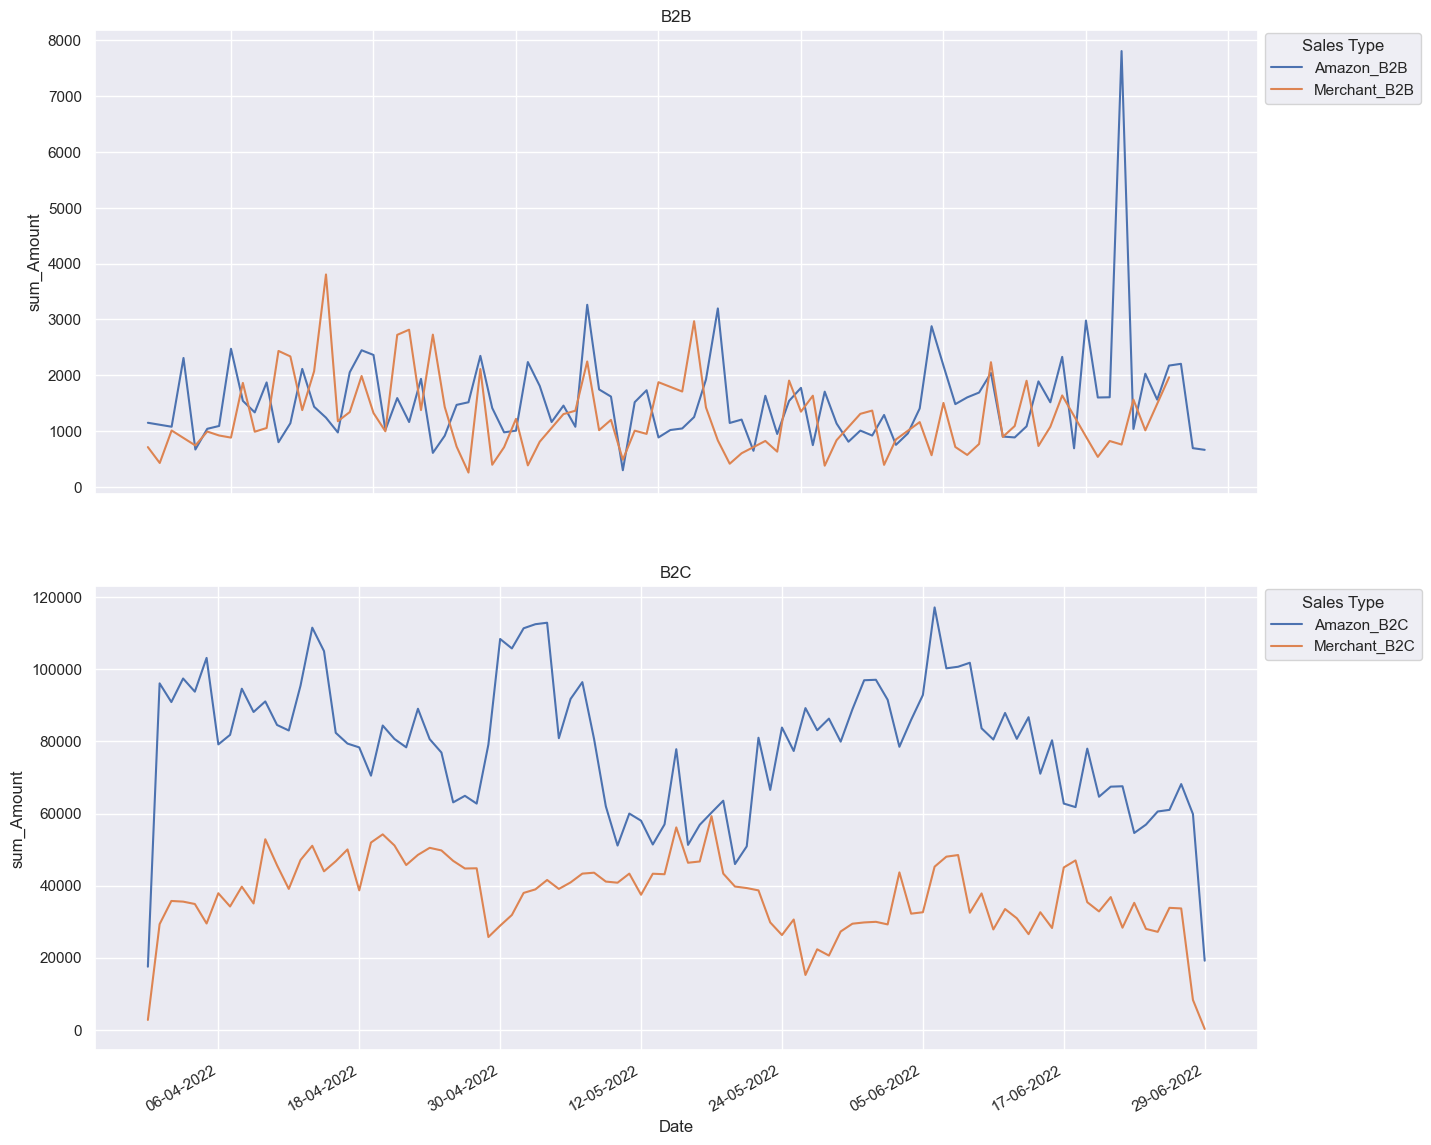

In [82]:


# Merchant_B2B_F_C_Amazon_Sale_Report_df['Date'] = Merchant_B2B_F_C_Amazon_Sale_Report_df['Date'].dt.strftime('%B-%Y')
# Amazon_B2B_F_C_Amazon_Sale_Report_df['Date'] = Amazon_B2B_F_C_Amazon_Sale_Report_df['Date'].dt.strftime('%B-%Y')

# Merchant_B2B_F_C_Amazon_Sale_Report_df.columns
# Amazon_B2B_F_C_Amazon_Sale_Report_df


# Merchant_B2B_F_C_Amazon_Sale_Report_df['Date']= pd.to_datetime(Merchant_B2B_F_C_Amazon_Sale_Report_df['Date'])

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

y_axis ='sum_Amount'
x_axis ='Date'

# First lineplot on ax[0]
sns.lineplot(data=Amazon_B2B_F_C_Amazon_Sale_Report_df[Amazon_B2B_F_C_Amazon_Sale_Report_df['B2B'] == True], 
             x=x_axis, y=y_axis, ax=ax[0], ci=None, label='Amazon_B2B')

# Second lineplot on ax[1]
sns.lineplot(data=Amazon_B2B_F_C_Amazon_Sale_Report_df[Amazon_B2B_F_C_Amazon_Sale_Report_df['B2B'] != True], 
             x=x_axis, y=y_axis, ax=ax[1], ci=None, label='Amazon_B2C')


# First lineplot on ax[0]
sns.lineplot(data=Merchant_B2B_F_C_Amazon_Sale_Report_df[Merchant_B2B_F_C_Amazon_Sale_Report_df['B2B'] == True], 
             x=x_axis, y=y_axis, ax=ax[0], ci=None, label='Merchant_B2B')

# Second lineplot on ax[1]
sns.lineplot(data=Merchant_B2B_F_C_Amazon_Sale_Report_df[Merchant_B2B_F_C_Amazon_Sale_Report_df['B2B'] != True], 
             x=x_axis, y=y_axis, ax=ax[1], ci=None, label='Merchant_B2C')

date_interval = 12

# Set major ticks every 15 days
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=date_interval))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[0].set_title('B2B')

ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=date_interval))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[1].set_title('B2C')

# ax[0].set_yscale('log')
# ax[0].set_ylim(10**2.25, None)

# ax[1].set_yscale('log')
# ax[1].set_ylim(10**2.25, None)

ax[0].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
ax[1].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))

fig.autofmt_xdate()  # rotates and aligns the x labels
plt.show()


In [83]:
# Shipped_Filtered_C_Amazon_Sale_Report_df
# Amazon_B2B_F_C_Amazon_Sale_Report_df
# Shipped_Filtered_C_Amazon_Sale_Report_df
# Discount_Ratio_F_C_Amazon_Sale_Report_df

In [124]:
# Discouted_to_NormalPrice_Ratio
Merchant_B2B_Sale_Agg_funcs = {
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'Order_ID':['count'],
#     'B2B':['sum']
}

Discount_Ratio_F_C_Amazon_Sale_Report_df = Shipped_Filtered_C_Amazon_Sale_Report_df.groupby(['Fulfilment','Category','B2B']).agg(Merchant_B2B_Sale_Agg_funcs).reset_index()
Discount_Ratio_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Discount_Ratio_F_C_Amazon_Sale_Report_df.columns]
Discount_Ratio_F_C_Amazon_Sale_Report_df = Discount_Ratio_F_C_Amazon_Sale_Report_df.sort_values(by='Category')

Discount_Ratio_F_C_Amazon_Sale_Report_df['Discouted_Transaction_Ratio'] = round(Discount_Ratio_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids']/Discount_Ratio_F_C_Amazon_Sale_Report_df['count_Order_ID'],2)

Amazon_DR_Amazon_Sale_Report_df = Discount_Ratio_F_C_Amazon_Sale_Report_df.loc[Discount_Ratio_F_C_Amazon_Sale_Report_df['Fulfilment']=='Amazon']
Merchant_DR_Amazon_Sale_Report_df = Discount_Ratio_F_C_Amazon_Sale_Report_df.loc[Discount_Ratio_F_C_Amazon_Sale_Report_df['Fulfilment']!='Amazon']

# Merch_Shipped_Channel_F_C_Amazon_SR_df = Merch_Shipped_Channel_F_C_Amazon_SR_df.append({'Category':'DUPATTA', 'sum_Amount':0}, ignore_index=True)
# Merchant_DR_Amazon_Sale_Report_df  = Merchant_DR_Amazon_Sale_Report_df.append({'Fulfilment':'Merchant','Category':'SAREE','B2B':True, 'sum_Amount':0,'Discouted_Transaction_Ratio':0}, ignore_index=True)
# Merchant_DR_Amazon_Sale_Report_df  = Merchant_DR_Amazon_Sale_Report_df.append({'Fulfilment':'Merchant','Category':'DUPATTA','B2B':False, 'sum_Amount':0,'Discouted_Transaction_Ratio':0}, ignore_index=True)
# Merchant_DR_Amazon_Sale_Report_df  = Merchant_DR_Amazon_Sale_Report_df.append({'Fulfilment':'Merchant','Category':'BOTTOM','B2B':True, 'sum_Amount':0,'Discouted_Transaction_Ratio':0}, ignore_index=True)



In [85]:
# Amazon_DR_Amazon_Sale_Report_df[Amazon_DR_Amazon_Sale_Report_df['B2B'] == True]
# Amazon_DR_Amazon_Sale_Report_df[Amazon_DR_Amazon_Sale_Report_df['B2B'] == False]
# Merchant_DR_Amazon_Sale_Report_df

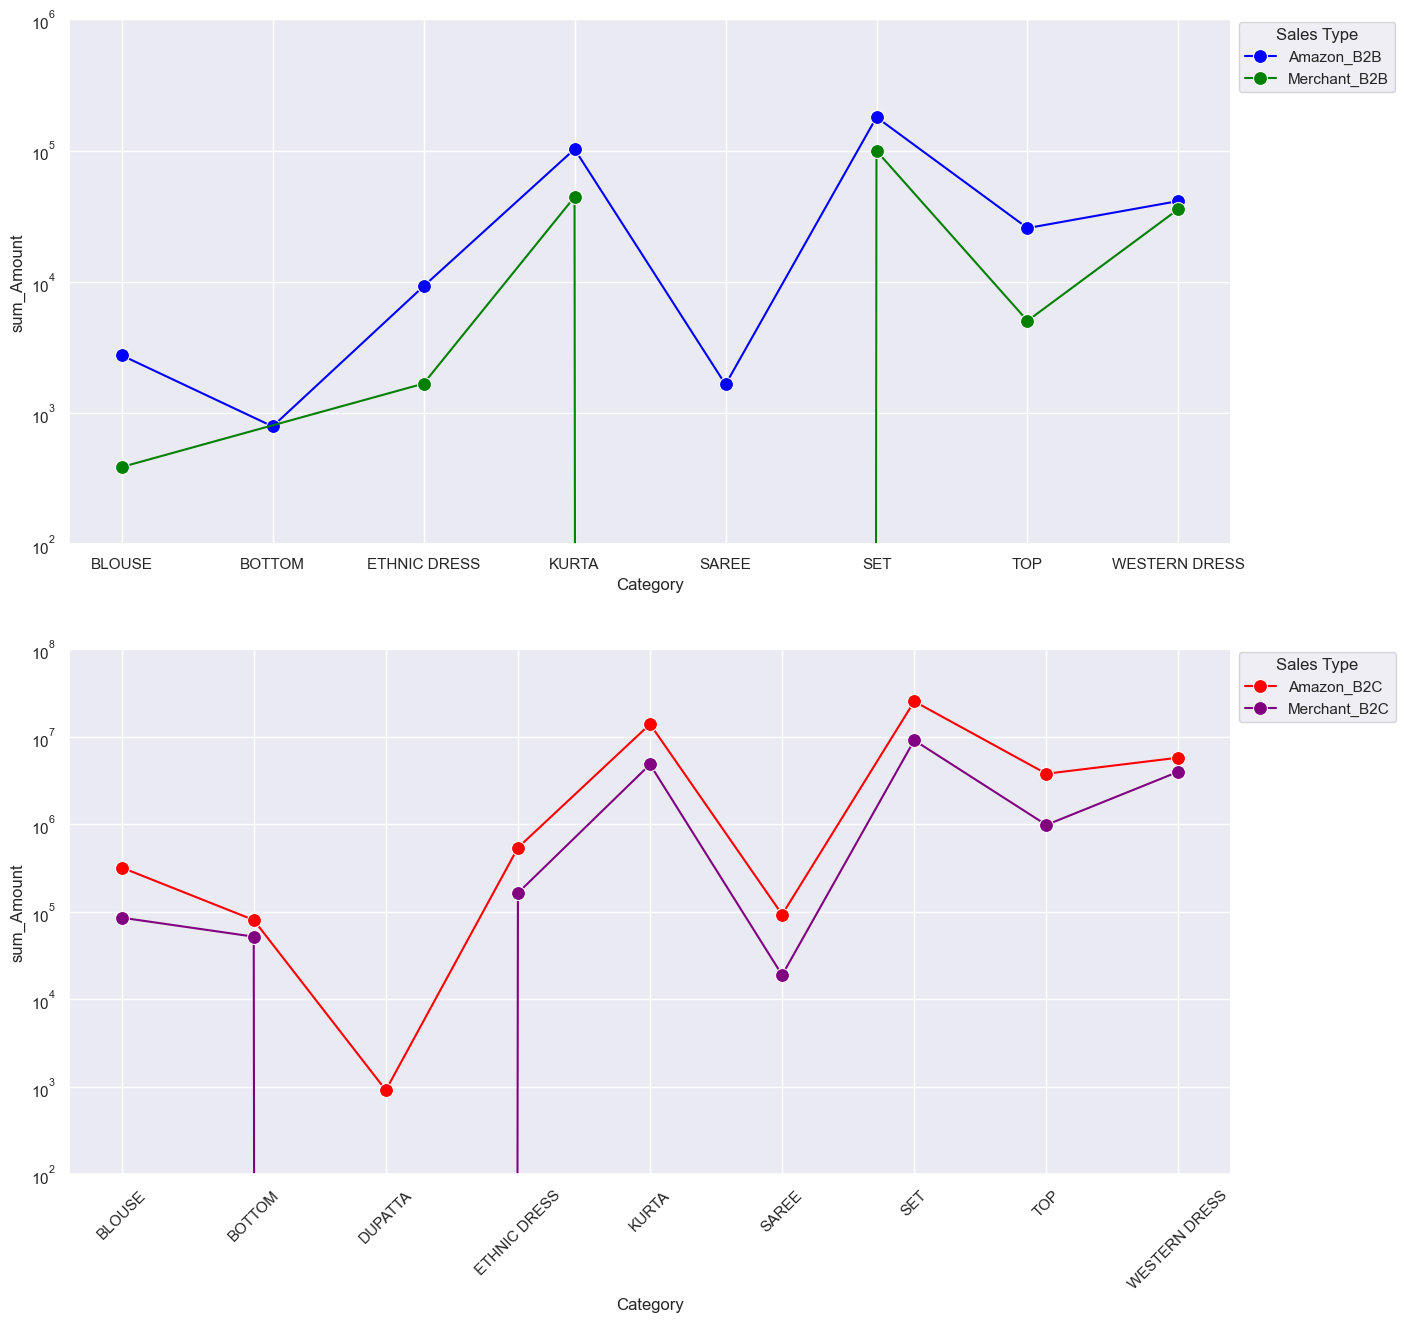

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))


# For ax[0]
sns.lineplot(
    data=Amazon_DR_Amazon_Sale_Report_df[Amazon_DR_Amazon_Sale_Report_df['B2B'] == True], y="sum_Amount", x="Category", 
    color='blue', label='Amazon_B2B', marker=marker_style, markersize=channel_markersize,ci=None, 
    ax=ax[0]  # specify the ax here
)

sns.lineplot(
    data=Amazon_DR_Amazon_Sale_Report_df[Amazon_DR_Amazon_Sale_Report_df['B2B'] == False], y="sum_Amount", x="Category", 
    color='red', label='Amazon_B2C', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[1]  # specify the same ax for the second plot
)

# For ax[1], you can do similarly:
sns.lineplot(
    data=Merchant_DR_Amazon_Sale_Report_df[Merchant_DR_Amazon_Sale_Report_df['B2B'] == True], y="sum_Amount", x="Category", 
    color='green', label='Merchant_B2B', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[0]  # specify the ax here
)

sns.lineplot(
    data=Merchant_DR_Amazon_Sale_Report_df[Merchant_DR_Amazon_Sale_Report_df['B2B'] == False], y="sum_Amount", x="Category", 
    color='purple', label='Merchant_B2C', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[1]  # specify the same ax for the second plot
)

# Set the formatter for the primary y-axis
# formatter = ticker.StrMethodFormatter('{x:,.0f}')
# ax[0].yaxis.set_major_formatter(formatter)
# ax[1].yaxis.set_major_formatter(formatter)

# plt.title('Average Amount earning between Amazon and Merchant for Shipped goods')
# ax.legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
ax[0].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
ax[1].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))

plt.xticks(rotation=45)
# ax.set_ylim([0, 900])

ax[0].set_yscale('log')
ax[0].set_ylim(10**2, 10**6)

ax[1].set_yscale('log')
ax[1].set_ylim(10**2, 10**8)

plt.show()

In [87]:
# # Combine the indices of the four series to create a master list of categories.
# all_categories = set(Amazon_B2B.index) | set(Amazon_B2C.index) | set(Merchant_B2B.index) | set(Merchant_B2C.index)

# # Reindex each series with this master list of categories and fill NaN values with 0.
# Amazon_B2B = Amazon_B2B.reindex(all_categories).fillna(0)
# Amazon_B2C = Amazon_B2C.reindex(all_categories).fillna(0)
# Merchant_B2B = Merchant_B2B.reindex(all_categories).fillna(0)
# Merchant_B2C = Merchant_B2C.reindex(all_categories).fillna(0)

# # Now, proceed with the plotting.
# fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# # Stacked Bar Chart for Amazon
# ax[0].bar(Amazon_B2B.index, Amazon_B2B, label='Amazon_B2B', color='blue')
# ax[0].bar(Amazon_B2B.index, Amazon_B2C, bottom=Amazon_B2B, label='Amazon_B2C', color='red')

# # Stacked Bar Chart for Merchant
# ax[1].bar(Merchant_B2B.index, Merchant_B2B, label='Merchant_B2B', color='green')
# ax[1].bar(Merchant_B2B.index, Merchant_B2C, bottom=Merchant_B2B, label='Merchant_B2C', color='purple')

# # Setting labels, titles, and legends
# ax[0].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
# ax[1].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))

# # To rotate the x-axis labels
# ax[0].set_xticklabels(Amazon_B2B.index, rotation=45)
# ax[1].set_xticklabels(Merchant_B2B.index, rotation=45)

# # You can set y-scale to log if necessary
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

# plt.show()


In [97]:
Amazon_DR_Amazon_Sale_Report_df  = Amazon_DR_Amazon_Sale_Report_df.append({'Fulfilment':'Amazon','Category':'DUPATTA','B2B':True, 'sum_Amount':0,'Discouted_Transaction_Ratio':0}, ignore_index=True)

In [121]:
Discounted_Amazon_Shipped_df

,Fulfilment,Category,B2B,sum_Amount,sum_Promotion-Ids,count_Order_ID,Discouted_Transaction_Ratio
12,Amazon,SET,False,25394955.0,20768.0,30457.0,0.68
7,Amazon,KURTA,False,13966141.0,16056.0,30592.0,0.52
15,Amazon,WESTERN DRESS,False,5778597.0,5168.0,7427.0,0.70
14,Amazon,TOP,False,3785757.0,3704.0,7097.0,0.52
5,Amazon,ETHNIC DRESS,False,540197.0,383.0,744.0,0.51
0,Amazon,BLOUSE,False,320606.0,306.0,616.0,0.50
11,Amazon,SET,True,179458.0,116.0,208.0,0.56
8,Amazon,KURTA,True,102533.0,98.0,202.0,0.49
10,Amazon,SAREE,False,93118.0,91.0,117.0,0.78
3,Amazon,BOTTOM,False,80595.0,135.0,220.0,0.61


In [122]:
Discounted_Merchant_Shipped_df

,Fulfilment,Category,B2B,sum_Amount,sum_Promotion-Ids,count_Order_ID,Discouted_Transaction_Ratio
9,Merchant,SET,False,9126870.0,11027.0,11043.0,1.00
6,Merchant,KURTA,False,4835255.0,10681.0,10697.0,1.00
12,Merchant,WESTERN DRESS,False,3994995.0,5359.0,5364.0,1.00
11,Merchant,TOP,False,983879.0,1991.0,1992.0,1.00
4,Merchant,ETHNIC DRESS,False,164227.0,233.0,234.0,1.00
8,Merchant,SET,True,99488.0,101.0,101.0,1.00
0,Merchant,BLOUSE,False,85745.0,170.0,170.0,1.00
2,Merchant,BOTTOM,False,52004.0,149.0,150.0,0.99
5,Merchant,KURTA,True,44349.0,93.0,93.0,1.00
13,Merchant,WESTERN DRESS,True,35806.0,47.0,47.0,1.00


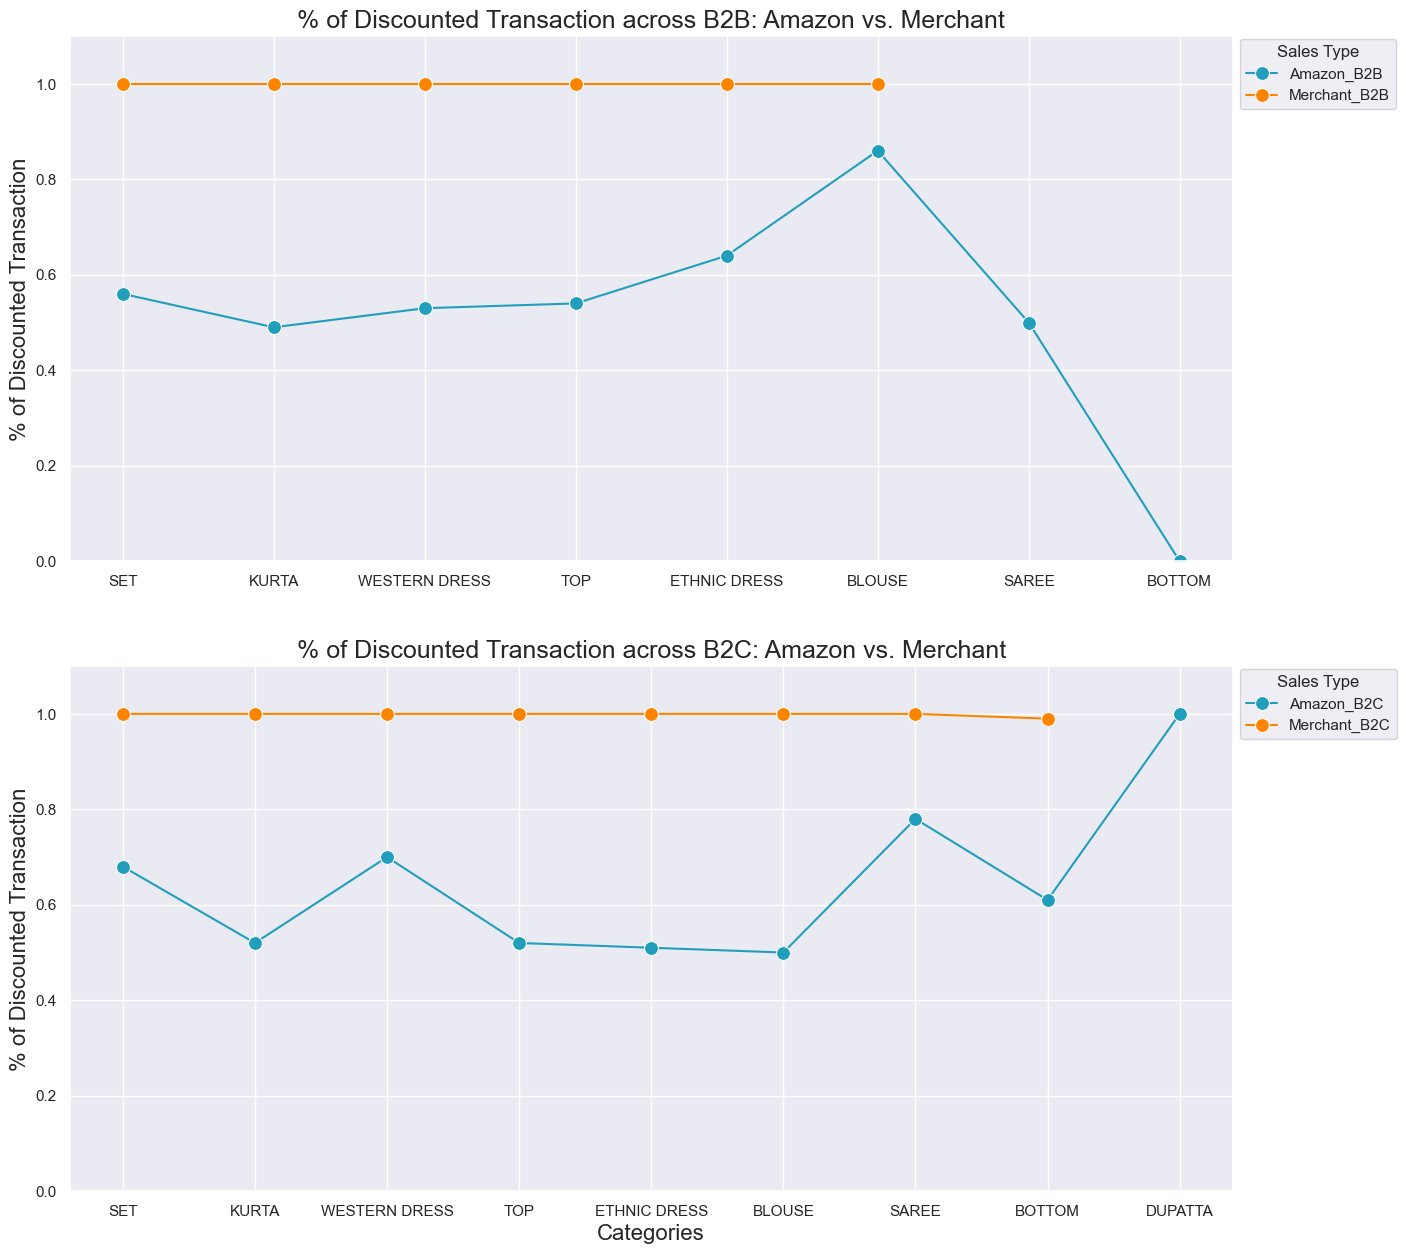

In [125]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))


Discounted_Amazon_Shipped_df = Amazon_DR_Amazon_Sale_Report_df.sort_values(by='sum_Amount', ascending=False)
Discounted_Merchant_Shipped_df = Merchant_DR_Amazon_Sale_Report_df.sort_values(by='sum_Amount', ascending=False)

# For ax[0]
sns.lineplot(
    data=Discounted_Amazon_Shipped_df[Discounted_Amazon_Shipped_df['B2B'] == True], y="Discouted_Transaction_Ratio", x="Category", 
    color='#219ebc', label='Amazon_B2B', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[0]  # specify the ax here
)

sns.lineplot(
    data=Discounted_Amazon_Shipped_df[Discounted_Amazon_Shipped_df['B2B'] == False], y="Discouted_Transaction_Ratio", x="Category", 
    color='#219ebc', label='Amazon_B2C', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[1]  # specify the same ax for the second plot
)

# For ax[1], you can do similarly:
sns.lineplot(
    data=Discounted_Merchant_Shipped_df[Discounted_Merchant_Shipped_df['B2B'] == True], y="Discouted_Transaction_Ratio", x="Category", 
    color='#fb8500', label='Merchant_B2B', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[0]  # specify the ax here
)

sns.lineplot(
    data=Discounted_Merchant_Shipped_df[Discounted_Merchant_Shipped_df['B2B'] == False], y="Discouted_Transaction_Ratio", x="Category", 
    color='#fb8500', label='Merchant_B2C', marker=marker_style, markersize=channel_markersize,ci=None,
    ax=ax[1]  # specify the same ax for the second plot
)

# 219ebc- blue fb8500-orange

# Set the formatter for the primary y-axis
# formatter = ticker.StrMethodFormatter('{x:,.0f}')
# ax[0].yaxis.set_major_formatter(formatter)
# ax[1].yaxis.set_major_formatter(formatter)

# plt.title('Average Amount earning between Amazon and Merchant for Shipped goods')
ax[0].set_title('% of Discounted Transaction across B2B: Amazon vs. Merchant',fontsize = title_fontsize)
ax[1].set_title('% of Discounted Transaction across B2C: Amazon vs. Merchant',fontsize = title_fontsize)


ax[0].set_ylabel('% of Discounted Transaction',fontsize = content_fontsize)
ax[1].set_ylabel('% of Discounted Transaction',fontsize = content_fontsize)

ax[0].set_xlabel(xlabel=None)
ax[1].set_xlabel('Categories',fontsize = content_fontsize)

ax[0].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))
ax[1].legend(title='Sales Type', loc='upper left', bbox_to_anchor=(1, 1.01))

ax[0].tick_params(axis='x', rotation=0)
ax[1].tick_params(axis='x', rotation=0)

ax[0].set_ylim([0, 1.1])
ax[1].set_ylim([0, 1.1])


plt.show()

In [ ]:
# Filtered_C_Amazon_Sale_Report_df.loc[(Filtered_C_Amazon_Sale_Report_df['Fulfilment']=='Merchant')&(Filtered_C_Amazon_Sale_Report_df['Simplified_Status']=='Cancelled')]
# Amazon_Shipped_Channel_F_C_Amazon_SR_df

In [ ]:
# Amazon_Sale_Report_df.loc[(Amazon_Sale_Report_df['Fulfilment']=='Merchant')&(Amazon_Sale_Report_df['Status']=='Cancelled')]

In [ ]:
#correlation



## International Sale Report

In [126]:
#it does not indicate any transaction ID for us to check who fulili their orders.

# Clean_International_sale_Report_df.head(5)
# Clean_Valid_Inter_SaleReport_df.head(5)
# valid_Combine_International_Sale_Report


In [177]:
Clean_Valid_Inter_SaleReport_df.columns
valid_Combine_International_Sale_Report['Customer']

0        REVATHY LOGANATHAN
1        REVATHY LOGANATHAN
2        REVATHY LOGANATHAN
3        REVATHY LOGANATHAN
4        REVATHY LOGANATHAN
                ...        
33915                AVIN  
33916                AVIN  
33917                AVIN  
33918                AVIN  
33919                AVIN  
Name: Customer, Length: 33682, dtype: object

In [128]:
#group by months to see how each customer buy
# Clean_Valid_Inter_SaleReport_df

Inter_SaleReport_Agg_funcs = {
    'Pc_Sold':['sum'],
    'Gross_Amt':['sum'],
    'Rate':['max'],    
}

Group_Inter_SaleReport_Report_df = valid_Combine_International_Sale_Report.groupby(['Customer']).agg(Inter_SaleReport_Agg_funcs).reset_index()
Group_Inter_SaleReport_Report_df.columns = [custom_colname(col) for col in Group_Inter_SaleReport_Report_df.columns]
Group_Inter_SaleReport_Report_df = Group_Inter_SaleReport_Report_df.sort_values(by='sum_Gross_Amt', ascending=False).head(10)

Group_Inter_SaleReport_Report_df

,Customer,sum_Pc_Sold,sum_Gross_Amt,max_Rate
6,AMANI CONCEPT TRADING LLC (KAPDA),197358,5.975351e+08,5559.0
95,SURE FASHIONS LLC,104750,2.778783e+08,7202.0
87,RINO SANDARAN,70273,2.451917e+08,8526.0
29,GALAXY GROUP OF COMPANIES PVT. LTD,125322,1.861680e+08,1831.0
89,RIVAAN LLC,114345,1.771207e+08,2482.0
72,NITHARSHA,53653,1.508709e+08,4483.0
70,NIRUSAH TAILORING,100688,1.421755e+08,2820.0
119,VISHAL DARSHAN BOUTIQUE,80119,1.305750e+08,3399.0
16,BHANU SALEINE NAUNITHAM,89734,1.235809e+08,2209.0
86,RINA THAKURTA,76928,1.157811e+08,2565.0


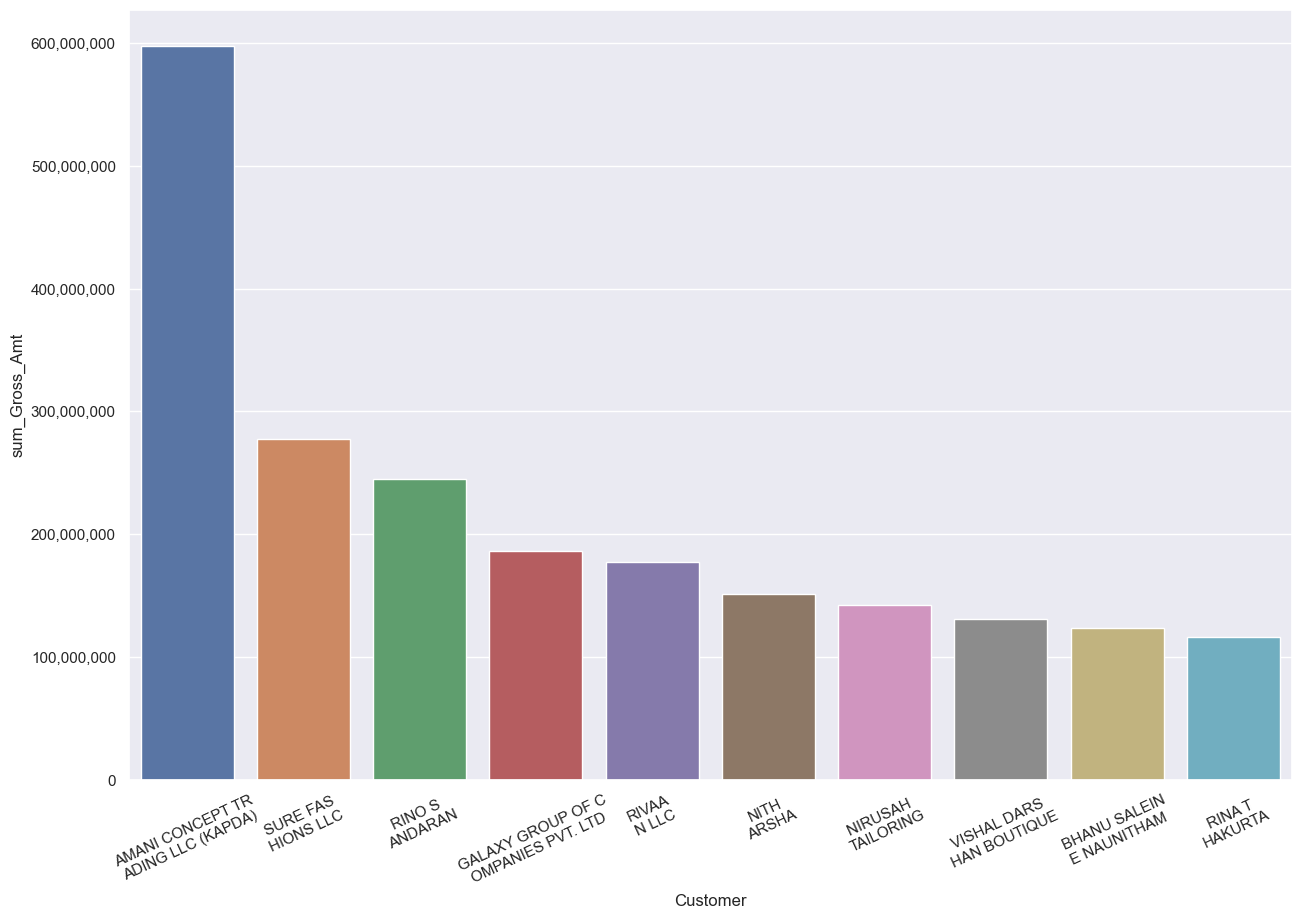

In [129]:

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=Group_Inter_SaleReport_Report_df, x='Customer', y='sum_Gross_Amt', ci=None, ax=ax)

# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)



# Get the current x-tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]
# For demonstration, I'll break at the middle of the string
labels = [label[:len(label)//2] + '\n' + label[len(label)//2:] for label in labels]
# Set the modified labels as the new x-tick labels
ax.set_xticklabels(labels)
plt.xticks(rotation=25)

plt.show()

In [130]:
# valid_Combine_International_Sale_Report['Category'].unique()
# valid_Combine_International_Sale_Report

In [131]:
#group by months to see how each customer buy
# Clean_Valid_Inter_SaleReport_df

Inter_SaleReport_Agg_funcs = {
    'Pc_Sold':['sum'],
    'Gross_Amt':['sum'],
    'Rate':['max'],  
    'Customer':['count']
}

Category_Inter_SaleReport_Report_df = valid_Combine_International_Sale_Report.groupby(['Category']).agg(Inter_SaleReport_Agg_funcs).reset_index()
Category_Inter_SaleReport_Report_df.columns = [custom_colname(col) for col in Category_Inter_SaleReport_Report_df.columns]
Category_Inter_SaleReport_Report_df = Category_Inter_SaleReport_Report_df.sort_values(by='sum_Gross_Amt', ascending=False).head(10)

Category_Inter_SaleReport_Report_df['Cumulative_Percentage'] = Category_Inter_SaleReport_Report_df["sum_Gross_Amt"].cumsum()/Category_Inter_SaleReport_Report_df["sum_Gross_Amt"].sum()*100
Category_Inter_SaleReport_Report_df['Cumulative_Percentage'] = round(Category_Inter_SaleReport_Report_df['Cumulative_Percentage'],3)

# Category_Inter_SaleReport_Report_df

In [132]:
# Category_Inter_SaleReport_Report_df
# Clean_Sale_Report_df['Category'].unique()
# Amazon_DR_Amazon_Sale_Report_df['Category'].unique()
# Category_Inter_SaleReport_Report_df['Category'].unique()

In [133]:
# Clean_Amazon_Sale_Report_df.loc[Clean_Amazon_Sale_Report_df['Category']=='SET']

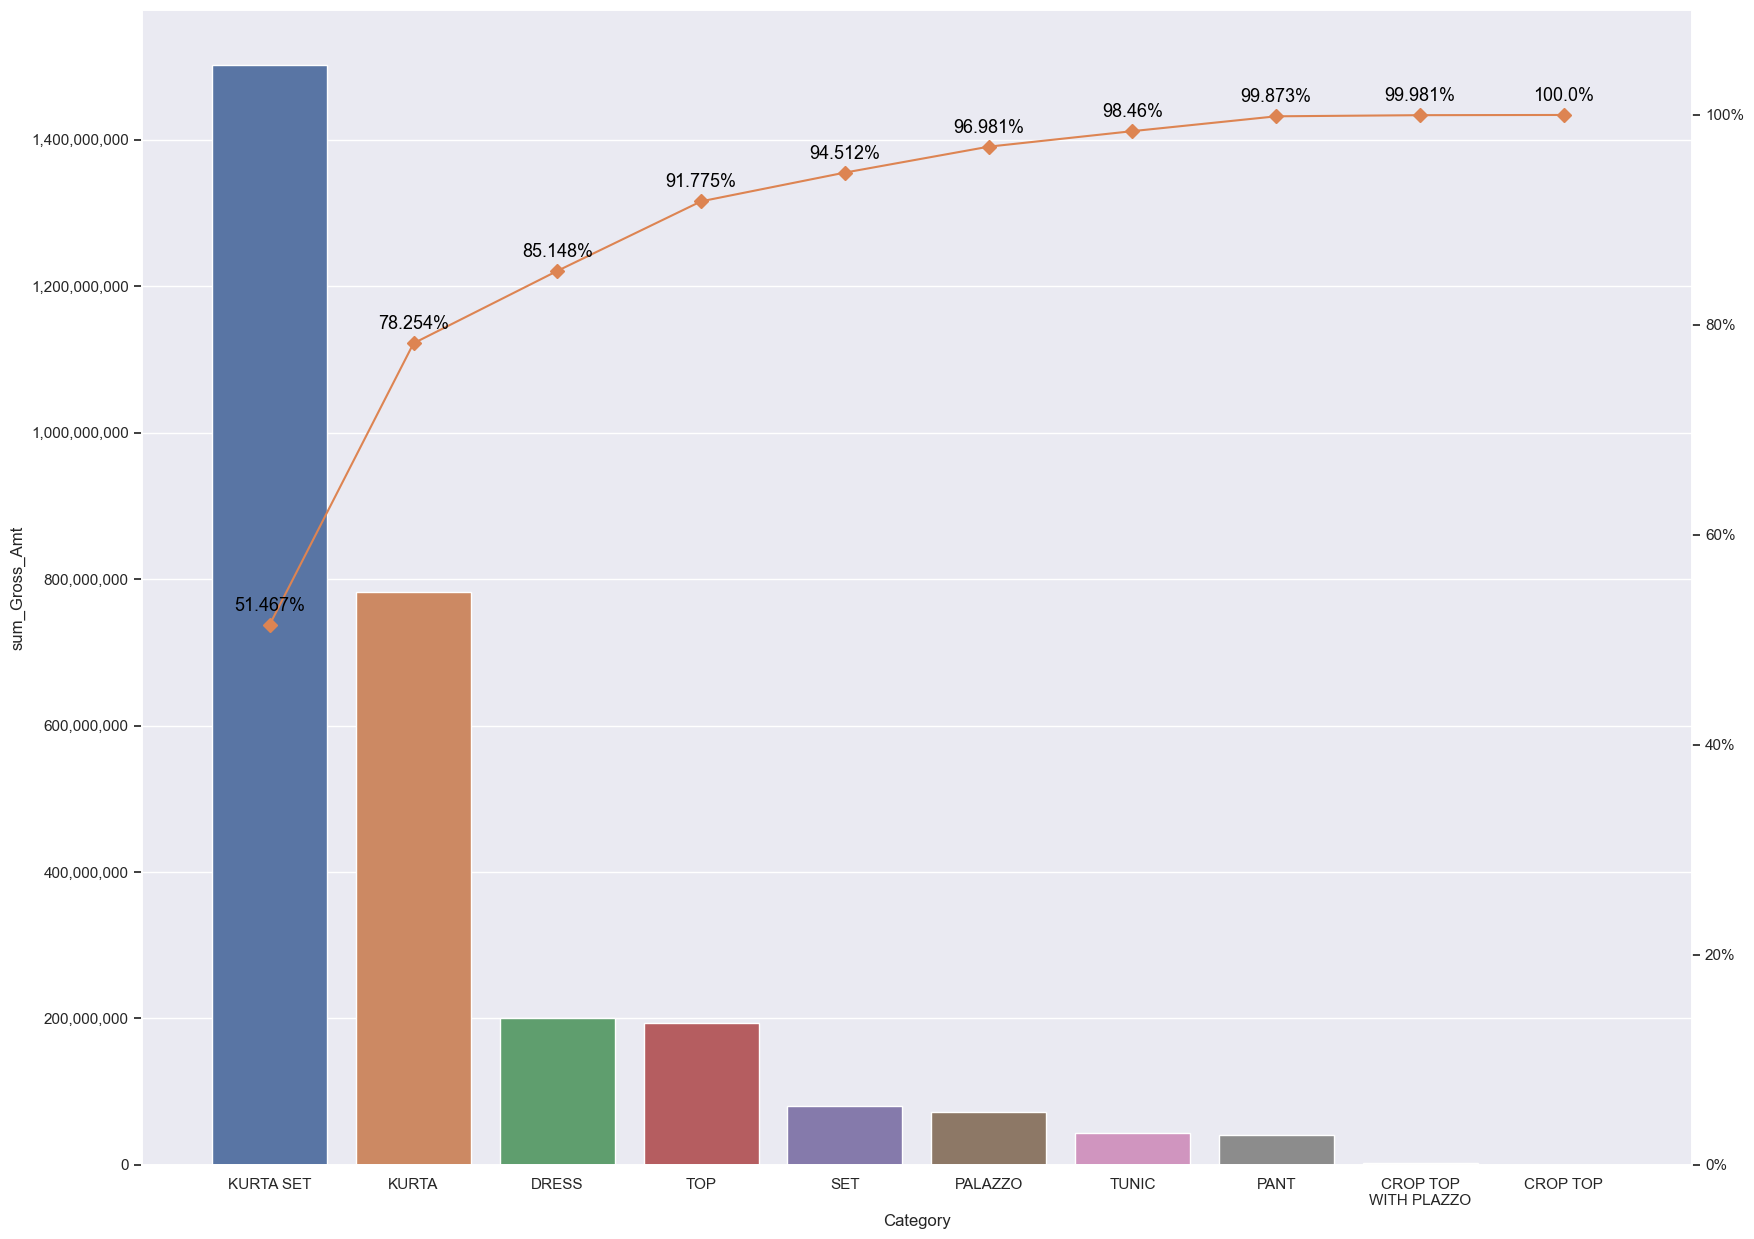

In [134]:
fig, ax = plt.subplots(figsize=(20,15))
sns.barplot(data=Category_Inter_SaleReport_Report_df, x='Category', y='sum_Gross_Amt', ci=None, ax=ax)

# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)



ax2 = ax.twinx()
ax2.plot(Category_Inter_SaleReport_Report_df['Category'], Category_Inter_SaleReport_Report_df["Cumulative_Percentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.grid(False)  # Turn off grid for the right y-axis


# Annotate each data point
for idx, row in Category_Inter_SaleReport_Report_df.iterrows():
    plt.annotate(f"{row['Cumulative_Percentage']}%", 
                 (row['Category'], row['Cumulative_Percentage']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=13, 
                 color='black')




# Get the current x-tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Modify the specific label
new_labels = ["CROP TOP\nWITH PLAZZO" if label == "CROP TOP WITH PLAZZO" else label for label in labels]

# Set the modified labels as the new x-tick labels
ax.set_xticklabels(new_labels)
        
# Set the modified labels as the new x-tick labels
plt.xticks(rotation=25)
ax2.set_ylim([0, 110])

plt.show()

In [135]:
valid_Combine_International_Sale_Report

,Date,Months,Customer,Design_No,SKU_Code,Size,Pc_Sold,Rate,Gross_Amt,Category
0,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,616.56,KURTA
1,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,616.56,KURTA
2,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,616.56,KURTA
3,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,616.56,KURTA
4,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,616.56,KURTA
...,...,...,...,...,...,...,...,...,...,...
33915,2022-03-31,Mar-22,AVIN,SET276,SET276-KR-PP-L,L,1,1425.00,1425.00,KURTA SET
33916,2022-03-31,Mar-22,AVIN,PJNE3423,PJNE3423-KR-4XL,4XL,1,538.00,538.00,KURTA
33917,2022-03-31,Mar-22,AVIN,PJNE3404,PJNE3404-KR-4XL,4XL,1,500.00,500.00,KURTA
33918,2022-03-31,Mar-22,AVIN,PJNE3423,PJNE3423-KR-4XL,4XL,1,538.00,538.00,KURTA


In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
# corr = valid_Combine_International_Sale_Report.corr()

# corr_with_gross = encoded_df.corrwith(encoded_df['Gross_Amt']).drop('Gross_Amt')
# corr

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

# Filtered_Heatmap_International_Sale_Report = ['Category','Size']
# Filtered_Heatmap_International_Sale_Report = valid_Combine_International_Sale_Report[Filtered_Heatmap_International_Sale_Report]
# Filtered_Heatmap_International_Sale_Report



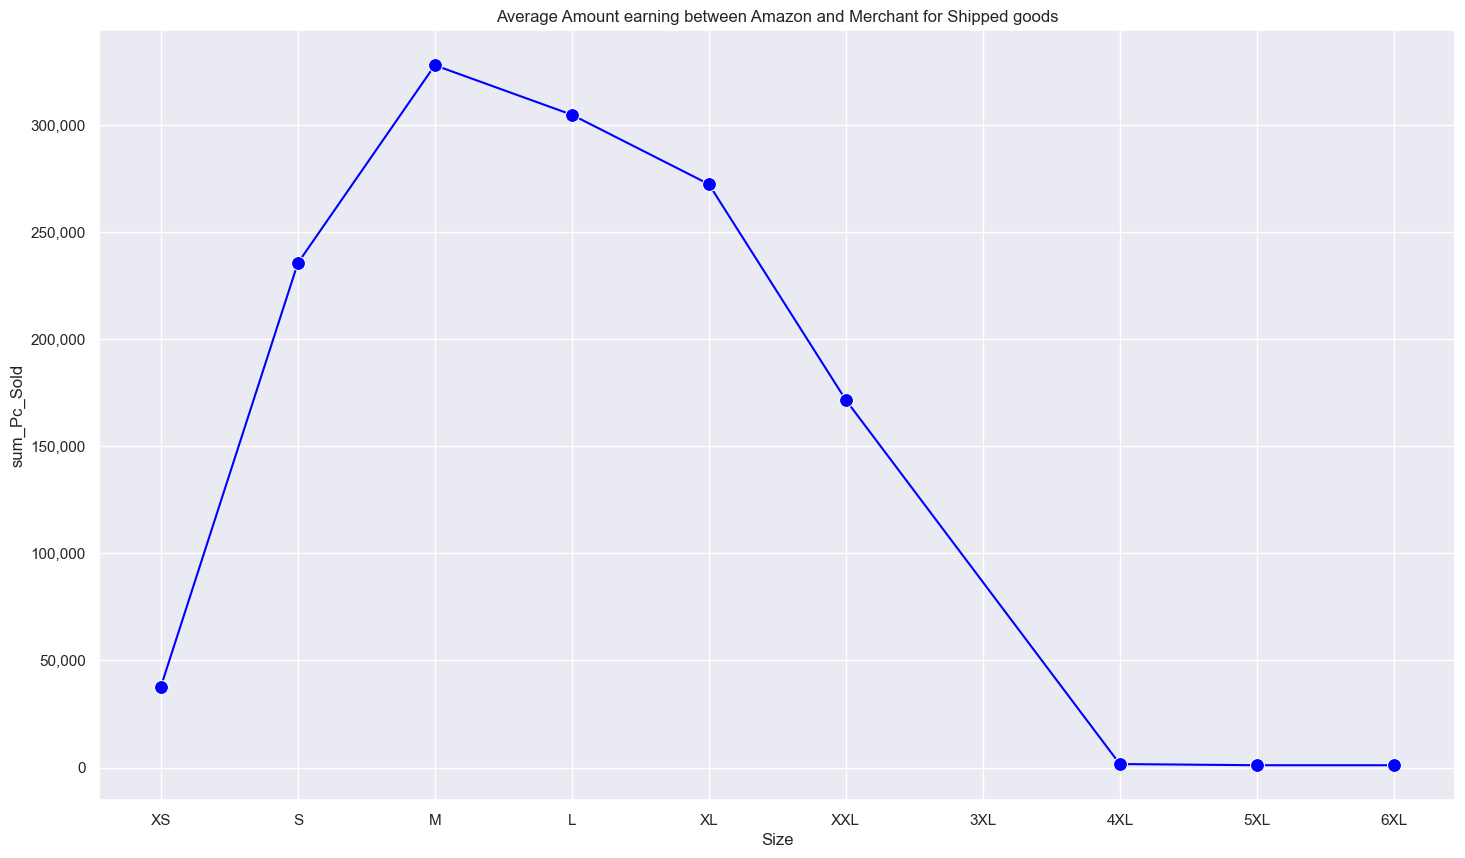

In [137]:
## Size popular

#Fulfilment by Amazon and Merchat, who have biggest sum Amount.
Size_International_Sale_Agg_funcs = {
#   'Fulfilled-By':['sum'],
#   'B2B':['sum'],
    'Gross_Amt':['sum'],
    'Pc_Sold':['sum']
}

Cate_International_Sale_Report = valid_Combine_International_Sale_Report.groupby(['Size']).agg(Size_International_Sale_Agg_funcs).reset_index()
Cate_International_Sale_Report.columns = [custom_colname(col) for col in Cate_International_Sale_Report.columns]


# Define your custom order
Size_Order = ['Free', 'XS', 'S', 'M', 'L','XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

Cate_International_Sale_Report['Size'] = pd.Categorical(Cate_International_Sale_Report['Size'], categories=Size_Order, ordered=True)
Cate_International_Sale_Report = Cate_International_Sale_Report.sort_values(by='Size')


plt.figure(figsize=(17.5,10))

ax = sns.lineplot(
    data=Cate_International_Sale_Report, y='sum_Pc_Sold', x="Size", color = 'blue',marker=marker_style,markersize=channel_markersize  
)


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.title('Average Amount earning between Amazon and Merchant for Shipped goods')
    
plt.show()



In [138]:
# valid_Combine_International_Sale_Report

In [139]:
#Distrubtion of Status 
Categories_International_Sale_Agg_funcs = {
    'Pc_Sold':['sum'],
    'Gross_Amt':['sum'],
    'Rate':['max','min','mean']
}

Monthly_CAT_International_Sale_Report_df = valid_Combine_International_Sale_Report.groupby(['Date','Category','Design_No']).agg(Categories_International_Sale_Agg_funcs).reset_index()
Monthly_CAT_International_Sale_Report_df.columns = [custom_colname(col) for col in Monthly_CAT_International_Sale_Report_df.columns]

Monthly_CAT_International_Sale_Report_df['Date'] = pd.to_datetime(Monthly_CAT_International_Sale_Report_df['Date'], format='%d-%m-%Y')
Monthly_CAT_International_Sale_Report_df['Date'] = pd.to_datetime(Monthly_CAT_International_Sale_Report_df['Date'])
Monthly_CAT_International_Sale_Report_df = Monthly_CAT_International_Sale_Report_df.sort_values(by='Date')

#sort have to come before change date to show month nad year as it will mess up the sort because of its datatype(date to str)
Monthly_CAT_International_Sale_Report_df['Date']=  Monthly_CAT_International_Sale_Report_df['Date'].dt.strftime('%B %Y')


In [140]:
# valid_Combine_International_Sale_Report.head(3)

In [141]:
## some product do have large variety of price values
# Monthly_CAT_International_Sale_Report_df.loc[Monthly_CAT_International_Sale_Report_df['max_Rate']>(Monthly_CAT_International_Sale_Report_df['min_Rate']+1000)]

Category_Design_Agg_funcs = {
    'Pc_Sold':['sum'],
    'Rate':['max','min','mean','median','std'],
#     'Gross_Amt':['sum']
}

CategoryDesign_International_Sale_Report_df = valid_Combine_International_Sale_Report.groupby(['Category','Design_No']).agg(Category_Design_Agg_funcs).reset_index()
CategoryDesign_International_Sale_Report_df.columns = [custom_colname(col) for col in CategoryDesign_International_Sale_Report_df.columns]

# LargeGap_InPrice_International_df =CategoryDesign_International_Sale_Report_df.loc[
#                                 (CategoryDesign_International_Sale_Report_df['std_Rate']>1) & 
#                                 (CategoryDesign_International_Sale_Report_df['std_Rate']<20)]
                                 
LargeGap_InPrice_International_df =CategoryDesign_International_Sale_Report_df.loc[
                                (CategoryDesign_International_Sale_Report_df['std_Rate']>1)] 

LargeGap_InPrice_International_df.loc[LargeGap_InPrice_International_df['Design_No']== 'JNE3708']
LargeGap_InPrice_International_df['Category'].unique()

# LargeGap_InPrice_International_df = CategoryDesign_International_Sale_Report_df
    
#Coefficient of Variation (CV)
# Cat_LargeGap_Flitered['CV'] = Cat_LargeGap_Flitered['std_Rate']/Cat_LargeGap_Flitered['mean_Rate']

array(['BLOUSE', 'CROP TOP', 'CROP TOP WITH PLAZZO', 'DRESS', 'KURTA',
       'KURTA SET', 'LEGGINGS', 'LEHENGA CHOLI', 'NIGHT WEAR', 'PALAZZO',
       'PANT', 'SET', 'TOP', 'TUNIC'], dtype=object)

In [142]:
Cat_LargeGap_Flitered= LargeGap_InPrice_International_df.loc[LargeGap_InPrice_International_df['Category']== 'BLOUSE']
# Cat_LargeGap_Flitered

In [143]:
df = valid_Combine_International_Sale_Report

# Calculate weighted mean for each design
df['weighted_rate'] = df['Rate'] * df['Pc_Sold']
weighted_means = df.groupby(['Category', 'Design_No']).apply(lambda x: x['weighted_rate'].sum() / x['Pc_Sold'].sum())

# Calculate the weighted standard deviation for each design
def weighted_std(group):
    mu_w = weighted_means[group.name]
    return ((group['Pc_Sold'] * (group['Rate'] - mu_w) ** 2).sum() / group['Pc_Sold'].sum()) ** 0.5

weighted_stds = df.groupby(['Category', 'Design_No']).apply(weighted_std)

if 'weighted_std' in Cat_LargeGap_Flitered.columns:
    Cat_LargeGap_Flitered.drop('weighted_std', axis=1, inplace=True)
    
weighted_stds_df = weighted_stds.reset_index()
weighted_stds_df.columns = ['Category', 'Design_No', 'weighted_std']
Cat_LargeGap_Flitered = Cat_LargeGap_Flitered.merge(weighted_stds_df, on=['Category', 'Design_No'], how='inner')


Cat_LargeGap_Flitered['CV_NotWeighted'] = Cat_LargeGap_Flitered['std_Rate']/Cat_LargeGap_Flitered['mean_Rate']
Cat_LargeGap_Flitered['CV'] = Cat_LargeGap_Flitered['weighted_std']/Cat_LargeGap_Flitered['mean_Rate']

# Cat_LargeGap_Flitered
# Cat_LargeGap_Flitered.head(5)

In [144]:
# Cat_LargeGap_Flitered['Design_No'] = Cat_LargeGap_Flitered['Design_No'].astype('category')

# colors = Cat_LargeGap_Flitered['Design_No'].cat.codes

# # Use the 'weighted_std' instead of 'CV' (or in whichever manner you wish to visualize the weighted_std)
# plt.scatter(Cat_LargeGap_Flitered['mean_Rate'], Cat_LargeGap_Flitered['CV'], c=colors)

# plt.colorbar()  # Display a color bar on the side to indicate the corresponding 'Design_No' values
# plt.xlabel('Mean Rate')
# plt.ylabel('Weighted Standard Deviation Rate')
# plt.show()


In [145]:
LargeGap_InPrice_International_df.loc[LargeGap_InPrice_International_df['Category']== 'CROP TOP WITH PLAZZO']

,Category,Design_No,sum_Pc_Sold,max_Rate,min_Rate,mean_Rate,median_Rate,std_Rate
24,CROP TOP WITH PLAZZO,J0349,1780,1776.0,888.0,1332.0,1332.0,512.687039


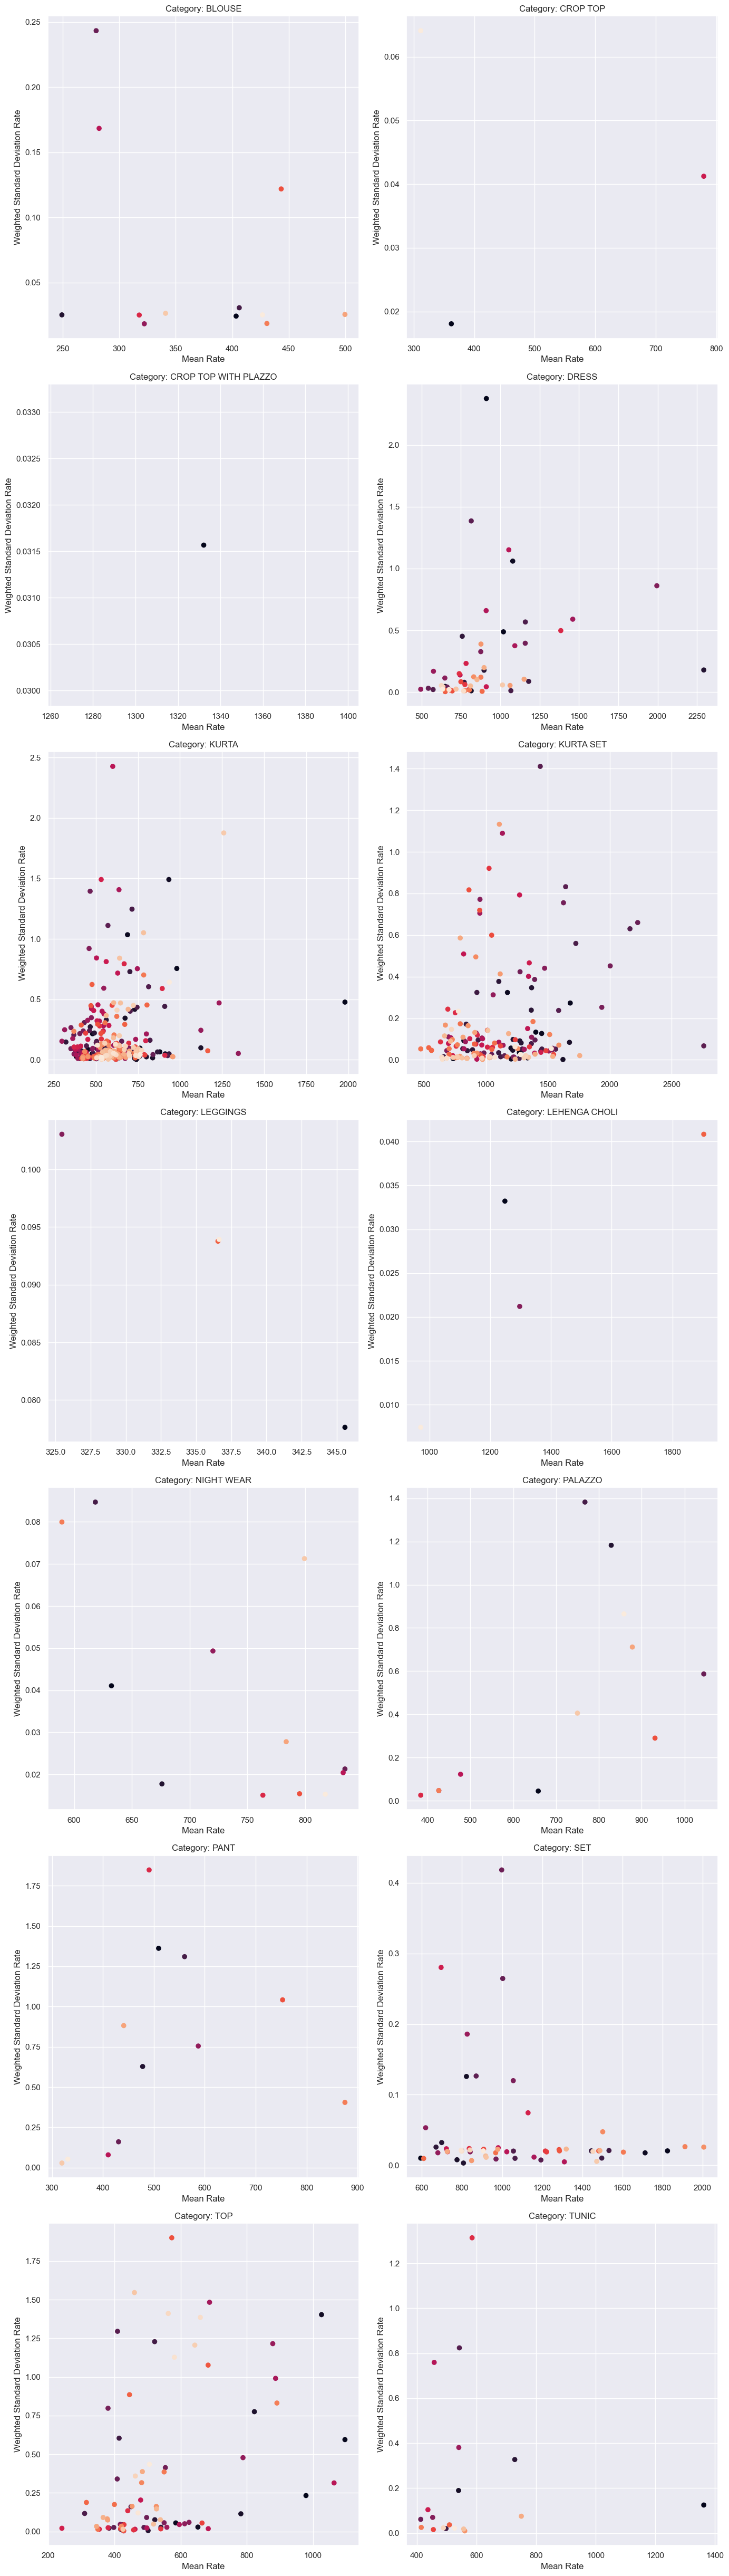

In [146]:
unique_categories = LargeGap_InPrice_International_df['Category'].unique()

# Define the number of rows and columns for your subplots
n_rows = len(unique_categories) // 2 + len(unique_categories) % 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 7))
axes = axes.flatten()

for i, category in enumerate(unique_categories):
    Cat_LargeGap_Flitered = LargeGap_InPrice_International_df.loc[LargeGap_InPrice_International_df['Category'] == category].copy()

    if 'weighted_std' in Cat_LargeGap_Flitered.columns:
        Cat_LargeGap_Flitered.drop('weighted_std', axis=1, inplace=True)
    
    weighted_stds_df = weighted_stds.reset_index()
    weighted_stds_df.columns = ['Category', 'Design_No', 'weighted_std']
    Cat_LargeGap_Flitered = Cat_LargeGap_Flitered.merge(weighted_stds_df, on=['Category', 'Design_No'], how='inner')

    Cat_LargeGap_Flitered['CV_NotWeighted'] = Cat_LargeGap_Flitered['std_Rate']/Cat_LargeGap_Flitered['mean_Rate']
    Cat_LargeGap_Flitered['CV'] = Cat_LargeGap_Flitered['weighted_std']/Cat_LargeGap_Flitered['mean_Rate']
    Cat_LargeGap_Flitered['Design_No'] = Cat_LargeGap_Flitered['Design_No'].astype('category')

    colors = Cat_LargeGap_Flitered['Design_No'].cat.codes
    axes[i].scatter(Cat_LargeGap_Flitered['mean_Rate'], Cat_LargeGap_Flitered['CV'], c=colors)
    axes[i].set_title(f"Category: {category}")
    axes[i].set_xlabel('Mean Rate')
    axes[i].set_ylabel('Weighted Standard Deviation Rate')

plt.tight_layout()
plt.show()

In [147]:
# ## have to normalized the weight, this standard deviation is not accurate.

# Cat_LargeGap_Flitered['Design_No'] = Cat_LargeGap_Flitered['Design_No'].astype('category')

# colors = Cat_LargeGap_Flitered['Design_No'].cat.codes

# plt.scatter(Cat_LargeGap_Flitered['mean_Rate'],Cat_LargeGap_Flitered['CV'],c=colors)

# plt.colorbar()  # Display a color bar on the side to indicate the corresponding 'Design_No' values
# plt.xlabel('Mean Rate')
# plt.ylabel('Standard Deviation Rate')
# plt.show()

In [148]:
Category_Inter_SaleReport_Report_List = Category_Inter_SaleReport_Report_df

top_categories = Category_Inter_SaleReport_Report_List.sort_values(by='sum_Pc_Sold', ascending=False).iloc[:5]['Category'].tolist()
filtered_df = Monthly_CAT_International_Sale_Report_df[Monthly_CAT_International_Sale_Report_df['Category']
                                                       .isin(top_categories)]


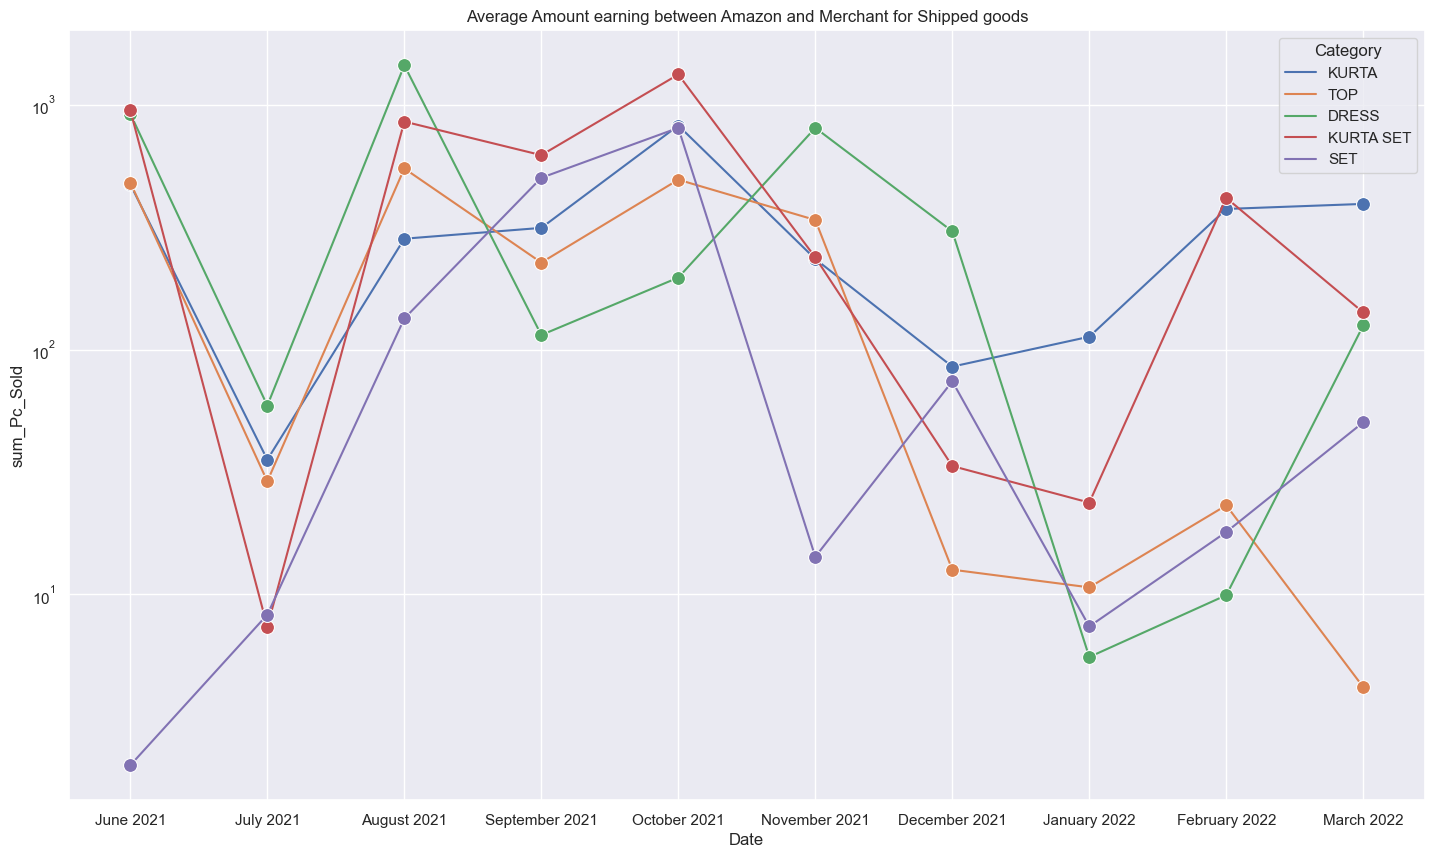

In [149]:
# Top_10_International_Product = Monthly_CAT_International_Sale_Report_df.head(10)

plt.figure(figsize=(17.5,10))

ax = sns.lineplot(
    data=filtered_df, y='sum_Pc_Sold', x="Date", hue = 'Category',
    marker=marker_style,
    markersize=channel_markersize,
    ci=None
)


# Set the formatter for the primary y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.title('Average Amount earning between Amazon and Merchant for Shipped goods')


plt.yscale('log')
plt.show()

In [150]:
# filtered_df

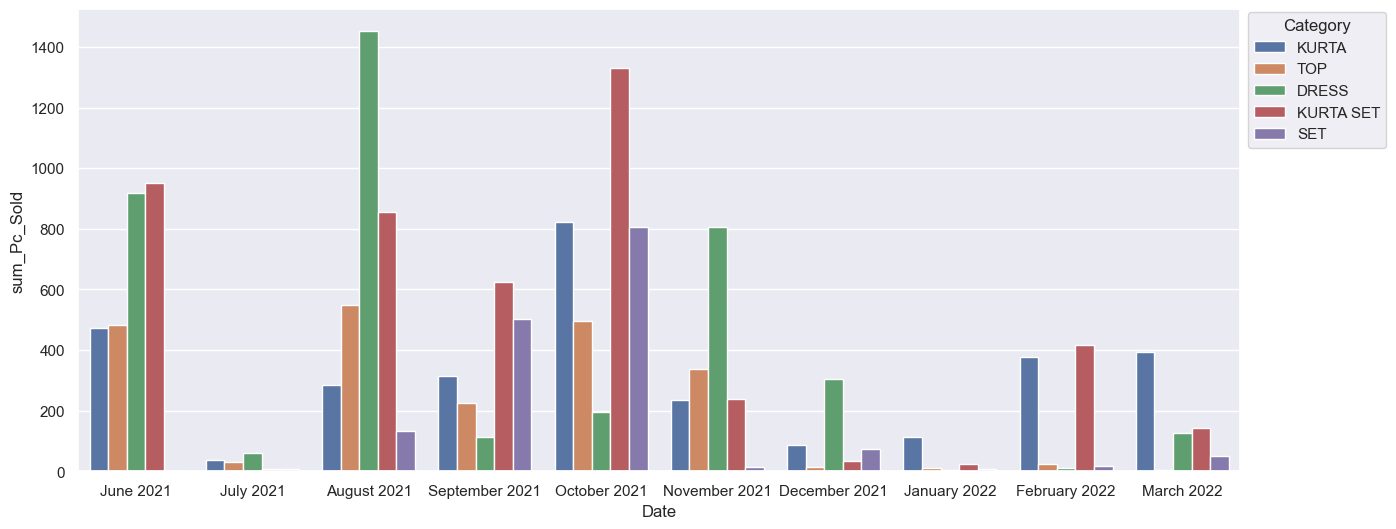

In [151]:
# Monthly_CAT_F_C_Amazon_Sale_Report_df
plt.figure(figsize=(15,6))
sns.barplot(data=filtered_df,x='Date',y='sum_Pc_Sold',hue='Category',ci=None)

#Set Legend
handles, _ = plt.gca().get_legend_handles_labels()
leg = plt.legend(handles=handles, title='Category', loc='upper left', frameon=True, bbox_to_anchor=(1, 1.01))
leg.get_title().set_ha('left')

plt.show()

In [152]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder


# # Sample DataFrame
# data = {
#     'SKU_Code': ['SKU1', 'SKU2', 'SKU1', 'SKU3', 'SKU2'],
#     'Design': ['Design1', 'Design2', 'Design1', 'Design3', 'Design2'],
#     'Size': ['S', 'M', 'L', 'S', 'XL'],
#     'Sales': [100, 150, 200, 50, 300]
# }

# df = pd.DataFrame(data)

# size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4}
# df['Size'] = df['Size'].map(size_mapping)


# le = LabelEncoder()
# df['SKU_Code'] = le.fit_transform(df['SKU_Code'])
# df['Design'] = le.fit_transform(df['Design'])

# corr_matrix = df.corr()


# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()
# df


## March and May P_N_L

In [153]:
# March 2021
# TP 1	Price of the product on the first third-party platform. (Integer)
# TP 2	Price of the product on the second third-party platform. (Integer)

# May 2022
# TP 1 & TP 2 MRP Old	Original price of the product. (Integer)

#Contain price of product on all platform
P_N_L_May2022_df['Category'].unique()
# P_N_L_May2022_df.info()
# P_N_L_March2021_df

array(['Kurta', 'Kurta Set', 'Gown', 'Tops'], dtype=object)

In [154]:
# P_N_L_March2021_df['Catalog'].unique()
# P_N_L_March2021_df['Design_No'].unique()
 
P_N_L_May2022_df.columns
P_N_L_May2022_df

,SKU_Code,Design_No,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,OS206_3141_S,OS206_3141,Moments,Kurta,0.3,538.0,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
1,OS206_3141_M,OS206_3141,Moments,Kurta,0.3,538.0,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
2,OS206_3141_L,OS206_3141,Moments,Kurta,0.3,538.0,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
3,OS206_3141_XL,OS206_3141,Moments,Kurta,0.3,538.0,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
4,OS206_3141_2XL,OS206_3141,Moments,Kurta,0.3,538.0,2178.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,OS326_M,OS326,Mix,Kurta,0.3,467.0,1878.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0
1326,OS326_L,OS326,Mix,Kurta,0.3,467.0,1878.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0
1327,OS326_XL,OS326,Mix,Kurta,0.3,467.0,1878.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0
1328,OS326_2XL,OS326,Mix,Kurta,0.3,467.0,1878.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0,1995.0


In [155]:
International_Sale_Price_Col = ['std']

International_Sale_Agg_funcs = {
#     'MRP Old':['count'],
    'TP':International_Sale_Price_Col,
    'MRP Old':International_Sale_Price_Col,
    'Final MRP Old':International_Sale_Price_Col,
    'Ajio MRP':International_Sale_Price_Col,
    'Amazon MRP':International_Sale_Price_Col,
#   'Amazon MRP':['min','max'],
    'Amazon FBA MRP':International_Sale_Price_Col,
    'Flipkart MRP':International_Sale_Price_Col,
    'Limeroad MRP':International_Sale_Price_Col,
    'Myntra MRP':International_Sale_Price_Col,
    'Paytm MRP':International_Sale_Price_Col,
    'Snapdeal MRP':International_Sale_Price_Col
}

#TP refer Third Party

Filtered_P_N_L_May2022_df = P_N_L_May2022_df.groupby(['Catalog','Category']).agg(International_Sale_Agg_funcs).reset_index()
Filtered_P_N_L_May2022_df.columns = [custom_colname(col) for col in Filtered_P_N_L_May2022_df.columns]

#df = df.round({'col1': 2, 'col2': 3})
Filtered_P_N_L_May2022_df = Filtered_P_N_L_May2022_df.round(2)

# Mix_P_N_L_May2022_df = Filtered_P_N_L_May2022_df.loc[Filtered_P_N_L_May2022_df['Catalog']=='Mix'].transpose()
# Mix_P_N_L_May2022_df.columns = Mix_P_N_L_May2022_df.iloc[1]
# Mix_P_N_L_May2022_df = Mix_P_N_L_May2022_df.iloc[2:]

Mix_P_N_L_May2022_df = Filtered_P_N_L_May2022_df.loc[Filtered_P_N_L_May2022_df['Catalog']=='Mix']
# Mix_P_N_L_May2022_df

In [156]:
df = Mix_P_N_L_May2022_df

#Market Between B2B and B2C Average spending, item.
plt.figure(figsize=(17.5,10))


# Melt the dataframe to long format
melted_df = pd.melt(df, id_vars=['Catalog', 'Category'], value_vars=[col for col in df.columns if 'std_' in col], 
                    var_name='MRP_Type', value_name='MRP_Value')

melted_df['MRP_Type'] = melted_df['MRP_Type'].str.replace('std_', '')
# melted_df

NO_TP_melted_df = melted_df.iloc[4:]

melted_df_Agg_funcs={
    'MRP_Value':['mean']
}

melted_df_ref = round(NO_TP_melted_df.groupby(['Category']).agg(melted_df_Agg_funcs).reset_index(),2)

AboveAvg_melted_df = melted_df.merge(melted_df_ref,how='left',on='Category') 
AboveAvg_melted_df['Above_Avg'] = AboveAvg_melted_df['MRP_Value'] > AboveAvg_melted_df[('MRP_Value', 'mean')] 
# AboveAvg_melted_df

<Figure size 1750x1000 with 0 Axes>

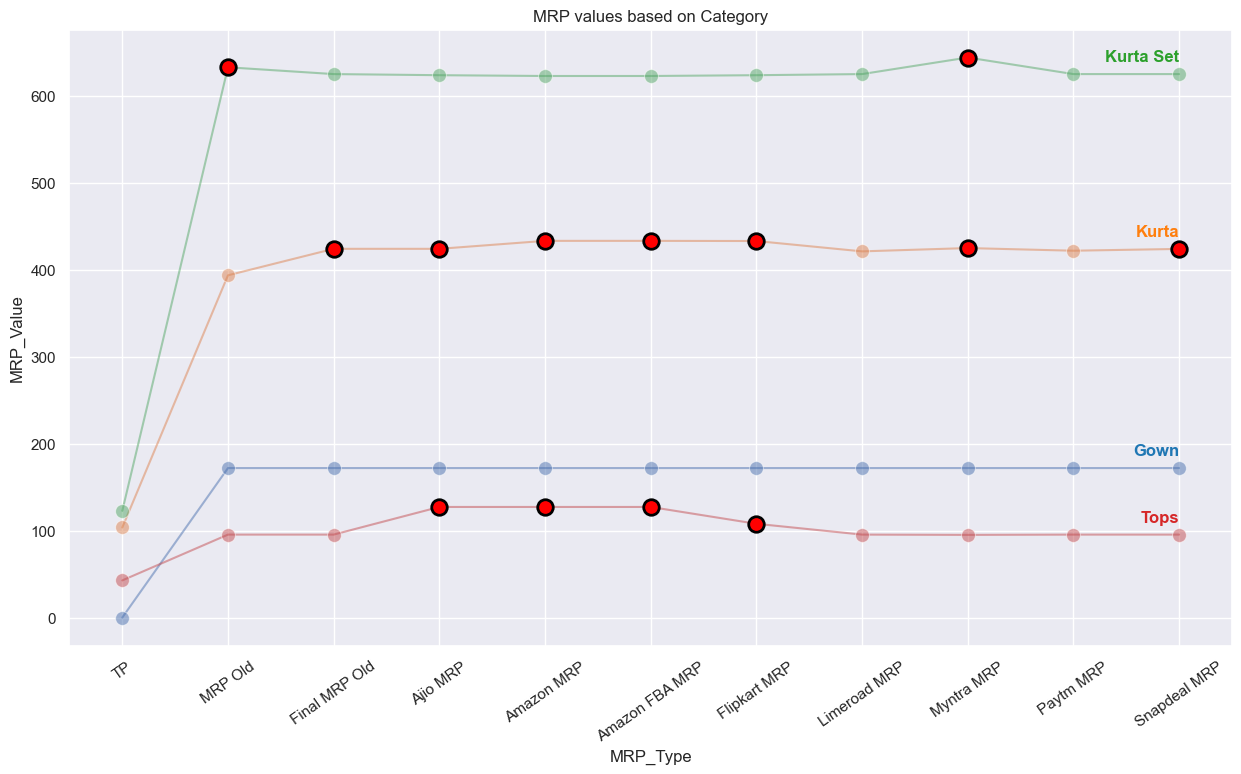

In [157]:
# Plotting
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=melted_df, x='MRP_Type', y='MRP_Value', hue='Category',alpha=0.5,marker=marker_style,
                  legend=False,markersize=channel_markersize)

# Highlight points where Above_Avg is True
above_avg = AboveAvg_melted_df[AboveAvg_melted_df['Above_Avg']]
plt.scatter(above_avg['MRP_Type'], above_avg['MRP_Value'], color='red', s=125, linewidth=2, edgecolor='black', zorder=5)

# Define a color palette for your categories
palette = sns.color_palette("tab10", len(melted_df['Category'].unique()))
# Create a dictionary that maps each category to a color
color_dict = dict(zip(melted_df['Category'].unique(), palette))

# Label each line with its category
categories = melted_df['Category'].unique()
for category in categories:
    subset = melted_df[melted_df['Category'] == category]
    # Get the position for the label (e.g., last value for the line)
    x_pos = subset['MRP_Type'].iloc[-1]
    y_pos = subset['MRP_Value'].iloc[-1]
    
    label_x_pos = ax.get_xticks()[-1]  # Use the second last x-tick for positioning
    ax.text(label_x_pos , y_pos + 20, category, color=color_dict[category], horizontalalignment='right', verticalalignment='center', fontweight='bold', fontsize=12)

# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.title("MRP values based on Category")
plt.xticks(rotation=35)

# plt.yscale('log')
# plt.ylim(1, None)
plt.show()


In [158]:
## For me to check product
# Clean_Sale_Report_df.loc[Clean_Sale_Report_df['Design_No']=='OS206_3141']

# Filter names that contain the substring 'a'
result = Clean_Sale_Report_df[Clean_Sale_Report_df['Design_No'].str.contains('AN202', case=False, na=False)]
result


,SKU_Code,Design_No,Stock,Category,Size,Color
5,AN202-ORANGE-L,AN202,11,LEGGINGS,L,Orange
6,AN202-ORANGE-M,AN202,3,LEGGINGS,M,Orange
7,AN202-ORANGE-S,AN202,16,LEGGINGS,S,Orange
8,AN202-ORANGE-XL,AN202,8,LEGGINGS,XL,Orange
9,AN202-ORANGE-XXL,AN202,14,LEGGINGS,XXL,Orange


In [159]:
Clean_International_sale_Report_df.loc[Clean_International_sale_Report_df['Design_No']=='AN202'].head(5)

,Date,Months,Customer,Design_No,SKU_Code,Size,Pc_Sold,Rate,Gross_Amt
2638,2021-08-16,Aug-21,MULBERRIES BOUTIQUE,AN202,AN202-ORANGE-S,S,1,281.0,281.0
2639,2021-08-16,Aug-21,MULBERRIES BOUTIQUE,AN202,AN202-ORANGE-M,M,1,281.0,281.0
2640,2021-08-16,Aug-21,MULBERRIES BOUTIQUE,AN202,AN202-ORANGE-L,L,1,281.0,281.0
2641,2021-08-16,Aug-21,MULBERRIES BOUTIQUE,AN202,AN202-ORANGE-XL,XL,1,281.0,281.0
2642,2021-08-16,Aug-21,MULBERRIES BOUTIQUE,AN202,AN202-ORANGE-XXL,XXL,1,281.0,281.0


## Sale report

In [160]:
# Clean_International_sale_Report_df['Date'].unique()
# Shipped_Amazon_Sale_Report['Date'].unique()

In [161]:
# Clean_International_sale_Report_df['Date'].unique()


In [162]:
#check what have sold from international and Amazon
#check which service

Clean_Sale_Report_df.head(5) #Stock

,SKU_Code,Design_No,Stock,Category,Size,Color
0,AN201-RED-L,AN201,5,LEGGINGS,L,Red
1,AN201-RED-M,AN201,5,LEGGINGS,M,Red
2,AN201-RED-S,AN201,3,LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6,LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3,LEGGINGS,XXL,Red


In [163]:
# Shipping_Fee_df
# temp_df.info()

In [178]:
# Clean_Sale_Report_df
Clean_International_sale_Report_df.head(5)
# Shipped_Amazon_Sale_Report

,Date,Months,Customer,Design_No,SKU_Code,Size,Pc_Sold,Rate,Gross_Amt
0,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,616.56
1,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,616.56
2,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,616.56
3,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,616.56
4,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,616.56


In [165]:
# Shipped_Amazon_Sale_Report
Shipped_Amazon_Sale_Report = Filtered_Status_C_Amazon_Sale_Report_df.loc[Filtered_Status_C_Amazon_Sale_Report_df['Simplified_Status'] != 'Cancelled']


In [179]:
# International Sale Report
International_Pc_Sold_Sale_Agg_funcs = {
    'Pc_Sold':['sum'],
    'Gross_Amt':['sum'],
    'Rate':['mean']
}

International_Pc_Sold_Report_df = Clean_International_sale_Report_df.groupby(['Design_No','SKU_Code','Size']).agg(International_Pc_Sold_Sale_Agg_funcs).reset_index()
International_Pc_Sold_Report_df.columns = [custom_colname(col) for col in International_Pc_Sold_Report_df.columns]
# International_Pc_Sold_Report_df['mean_Rate'] = round(International_Pc_Sold_Report_df['mean_Rate'],2)
Stock_Report = Clean_Sale_Report_df.merge(International_Pc_Sold_Report_df,how='left')


# Amazon Sale Report
Amazon_Pc_Sold_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum']
}

Amazon_Pc_Sold_Report_df = Shipped_Amazon_Sale_Report.groupby(['Design_No','Size']).agg(Amazon_Pc_Sold_Sale_Agg_funcs).reset_index()
Amazon_Pc_Sold_Report_df.columns = [custom_colname(col) for col in Amazon_Pc_Sold_Report_df.columns]
Amazon_Pc_Sold_Report_df = Amazon_Pc_Sold_Report_df.rename(columns={"sum_Qty": "Amazon_Pc_Sold"})

Total_Stock_Report = Stock_Report.merge(Amazon_Pc_Sold_Report_df,how='left')
Total_Stock_Report['Total_Sold'] = Total_Stock_Report['sum_Pc_Sold']+Total_Stock_Report['Amazon_Pc_Sold'] 

# Total_Stock_Report['check'] = Total_Stock_Report['sum_Pc_Sold']==Total_Stock_Report['Amazon_Pc_Sold']
Total_Stock_Report['Amazon_Rate'] = round(Total_Stock_Report['sum_Amount']/Total_Stock_Report['Amazon_Pc_Sold'],2)
# Total_Stock_Report = Total_Stock_Report.drop(['sum_Pc_Sold','Amazon_Pc_Sold'],axis=1)

Total_Stock_Report['Own_Stock'] = Total_Stock_Report['Stock']-Total_Stock_Report['Total_Sold']

Total_Stock_Report = Total_Stock_Report.fillna(0)

#Correcting Data Type
Total_Stock_Report_df_datatype = {
                      'Stock': int,
                      'Total_Sold': int,
                      'Own_Stock':int,
                     }

# Clean_International_sale_Report_df['Months'] = Clean_International_sale_Report_df['Months'].astype('datetime64[ns]')

Total_Stock_Report = Total_Stock_Report.astype(Total_Stock_Report_df_datatype)

Total_Stock_Report['Avg_Inventory'] = (Total_Stock_Report['Stock']+Total_Stock_Report['Own_Stock'].apply(lambda x: 0 if x < 0 else x))/2
Total_Stock_Report['Turnover_Rate'] = Total_Stock_Report['Total_Sold']/ Total_Stock_Report['Avg_Inventory']

def Stock_Status(row):
    
    # Lower Turnover_Rate, inventory is moving slower and items are staying in stock for a longer period. 
    
    if row['Own_Stock'] == 0 and row['Total_Sold'] > 0:
        return 'All_Sold_Out'
    elif row['Own_Stock'] == 0 and row['Total_Sold'] == 0:
        return 'No_Sale'
    elif row['Own_Stock'] < 0:
        return 'Under_Stock'
    elif row['Own_Stock'] > (row['Stock']*0.8): #80% of stock leftover
        return 'Over_Stock'
    else:
        return 'Other'  # This is a catch-all. You can adjust as needed.

Total_Stock_Report['Stock_Status'] = Total_Stock_Report.apply(Stock_Status, axis=1)

# check info
# Total_Stock_Report.loc[(Total_Stock_Report['Own_Stock']==0)&(Total_Stock_Report['Total_Sold']>0)]

Total_Stock_Report = Total_Stock_Report.drop(['Avg_Inventory'],axis=1)
Total_Stock_Report = Total_Stock_Report.rename(columns={"sum_Gross_Amt": "Int_Sale_Amt",'sum_Amount':"Amazon_Amt",'mean_Rate':'Int_Rate'})


In [167]:
Total_Stock_Report['Stock_Status'].unique()

array(['No_Sale', 'Under_Stock', 'Other', 'All_Sold_Out', 'Over_Stock'],
      dtype=object)

In [168]:
# How do SKU codes, design choices, and product categories influence sales performance across different channels?
Total_Stock_Report.loc[Total_Stock_Report['Stock_Status']=='Over_Stock']

#How can we better align our inventory with demand patterns to prevent stockouts and overstock situations?



,SKU_Code,Design_No,Stock,Category,Size,Color,sum_Pc_Sold,Int_Sale_Amt,Int_Rate,Amazon_Pc_Sold,Amazon_Amt,Total_Sold,Amazon_Rate,Own_Stock,Turnover_Rate,Stock_Status
141,BL087-L,BL087,48,BLOUSE,L,Multicolor,6.0,2462.25,410.375,1.0,647.0,7,647.00,41,0.157303,Over_Stock
142,BL087-M,BL087,89,BLOUSE,M,Multicolor,6.0,2462.25,410.375,3.0,1419.0,9,473.00,80,0.106509,Over_Stock
146,BL087-XXL,BL087,86,BLOUSE,XXL,Multicolor,4.0,1600.00,400.000,2.0,920.0,6,460.00,80,0.072289,Over_Stock
196,BL098-M,BL098,31,BLOUSE,M,Brown,2.0,650.00,325.000,1.0,372.0,3,372.00,28,0.101695,Over_Stock
227,BL103-S,BL103,29,BLOUSE,S,Maroon,2.0,778.35,389.175,3.0,1419.0,5,473.00,24,0.188679,Over_Stock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9041,SET409-KR-NP-L,SET409,75,SET,L,Wine,4.0,3249.00,796.250,4.0,2824.0,8,706.00,67,0.112676,Over_Stock
9042,SET409-KR-NP-M,SET409,64,SET,M,Wine,4.0,3249.00,796.250,4.0,2805.0,8,701.25,56,0.133333,Over_Stock
9043,SET409-KR-NP-S,SET409,81,SET,S,Wine,4.0,3249.00,796.250,4.0,1923.0,8,480.75,73,0.103896,Over_Stock
9044,SET409-KR-NP-XL,SET409,73,SET,XL,Wine,4.0,3249.00,796.250,3.0,1923.0,7,641.00,66,0.100719,Over_Stock


In [169]:
## which service will give us more profit

#Sale_report - this is my inventory for Storage Fee/Cft

# Clean_Amazon_Sale_Report_df - For Inbound and Outbound(each transition) // return good with detailed QC
Clean_Amazon_Sale_Report_df['Simplified_Status'].unique()

#International_sale, it does not state the status of the transition.
#Clean_International_sale_Report_df

array(['Cancelled', 'Delivered/Shipped to Buyer',
       'Returned/Damaged/Rejected', 'Pending', 'Others'], dtype=object)

In [170]:
#Price Per Unit Indian rupee
#INCREFF 0.15 per Day (Storage Fee/Cft)

# Inbound (Fresh Stock and RTO)
# Outbound
# Storage Fee/Cft
# Customer Return with Detailed QC

C_Cloud_WH_Compersion_df
# Shipping_Fee_df

#To caculate which service is better we need this variable

# The time take before the storage is ship out, how long does it take to ship out. - Storage Fee/Cft

# If stock reutrn: (one time payment)
    # Amount of return goods - For Customer Return with Detailed QC
        #Stock is okay to resellable
            # Inbound refer to return goods and also goods/materials come into your place
        #Else
            #Further instruction.
            
# Outbound is good that out shipping (one time payment)
    #calculate the overall stock to see how much is charge 

,Title,Shiprocket,INCREFF
0,Heads,Price (Per Unit),Price (Per Unit)
1,Inbound (Fresh Stock and RTO),₹4.00,4
2,Outbound,₹7.00,11
3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,Customer Return with Detailed QC,₹6.00,15.5
5,(A) SCOPE OF WORK and STANDARD OPERATING PROCE...,,
6,Inward,Unloading,• Boxes counted and weighed. Data captured in ...
7,,Validation,• GRN will be initiated against a valid PO doc...
8,,QC,• No QC to be done (Outer Visual Inspection an...
9,,GRN,• Scanning (Goods will have scannable EAN cod...


In [171]:
%%capture
# Clean_Amazon_Sale_Report_df.groupby(['Design_No'])
Shipped_Amazon_Sale_Report = Filtered_Status_C_Amazon_Sale_Report_df.loc[Filtered_Status_C_Amazon_Sale_Report_df['Simplified_Status'] != 'Cancelled']


Amazon_Sale_Agg_funcs = {
    'Amount':['min','max','mean'],
}

Filtered_Amazon_sale_Report_df = Shipped_Amazon_Sale_Report.groupby(['Design_No','Size']).agg(Amazon_Sale_Agg_funcs).reset_index()
Filtered_Amazon_sale_Report_df.columns = [custom_colname(col) for col in Filtered_Amazon_sale_Report_df.columns]

Filtered_Amazon_sale_Report_df = Filtered_Amazon_sale_Report_df.dropna()

Filtered_Amazon_sale_Report_df['correct'] = Filtered_Amazon_sale_Report_df['max_Amount'] == Filtered_Amazon_sale_Report_df['min_Amount']

Filtered_Amazon_sale_Report_df.loc[Filtered_Amazon_sale_Report_df['correct']==False]


In [172]:
%%capture
International_Sale_Agg_funcs = {
    'Rate':['max','min'],
#     'Gross_Amt':['sum']
}

Filtered_International_sale_Report_df = Clean_Valid_Inter_SaleReport_df.groupby(['Design_No','SKU_Code','Size']).agg(International_Sale_Agg_funcs).reset_index()
Filtered_International_sale_Report_df.columns = [custom_colname(col) for col in Filtered_International_sale_Report_df.columns]

Filtered_International_sale_Report_df['correct'] = Filtered_International_sale_Report_df['max_Rate'] == Filtered_International_sale_Report_df['min_Rate']

Filtered_International_sale_Report_df.loc[Filtered_International_sale_Report_df['correct']==False]

Filtered_International_sale_Report_df

In [173]:
# Clean_International_sale_Report_df.head(5)

In [174]:
%%capture
#Distrubtion of Status 
Country_Amazon_Sale_Agg_funcs = {
    'Qty':['sum'],
    'Amount':['sum'],
    'Promotion-Ids':['sum'],
    'B2B':['sum'],
    'Order_ID':['count'],
}

Country_City_F_C_Amazon_Sale_Report_df = Filtered_C_Amazon_Sale_Report_df.groupby(['Ship_State']).agg(Country_Amazon_Sale_Agg_funcs).reset_index()
Country_City_F_C_Amazon_Sale_Report_df.columns = [custom_colname(col) for col in Country_City_F_C_Amazon_Sale_Report_df.columns]
Country_City_F_C_Amazon_Sale_Report_df['Ship_State'] = Country_City_F_C_Amazon_Sale_Report_df['Ship_State'].str.upper()
Country_City_F_C_Amazon_Sale_Report_df = Country_City_F_C_Amazon_Sale_Report_df.sort_values(by='sum_Amount', ascending=False)


# Country_City_F_C_Amazon_Sale_Report_df
Flitered_Country_City_F_C_Amazon_Sale_Report_df = Country_City_F_C_Amazon_Sale_Report_df.head(5)

plt.figure(figsize=(15,6))
sns.barplot(data=Flitered_Country_City_F_C_Amazon_Sale_Report_df,x='Ship_State',y='count_Order_ID',ci=None)

#Set Legend
handles, _ = plt.gca().get_legend_handles_labels()
leg = plt.legend(handles=handles, title='Category', loc='upper left', frameon=True, bbox_to_anchor=(1, 1.01))
leg.get_title().set_ha('left')

# plt.yscale('log')
plt.show()

In [175]:
%%capture
Market_CAT_F_C_Amazon_Sale_Report_df['Order_With_Promotion'] = round(Market_CAT_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids']/Market_CAT_F_C_Amazon_Sale_Report_df['count_Order_ID'],3)*100
# Filtered_C_Amazon_Sale_Report_df.columns

# Calculate orders with and without promotions
Market_CAT_F_C_Amazon_Sale_Report_df['Orders_With_Promotion'] = Market_CAT_F_C_Amazon_Sale_Report_df['sum_Promotion-Ids']
Market_CAT_F_C_Amazon_Sale_Report_df['Orders_Without_Promotion'] = Market_CAT_F_C_Amazon_Sale_Report_df['count_Order_ID'] - Market_CAT_F_C_Amazon_Sale_Report_df['Orders_With_Promotion']

plt.figure(figsize=(15,6))

bars_with_promo = plt.bar(Market_CAT_F_C_Amazon_Sale_Report_df['Category'], Market_CAT_F_C_Amazon_Sale_Report_df['Orders_With_Promotion'], label='With Promotion')
bars_without_promo = plt.bar(Market_CAT_F_C_Amazon_Sale_Report_df['Category'], Market_CAT_F_C_Amazon_Sale_Report_df['Orders_Without_Promotion'], 
        bottom=Market_CAT_F_C_Amazon_Sale_Report_df['Orders_With_Promotion'], label='Without Promotion')

# Annotate percentages on bars
for bar, order_count, total in zip(bars_with_promo, Market_CAT_F_C_Amazon_Sale_Report_df['Orders_With_Promotion'], Market_CAT_F_C_Amazon_Sale_Report_df['count_Order_ID']):
    percentage = (order_count / total) * 100
    plt.annotate(f"{percentage:.1f}%", 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()/2), 
                 ha='center', va='center', color='black', fontsize=10)

for bar, order_count, total, prev_order_count in zip(bars_without_promo, Market_CAT_F_C_Amazon_Sale_Report_df['Orders_Without_Promotion'], 
                                                     Market_CAT_F_C_Amazon_Sale_Report_df['count_Order_ID'], Market_CAT_F_C_Amazon_Sale_Report_df['Orders_With_Promotion']):
    percentage = (order_count / total) * 100
    plt.annotate(f"{percentage:.1f}%", 
                 (bar.get_x() + bar.get_width() / 2, prev_order_count + bar.get_height()/2), 
                 ha='center', va='center', color='black', fontsize=10)

# Setting labels, title, and legend
plt.xlabel('Category')
plt.ylabel('Count of Orders')
plt.title('Composition of Transactions by Category')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.yscale('log')
plt.show()
